## Processing with RN data obtained from forest sites

# Load all data from .xlsx file

In [1]:
# Import main libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import shap

In [2]:
# Load biomass dataset
site_data = '../02_input_data/RN_sites_data.xlsx'
df = pd.read_excel(site_data, sheet_name='RN_filtration_data')
df.head()

,Ідентифікатор,Site #,Species,Species_ID,Ntrees at site,% composition,D_cm,H_m,G_m2_ha,N_ha,...,T_ag_Cs,ln_T_ag_Cs,T_ag_Sr,ln_T_ag_Sr,AEDR_count,AEDR_mean,AEDR_median,AEDR_std,Distance_km,Azimuth
0,81,001_2021,Pine,0,23,100.000000,26.060965,25.423284,49.081648,920,...,0.781087,-0.247069,9.004084,2.197678,26,3.524231,3.530,0.235489,5.926403,249
1,219,002_2021,Pine,0,60,90.178571,4.303100,4.705979,8.731641,6000,...,1.549336,0.437826,24.247024,3.188294,15,3.830667,3.780,0.166272,6.018960,249
2,224,003_2021,Pine,0,44,100.000000,28.142898,27.556869,54.703060,880,...,0.583447,-0.538802,9.304047,2.230449,28,0.483571,0.475,0.068931,13.046428,189
3,228,004_2021,Pine,0,23,100.000000,14.953551,8.506028,40.420188,2300,...,0.145072,-1.930528,5.279971,1.663921,20,0.364500,0.365,0.029576,12.741627,189
4,232,005_2021,Pine,0,26,100.000000,7.208435,3.425669,2.120687,520,...,0.254295,-1.369259,6.629225,1.891488,18,0.333333,0.345,0.036515,12.893213,189


# List of all parameters for est. of bioproductivity and RN content
"""

All parameters:
'Species', 'Species_ID', '% composition', 'D_cm', 'H_m', 'G_m2_ha',
                                    'Origin', 'Origin_ID','A_year', 'D_live_cm', 'H_live_m', 'G_live_m2_ha',
                                    'F_Soil_ID', 'M_Soil', 'AEDR_mean', 'Distance_km', 'Azimuth',
                                    'Cs_2021_kBq_m', 'Sr_2021_kBq_m', 'ln_A_Cs', 'ln_A_Sr', 
                                    'T_ag_Cs', 'ln_T_ag_Cs', 'T_ag_Sr', 'ln_T_ag_Sr'
"""

In [3]:
# Selecting main working parameters
select = pd.DataFrame(df, columns=['Species', 'Species_ID', '% composition', 'D_cm', 'H_m', 'G_m2_ha',
                                    'Origin', 'Origin_ID','A_year',
                                    'F_Soil_ID', 'M_Soil', 'AEDR_mean', 'Distance_km', 'Azimuth',
                                    'Cs_2021_kBq_m', 'Sr_2021_kBq_m', 'ln_A_Cs', 'ln_A_Sr', 
                                    'ln_T_ag_Cs', 'ln_T_ag_Sr'])
            
'''
In "Species_ID" column: "0" is Pine, "1" is Spruce, "2" is Birch, "3" is Alder, "4" is Aspen, "5" is Oak
In "Origin_ID" column: "0.0" is nutural stand, "1.0" is artificial stand
'''

# Show the first five columns
select.head()

,Species,Species_ID,% composition,D_cm,H_m,G_m2_ha,Origin,Origin_ID,A_year,F_Soil_ID,M_Soil,AEDR_mean,Distance_km,Azimuth,Cs_2021_kBq_m,Sr_2021_kBq_m,ln_A_Cs,ln_A_Sr,ln_T_ag_Cs,ln_T_ag_Sr
0,Pine,0,100.000000,26.060965,25.423284,49.081648,a,1,68,1,2,3.524231,5.926403,249,2842.194109,998.435843,7.705262,9.103868,-0.247069,2.197678
1,Pine,0,90.178571,4.303100,4.705979,8.731641,n,0,15,1,2,3.830667,6.018960,249,2930.287815,987.750099,8.420682,10.083724,0.437826,3.188294
2,Pine,0,100.000000,28.142898,27.556869,54.703060,n,0,69,1,2,0.483571,13.046428,189,281.088291,65.777826,5.099866,6.416732,-0.538802,2.230449
3,Pine,0,100.000000,14.953551,8.506028,40.420188,n,0,15,2,2,0.364500,12.741627,189,289.512268,69.886752,3.737670,5.910797,-1.930528,1.663921
4,Pine,0,100.000000,7.208435,3.425669,2.120687,n,0,10,2,2,0.333333,12.893213,189,287.067816,69.993095,4.290459,6.139885,-1.369259,1.891488


# Pre-analysis of parameters

In [4]:
# Information on all columns of data frame
select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Species        209 non-null    object 
 1   Species_ID     209 non-null    int64  
 2   % composition  209 non-null    float64
 3   D_cm           209 non-null    float64
 4   H_m            209 non-null    float64
 5   G_m2_ha        209 non-null    float64
 6   Origin         209 non-null    object 
 7   Origin_ID      209 non-null    int64  
 8   A_year         209 non-null    int64  
 9   F_Soil_ID      209 non-null    int64  
 10  M_Soil         209 non-null    int64  
 11  AEDR_mean      209 non-null    float64
 12  Distance_km    209 non-null    float64
 13  Azimuth        209 non-null    int64  
 14  Cs_2021_kBq_m  209 non-null    float64
 15  Sr_2021_kBq_m  209 non-null    float64
 16  ln_A_Cs        209 non-null    float64
 17  ln_A_Sr        209 non-null    float64
 18  ln_T_ag_Cs

In [5]:
# Discribe statistic of forest sites by species and origin
df.groupby(["Species"])["ln_A_Cs", "ln_A_Sr"].describe()

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


ln_A_Cs                                                              \
          count      mean       std       min       25%       50%       75%   
Species                                                                       
Alder      13.0  6.249674  1.661129  3.295837  5.840642  6.040255  6.940222   
Aspen       9.0  5.584313  3.039601  2.708050  3.295837  4.204693  6.729824   
Birch      45.0  5.737563  2.249143  2.079442  3.761200  6.173786  7.229839   
Oak         7.0  6.900674  2.917841  2.397895  4.966038  7.753624  9.021902   
Pine      130.0  6.066275  1.963371  1.504077  4.358932  6.564371  7.374614   
Red oak     3.0  3.445685  0.588708  2.833213  3.164860  3.496508  3.751920   
Robinia     1.0  4.394449       NaN  4.394449  4.394449  4.394449  4.394449   
Spruce      1.0  5.176150       NaN  5.176150  5.176150  5.176150  5.176150   

                   ln_A_Sr                                                    \
               max   count      mean       std       min       25%       50%   
Species                                                                        
Alder     9.287301    13.0  6.055811  1.449620  4.094345  4.442651  6.302619   
Aspen    11.366743     9.0  7.575485  2.597130  4.615121  5.209486  7.870930   
Birch    10.332018    45.0  7.671630  2.317833  2.660260  5.752573  7.749322   
Oak      10.177324     7.0  7.188390  2.638333  3.871201  5.248545  7.766417   
Pine     10.468801   130.0  7.470846  1.889243  2.406945  6.165469  7.588295   
Red oak   4.007333     3.0  4.697638  0.334751  4.418841  4.512005  4.605170   
Robinia   4.394449     1.0  7.265430       NaN  7.265430  7.265430  7.265430   
Spruce    5.176150     1.0  7.783224       NaN  7.783224  7.783224  7.783224   

                              
              75%        max  
Species                       
Alder    7.286192   7.649693  
Aspen    8.881836  11.180246  
Birch    8.995909  13.864301  
Oak      8.529114  11.125791  
Pine     8.730280  12.687263  
Red oak  4.837037   5.068904  
Robinia  7.265430   7.265430  
Spruce   7.783224   7.783224

In [6]:
# Descriptive statistics of main parameters
select.describe()

,Species_ID,% composition,D_cm,H_m,G_m2_ha,Origin_ID,A_year,F_Soil_ID,M_Soil,AEDR_mean,Distance_km,Azimuth,Cs_2021_kBq_m,Sr_2021_kBq_m,ln_A_Cs,ln_A_Sr,ln_T_ag_Cs,ln_T_ag_Sr
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,1.057416,94.337925,17.770981,16.978858,30.000765,0.454545,47.464115,1.918660,2.220096,2.526858,14.640059,174.296651,2040.059453,670.875816,5.964225,7.381811,-0.640088,2.317915
std,1.524339,14.155594,8.921738,6.832292,15.907971,0.499125,24.724635,0.634039,0.692944,4.756383,12.363729,99.912885,3821.573719,1529.917216,2.095016,2.042856,1.288804,0.931775
min,0.000000,20.805369,1.914854,2.704460,0.259356,0.000000,10.000000,1.000000,0.000000,0.110000,3.998568,9.000000,28.815348,2.402062,1.504077,2.406945,-4.677466,-0.222660
25%,0.000000,96.775081,11.601519,12.401789,17.519173,0.000000,30.000000,2.000000,2.000000,0.460000,6.562497,56.000000,446.906289,44.007562,4.110874,5.752573,-1.390832,1.734814
50%,0.000000,100.000000,16.817809,17.466646,30.845307,0.000000,45.000000,2.000000,2.000000,0.756000,9.203749,189.000000,708.799781,187.465954,6.309918,7.506592,-0.504711,2.420262
75%,2.000000,100.000000,22.264253,21.414562,42.817263,1.000000,60.000000,2.000000,3.000000,2.401667,20.865459,261.000000,1940.992207,442.523198,7.306531,8.846497,0.338120,2.967019
max,5.000000,100.000000,52.228464,34.048688,66.922093,1.000000,150.000000,3.000000,4.000000,36.591739,57.286577,342.000000,25173.384978,10477.431302,11.366743,13.864301,1.651960,4.658771


# Selecting working columns for the XGBoost algorithms

In [7]:
# Choosing the predictor and independent variables
predictor = "ln_T_ag_Sr"
indep_variables = ['Species_ID','D_cm', 'H_m', 'G_m2_ha', 'A_year',
    'Origin_ID', 'F_Soil_ID', 'M_Soil']


In [8]:
# Delete empty rows from the working column in a dataframe
nan_value = float("NaN")
select.replace("", nan_value, inplace=True)
select.dropna(subset = [predictor], inplace=True) # IMPOTANT - input name of column
print(select)

    Species  Species_ID  % composition       D_cm        H_m    G_m2_ha  \
0      Pine           0     100.000000  26.060965  25.423284  49.081648   
1      Pine           0      90.178571   4.303100   4.705979   8.731641   
2      Pine           0     100.000000  28.142898  27.556869  54.703060   
3      Pine           0     100.000000  14.953551   8.506028  40.420188   
4      Pine           0     100.000000   7.208435   3.425669   2.120687   
..      ...         ...            ...        ...        ...        ...   
204   Aspen           4      99.930119  11.401754  14.676282  17.972410   
205   Birch           2     100.000000   7.912790  13.818368  19.279495   
206    Pine           0     100.000000  16.041613  17.515821  31.533411   
207    Pine           0      96.775081  14.946465  18.178975  44.220927   
208    Pine           0     100.000000  15.387224  17.673021  55.824342   

    Origin  Origin_ID  A_year  F_Soil_ID  M_Soil  AEDR_mean  Distance_km  \
0        a          1  

In [9]:
# We select independent variables and predicting parameter 
X = pd.DataFrame(select, columns=indep_variables)
y = pd.DataFrame(select, columns=[predictor])

In [10]:
# Columns in "X" data collections
X.head()

,Species_ID,D_cm,H_m,G_m2_ha,A_year,Origin_ID,F_Soil_ID,M_Soil
0,0,26.060965,25.423284,49.081648,68,1,1,2
1,0,4.303100,4.705979,8.731641,15,0,1,2
2,0,28.142898,27.556869,54.703060,69,0,1,2
3,0,14.953551,8.506028,40.420188,15,0,2,2
4,0,7.208435,3.425669,2.120687,10,0,2,2


In [11]:
# Columns in "y" data collections
y.head()

,ln_T_ag_Sr
0,2.197678
1,3.188294
2,2.230449
3,1.663921
4,1.891488


# Create first XGBoost model for estimate varibiality of output stats

In [12]:
#  Importing the main library for building model and its analysis
import xgboost as xgb
from scipy.stats import uniform, randint
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold, RandomizedSearchCV, train_test_split
from sklearn.datasets import make_classification

In [13]:
# K-Folds cross-validation for estimation "quality" of input data for building model
X_kfold = pd.DataFrame(X).to_numpy()
y_kfold = pd.DataFrame(y).to_numpy()

In [14]:
# Function for comparing datasets on homogeneity 
def display_scores(scores):
    print("    Scores: {0}\n    Mean: {1:.3f}\n    Std: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))

In [15]:
# Output results of K-Folds cross-validation for XGBoost model
kfold = KFold(n_splits=3, shuffle=True)
scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(r2_score(y_test, y_pred))
    
print('R square (R2): \n')
display_scores((scores))
print('\n', 20*'-')


scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
      
    scores.append(mean_squared_error(y_test, y_pred))
    
print('Root-mean-square error (RMSE): \n')
display_scores(np.sqrt(scores))
print('\n', 20*'-')

scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(mean_absolute_error(y_test, y_pred))

print('Mean absolute error (MAE): \n')
display_scores((scores))
print('\n', 20*'-')

R square (R2): 

    Scores: [0.46559214785877756, 0.2202285585354531, 0.0985426284911548]
    Mean: 0.261
    Std: 0.153

 --------------------
Root-mean-square error (RMSE): 

    Scores: [0.67074084 0.83287456 0.71445904]
    Mean: 0.739
    Std: 0.068

 --------------------
Mean absolute error (MAE): 

    Scores: [0.646206722241279, 0.6332879915121634, 0.5711672493425002]
    Mean: 0.617
    Std: 0.033

 --------------------


# Add optimal hyperparameters for XGBoost model

In [16]:
# Hyperparameters data for the next step/stage
p1 = 0.6997952047416232                  # colsample_bytree
print('Colsample_bytree: ' + str(p1))

p2 = 0.2965367905546268                    # gamma
print('Gamma: ' + str(p2))

p3 = 0.13950014219197884                 # learning_rate
print('Learning_rate: ' + str(p3))

p4 = 3            # max_depth
print('Max_depth: ' + str(p4))

p5 = 74          # n_estimators
print('N_estimators: ' + str(p5))

p6 = 0.3492382249769541                  # subsample
print('Subsample: ' + str(p6))

Colsample_bytree: 0.6997952047416232
Gamma: 0.2965367905546268
Learning_rate: 0.13950014219197884
Max_depth: 3
N_estimators: 74
Subsample: 0.3492382249769541


# Estimation of predictive quality to basic XGBoost models using Loops

In [17]:
# Create DMatrix (is an internal data structure) 
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [18]:
# Aggregate parameters
aggr_y=[]
aggr_y_pred=[]

aggr_optimal_n=[]
aggr_bias=[]
aggr_rel_bias=[]
aggr_rmse=[]
aggr_rel_rmse=[]
aggr_mse=[]
aggr_R_square=[]

exp_aggr_optimal_n=[]
exp_aggr_bias=[]
exp_aggr_rel_bias=[]
exp_aggr_rmse=[]
exp_aggr_rel_rmse=[]
exp_aggr_mse=[]
exp_aggr_R_square=[]

aggr_Shap_values=pd.DataFrame()

# Body loop
for i in range(200):
    
    # Generate test and training samples
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    #exp_y_train = np.exp(y_train)
    exp_y_test = np.exp(y_test)
    
    # Implementation of the scikit-learn API for XGBoost regression
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])
    
    # Fitting the model 
    xgb_model.fit(X_train, y_train, early_stopping_rounds=20, eval_set=[(X_train, y_train), (X_test, y_test)])
    
    # learning dynamics
    y_pred = xgb_model.predict(X_test, ntree_limit=xgb_model.best_ntree_limit)
    
    exp_y_pred = np.exp(y_pred)
    
    # Iteration with the best result
    optimal_n= xgb_model.best_ntree_limit-1
    
    # Convert data to 'array' type
    conv_y_pred = pd.DataFrame(y_pred) # Double transformation
    y_pred2 = conv_y_pred.values
    y_test2 = y_test.values
    
    exp_y_pred2 = np.exp(y_pred2)
    exp_y_test2 = np.exp(y_test2)
    
    # Intermediate results
    n_sample = len(y_pred2)
    y_mean_sample = y_test.sum() / n_sample
    
    exp_y_mean_sample = exp_y_test.sum() / n_sample
    
    # Calculation of bias
    diff = y_pred2 - y_test2
    bias = diff.sum()/n_sample
    rel_bias = bias/y_mean_sample*100
    
    exp_diff = exp_y_pred2 - exp_y_test2
    exp_bias = exp_diff.sum()/n_sample
    exp_rel_bias = exp_bias/exp_y_mean_sample*100
    
    # Calculation of RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rel_rmse = rmse/y_mean_sample*100 
    
    exp_rmse = np.sqrt(mean_squared_error(exp_y_test, exp_y_pred))
    exp_rel_rmse = exp_rmse/exp_y_mean_sample*100 
    
    # Calculation of MSE
    mse = mean_squared_error(y_test, y_pred)   
    
    exp_mse = mean_squared_error(exp_y_test, exp_y_pred)
    
    # Calculation of Square R
    R_square = r2_score(y_test, y_pred)
    
    exp_R_square = r2_score(exp_y_test, exp_y_pred)
    
    #Calculation of SHAP-values
    explainer = shap.TreeExplainer(xgb_model)
    shap_values = explainer.shap_values(X_train)
    vals= np.abs(shap_values).mean(0)
    feature_importance = pd.DataFrame(list(zip(X_train.columns,vals)),columns=['Feature','Importance'])
       
    
    #Add values to lists
    aggr_y.append(y_test)
    aggr_y_pred.append(conv_y_pred)    
    
    aggr_optimal_n.append(optimal_n)
    aggr_bias.append(bias)
    aggr_rel_bias.append(rel_bias)
    aggr_rmse.append(rmse)
    aggr_rel_rmse.append(rel_rmse)
    aggr_mse.append(mse)
    aggr_R_square.append(R_square)
    
    exp_aggr_bias.append(exp_bias)
    exp_aggr_rel_bias.append(exp_rel_bias)
    exp_aggr_rmse.append(exp_rmse)
    exp_aggr_rel_rmse.append(exp_rel_rmse)
    exp_aggr_mse.append(exp_mse)
    exp_aggr_R_square.append(exp_R_square)
    
    aggr_Shap_values = aggr_Shap_values.append(feature_importance, ignore_index=True)
    
# Intermedia data to calculate CI
n_train = len(y_train)
n_test = len(y_test)

[0]	validation_0-rmse:1.81582	validation_1-rmse:1.84645
[1]	validation_0-rmse:1.61287	validation_1-rmse:1.65136
[2]	validation_0-rmse:1.46588	validation_1-rmse:1.50456
[3]	validation_0-rmse:1.31327	validation_1-rmse:1.36860
[4]	validation_0-rmse:1.19497	validation_1-rmse:1.25665
[5]	validation_0-rmse:1.09801	validation_1-rmse:1.18207
[6]	validation_0-rmse:0.99285	validation_1-rmse:1.10770
[7]	validation_0-rmse:0.93406	validation_1-rmse:1.04396
[8]	validation_0-rmse:0.87642	validation_1-rmse:1.00157
[9]	validation_0-rmse:0.82398	validation_1-rmse:0.96679
[10]	validation_0-rmse:0.76236	validation_1-rmse:0.93018
[11]	validation_0-rmse:0.72499	validation_1-rmse:0.90665


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[12]	validation_0-rmse:0.68998	validation_1-rmse:0.89539
[13]	validation_0-rmse:0.66675	validation_1-rmse:0.87023
[14]	validation_0-rmse:0.65371	validation_1-rmse:0.86427
[15]	validation_0-rmse:0.62531	validation_1-rmse:0.85216
[16]	validation_0-rmse:0.60382	validation_1-rmse:0.84237
[17]	validation_0-rmse:0.59809	validation_1-rmse:0.84938
[18]	validation_0-rmse:0.57761	validation_1-rmse:0.84752
[19]	validation_0-rmse:0.56471	validation_1-rmse:0.83853
[20]	validation_0-rmse:0.54993	validation_1-rmse:0.84057
[21]	validation_0-rmse:0.54295	validation_1-rmse:0.83993
[22]	validation_0-rmse:0.53484	validation_1-rmse:0.83898
[23]	validation_0-rmse:0.52227	validation_1-rmse:0.83365
[24]	validation_0-rmse:0.51755	validation_1-rmse:0.83259
[25]	validation_0-rmse:0.50903	validation_1-rmse:0.83556
[26]	validation_0-rmse:0.50445	validation_1-rmse:0.84047
[27]	validation_0-rmse:0.49838	validation_1-rmse:0.83470
[28]	validation_0-rmse:0.49293	validation_1-rmse:0.82764
[29]	validation_0-rmse:0.48623	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.64333	validation_1-rmse:1.55287
[2]	validation_0-rmse:1.50498	validation_1-rmse:1.43646
[3]	validation_0-rmse:1.35937	validation_1-rmse:1.28799
[4]	validation_0-rmse:1.22354	validation_1-rmse:1.14271
[5]	validation_0-rmse:1.13896	validation_1-rmse:1.05534
[6]	validation_0-rmse:1.05085	validation_1-rmse:0.98052
[7]	validation_0-rmse:0.98253	validation_1-rmse:0.91123
[8]	validation_0-rmse:0.92053	validation_1-rmse:0.86119
[9]	validation_0-rmse:0.86658	validation_1-rmse:0.82136
[10]	validation_0-rmse:0.82877	validation_1-rmse:0.79060
[11]	validation_0-rmse:0.78135	validation_1-rmse:0.75848
[12]	validation_0-rmse:0.74904	validation_1-rmse:0.73892
[13]	validation_0-rmse:0.71535	validation_1-rmse:0.72955
[14]	validation_0-rmse:0.69313	validation_1-rmse:0.72231
[15]	validation_0-rmse:0.67226	validation_1-rmse:0.70766
[16]	validation_0-rmse:0.65984	validation_1-rmse:0.70696
[17]	validation_0-rmse:0.64489	validation_1-rmse:0.70388
[18]	validation_0-rmse:0.62747	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.86513	validation_1-rmse:1.63299
[1]	validation_0-rmse:1.66878	validation_1-rmse:1.45294
[2]	validation_0-rmse:1.49008	validation_1-rmse:1.29803
[3]	validation_0-rmse:1.34851	validation_1-rmse:1.19276
[4]	validation_0-rmse:1.21549	validation_1-rmse:1.10408
[5]	validation_0-rmse:1.11196	validation_1-rmse:1.02707
[6]	validation_0-rmse:1.02057	validation_1-rmse:0.95953
[7]	validation_0-rmse:0.96074	validation_1-rmse:0.92276
[8]	validation_0-rmse:0.88905	validation_1-rmse:0.88333
[9]	validation_0-rmse:0.83644	validation_1-rmse:0.85587
[10]	validation_0-rmse:0.78335	validation_1-rmse:0.84294
[11]	validation_0-rmse:0.75779	validation_1-rmse:0.82612
[12]	validation_0-rmse:0.73755	validation_1-rmse:0.82983


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[13]	validation_0-rmse:0.71134	validation_1-rmse:0.83341
[14]	validation_0-rmse:0.68442	validation_1-rmse:0.83350
[15]	validation_0-rmse:0.65130	validation_1-rmse:0.81573
[16]	validation_0-rmse:0.63504	validation_1-rmse:0.81945
[17]	validation_0-rmse:0.62238	validation_1-rmse:0.81574
[18]	validation_0-rmse:0.60302	validation_1-rmse:0.81270
[19]	validation_0-rmse:0.59455	validation_1-rmse:0.80667
[20]	validation_0-rmse:0.58681	validation_1-rmse:0.80421
[21]	validation_0-rmse:0.57232	validation_1-rmse:0.80601
[22]	validation_0-rmse:0.56534	validation_1-rmse:0.81253
[23]	validation_0-rmse:0.55562	validation_1-rmse:0.81454
[24]	validation_0-rmse:0.55144	validation_1-rmse:0.81796
[25]	validation_0-rmse:0.54338	validation_1-rmse:0.81206
[26]	validation_0-rmse:0.53860	validation_1-rmse:0.81840
[27]	validation_0-rmse:0.52928	validation_1-rmse:0.81578
[28]	validation_0-rmse:0.52714	validation_1-rmse:0.82054
[29]	validation_0-rmse:0.52539	validation_1-rmse:0.81532
[30]	validation_0-rmse:0.51883	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.82090	validation_1-rmse:1.76622
[1]	validation_0-rmse:1.63591	validation_1-rmse:1.58869
[2]	validation_0-rmse:1.46951	validation_1-rmse:1.43222
[3]	validation_0-rmse:1.33137	validation_1-rmse:1.30793
[4]	validation_0-rmse:1.19556	validation_1-rmse:1.18208
[5]	validation_0-rmse:1.08812	validation_1-rmse:1.07015
[6]	validation_0-rmse:1.00294	validation_1-rmse:0.99061
[7]	validation_0-rmse:0.93524	validation_1-rmse:0.93600
[8]	validation_0-rmse:0.88482	validation_1-rmse:0.88766
[9]	validation_0-rmse:0.83263	validation_1-rmse:0.83328
[10]	validation_0-rmse:0.78940	validation_1-rmse:0.79309
[11]	validation_0-rmse:0.73861	validation_1-rmse:0.75903
[12]	validation_0-rmse:0.71350	validation_1-rmse:0.75059


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[13]	validation_0-rmse:0.68697	validation_1-rmse:0.72403
[14]	validation_0-rmse:0.66461	validation_1-rmse:0.71179
[15]	validation_0-rmse:0.64602	validation_1-rmse:0.69821
[16]	validation_0-rmse:0.62871	validation_1-rmse:0.67781
[17]	validation_0-rmse:0.61619	validation_1-rmse:0.67456
[18]	validation_0-rmse:0.60356	validation_1-rmse:0.66461
[19]	validation_0-rmse:0.59198	validation_1-rmse:0.65238
[20]	validation_0-rmse:0.57967	validation_1-rmse:0.64728
[21]	validation_0-rmse:0.56962	validation_1-rmse:0.65111
[22]	validation_0-rmse:0.56509	validation_1-rmse:0.65264
[23]	validation_0-rmse:0.56044	validation_1-rmse:0.65291
[24]	validation_0-rmse:0.55076	validation_1-rmse:0.65686
[25]	validation_0-rmse:0.54644	validation_1-rmse:0.66148
[26]	validation_0-rmse:0.54076	validation_1-rmse:0.66559
[27]	validation_0-rmse:0.53563	validation_1-rmse:0.65646
[28]	validation_0-rmse:0.52767	validation_1-rmse:0.66205
[29]	validation_0-rmse:0.51933	validation_1-rmse:0.66692
[30]	validation_0-rmse:0.51489	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.39584	validation_1-rmse:1.71977
[3]	validation_0-rmse:1.27933	validation_1-rmse:1.60185
[4]	validation_0-rmse:1.15280	validation_1-rmse:1.45388
[5]	validation_0-rmse:1.07279	validation_1-rmse:1.35376
[6]	validation_0-rmse:0.98839	validation_1-rmse:1.25915
[7]	validation_0-rmse:0.91341	validation_1-rmse:1.20006
[8]	validation_0-rmse:0.85392	validation_1-rmse:1.12983
[9]	validation_0-rmse:0.80371	validation_1-rmse:1.06805
[10]	validation_0-rmse:0.77092	validation_1-rmse:1.02995
[11]	validation_0-rmse:0.73985	validation_1-rmse:0.98933
[12]	validation_0-rmse:0.71242	validation_1-rmse:0.95784
[13]	validation_0-rmse:0.69677	validation_1-rmse:0.93166
[14]	validation_0-rmse:0.67725	validation_1-rmse:0.89802
[15]	validation_0-rmse:0.65301	validation_1-rmse:0.87192
[16]	validation_0-rmse:0.63809	validation_1-rmse:0.86169
[17]	validation_0-rmse:0.62644	validation_1-rmse:0.84407
[18]	validation_0-rmse:0.61042	validation_1-rmse:0.83067
[19]	validation_0-rmse:0.60208	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.49727	validation_1-rmse:1.47628
[3]	validation_0-rmse:1.34305	validation_1-rmse:1.34053
[4]	validation_0-rmse:1.22468	validation_1-rmse:1.22784
[5]	validation_0-rmse:1.10152	validation_1-rmse:1.11737
[6]	validation_0-rmse:1.01916	validation_1-rmse:1.05221
[7]	validation_0-rmse:0.93896	validation_1-rmse:0.99179
[8]	validation_0-rmse:0.86425	validation_1-rmse:0.93075
[9]	validation_0-rmse:0.81433	validation_1-rmse:0.89537
[10]	validation_0-rmse:0.76662	validation_1-rmse:0.84602
[11]	validation_0-rmse:0.73591	validation_1-rmse:0.81874
[12]	validation_0-rmse:0.70832	validation_1-rmse:0.79222
[13]	validation_0-rmse:0.68921	validation_1-rmse:0.78401
[14]	validation_0-rmse:0.66782	validation_1-rmse:0.76718
[15]	validation_0-rmse:0.65398	validation_1-rmse:0.76282
[16]	validation_0-rmse:0.64181	validation_1-rmse:0.75312
[17]	validation_0-rmse:0.63865	validation_1-rmse:0.75221
[18]	validation_0-rmse:0.61820	validation_1-rmse:0.74883
[19]	validation_0-rmse:0.60883	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.83794	validation_1-rmse:1.71301
[1]	validation_0-rmse:1.63376	validation_1-rmse:1.54988
[2]	validation_0-rmse:1.47070	validation_1-rmse:1.42850
[3]	validation_0-rmse:1.32378	validation_1-rmse:1.30281
[4]	validation_0-rmse:1.19964	validation_1-rmse:1.19488
[5]	validation_0-rmse:1.08136	validation_1-rmse:1.10788
[6]	validation_0-rmse:0.99589	validation_1-rmse:1.04294
[7]	validation_0-rmse:0.92668	validation_1-rmse:0.99939
[8]	validation_0-rmse:0.86573	validation_1-rmse:0.96615
[9]	validation_0-rmse:0.81447	validation_1-rmse:0.94682
[10]	validation_0-rmse:0.76866	validation_1-rmse:0.92211


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[11]	validation_0-rmse:0.73877	validation_1-rmse:0.91778
[12]	validation_0-rmse:0.70585	validation_1-rmse:0.89954
[13]	validation_0-rmse:0.67821	validation_1-rmse:0.89500
[14]	validation_0-rmse:0.65817	validation_1-rmse:0.90302
[15]	validation_0-rmse:0.64521	validation_1-rmse:0.90018
[16]	validation_0-rmse:0.63194	validation_1-rmse:0.89273
[17]	validation_0-rmse:0.61770	validation_1-rmse:0.89465
[18]	validation_0-rmse:0.60370	validation_1-rmse:0.88977
[19]	validation_0-rmse:0.59111	validation_1-rmse:0.88494
[20]	validation_0-rmse:0.57600	validation_1-rmse:0.87981
[21]	validation_0-rmse:0.56652	validation_1-rmse:0.87649
[22]	validation_0-rmse:0.55772	validation_1-rmse:0.87687
[23]	validation_0-rmse:0.55081	validation_1-rmse:0.87297
[24]	validation_0-rmse:0.54528	validation_1-rmse:0.86490
[25]	validation_0-rmse:0.54085	validation_1-rmse:0.86477
[26]	validation_0-rmse:0.53600	validation_1-rmse:0.86245
[27]	validation_0-rmse:0.52696	validation_1-rmse:0.84959
[28]	validation_0-rmse:0.52044	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.22096	validation_1-rmse:1.13883
[5]	validation_0-rmse:1.12993	validation_1-rmse:1.04417
[6]	validation_0-rmse:1.03935	validation_1-rmse:0.96417
[7]	validation_0-rmse:0.95234	validation_1-rmse:0.88944
[8]	validation_0-rmse:0.87823	validation_1-rmse:0.82190
[9]	validation_0-rmse:0.83419	validation_1-rmse:0.79047
[10]	validation_0-rmse:0.79580	validation_1-rmse:0.76587
[11]	validation_0-rmse:0.75387	validation_1-rmse:0.74203
[12]	validation_0-rmse:0.73248	validation_1-rmse:0.72936
[13]	validation_0-rmse:0.70681	validation_1-rmse:0.71436
[14]	validation_0-rmse:0.69100	validation_1-rmse:0.69845
[15]	validation_0-rmse:0.67241	validation_1-rmse:0.69039
[16]	validation_0-rmse:0.65805	validation_1-rmse:0.69515
[17]	validation_0-rmse:0.64713	validation_1-rmse:0.68873
[18]	validation_0-rmse:0.63470	validation_1-rmse:0.67075
[19]	validation_0-rmse:0.61693	validation_1-rmse:0.65224
[20]	validation_0-rmse:0.61551	validation_1-rmse:0.65032
[21]	validation_0-rmse:0.60265	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.45332	validation_1-rmse:1.45655
[3]	validation_0-rmse:1.31445	validation_1-rmse:1.29519
[4]	validation_0-rmse:1.20379	validation_1-rmse:1.18818
[5]	validation_0-rmse:1.09962	validation_1-rmse:1.06582
[6]	validation_0-rmse:1.01990	validation_1-rmse:0.99579
[7]	validation_0-rmse:0.95508	validation_1-rmse:0.94364
[8]	validation_0-rmse:0.88969	validation_1-rmse:0.88254
[9]	validation_0-rmse:0.84932	validation_1-rmse:0.83754
[10]	validation_0-rmse:0.80235	validation_1-rmse:0.78692
[11]	validation_0-rmse:0.76198	validation_1-rmse:0.74314
[12]	validation_0-rmse:0.73479	validation_1-rmse:0.71187
[13]	validation_0-rmse:0.71412	validation_1-rmse:0.69727
[14]	validation_0-rmse:0.69544	validation_1-rmse:0.67783
[15]	validation_0-rmse:0.67575	validation_1-rmse:0.65976
[16]	validation_0-rmse:0.66143	validation_1-rmse:0.63986
[17]	validation_0-rmse:0.65283	validation_1-rmse:0.63961
[18]	validation_0-rmse:0.63827	validation_1-rmse:0.62609
[19]	validation_0-rmse:0.62641	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.49030	validation_1-rmse:1.43341
[3]	validation_0-rmse:1.33812	validation_1-rmse:1.29132
[4]	validation_0-rmse:1.19757	validation_1-rmse:1.18109
[5]	validation_0-rmse:1.08893	validation_1-rmse:1.10233
[6]	validation_0-rmse:1.00330	validation_1-rmse:1.03900
[7]	validation_0-rmse:0.91895	validation_1-rmse:0.96630
[8]	validation_0-rmse:0.85529	validation_1-rmse:0.93039
[9]	validation_0-rmse:0.81049	validation_1-rmse:0.92007
[10]	validation_0-rmse:0.77016	validation_1-rmse:0.89607
[11]	validation_0-rmse:0.74047	validation_1-rmse:0.89553
[12]	validation_0-rmse:0.71012	validation_1-rmse:0.89419
[13]	validation_0-rmse:0.68333	validation_1-rmse:0.88025
[14]	validation_0-rmse:0.66767	validation_1-rmse:0.87390
[15]	validation_0-rmse:0.64597	validation_1-rmse:0.86219
[16]	validation_0-rmse:0.63188	validation_1-rmse:0.83931
[17]	validation_0-rmse:0.62343	validation_1-rmse:0.83635
[18]	validation_0-rmse:0.60422	validation_1-rmse:0.84672
[19]	validation_0-rmse:0.59407	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.67108	validation_1-rmse:1.41030
[2]	validation_0-rmse:1.49229	validation_1-rmse:1.24196
[3]	validation_0-rmse:1.34835	validation_1-rmse:1.10511
[4]	validation_0-rmse:1.21388	validation_1-rmse:0.97921
[5]	validation_0-rmse:1.11952	validation_1-rmse:0.89485
[6]	validation_0-rmse:1.02459	validation_1-rmse:0.82215
[7]	validation_0-rmse:0.94679	validation_1-rmse:0.77179
[8]	validation_0-rmse:0.88582	validation_1-rmse:0.74246
[9]	validation_0-rmse:0.82544	validation_1-rmse:0.71091
[10]	validation_0-rmse:0.77655	validation_1-rmse:0.69785
[11]	validation_0-rmse:0.73695	validation_1-rmse:0.68014
[12]	validation_0-rmse:0.71538	validation_1-rmse:0.68624
[13]	validation_0-rmse:0.69375	validation_1-rmse:0.69151
[14]	validation_0-rmse:0.67994	validation_1-rmse:0.69491
[15]	validation_0-rmse:0.65765	validation_1-rmse:0.69126
[16]	validation_0-rmse:0.64381	validation_1-rmse:0.68753
[17]	validation_0-rmse:0.63117	validation_1-rmse:0.69925
[18]	validation_0-rmse:0.62325	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.45763	validation_1-rmse:1.68513
[3]	validation_0-rmse:1.31223	validation_1-rmse:1.52811
[4]	validation_0-rmse:1.18964	validation_1-rmse:1.41570
[5]	validation_0-rmse:1.08984	validation_1-rmse:1.31845
[6]	validation_0-rmse:1.00041	validation_1-rmse:1.21162
[7]	validation_0-rmse:0.93385	validation_1-rmse:1.14967
[8]	validation_0-rmse:0.86958	validation_1-rmse:1.08747
[9]	validation_0-rmse:0.82803	validation_1-rmse:1.04034
[10]	validation_0-rmse:0.78583	validation_1-rmse:0.98227
[11]	validation_0-rmse:0.76473	validation_1-rmse:0.97754
[12]	validation_0-rmse:0.73084	validation_1-rmse:0.92972
[13]	validation_0-rmse:0.71444	validation_1-rmse:0.89455
[14]	validation_0-rmse:0.69903	validation_1-rmse:0.88027
[15]	validation_0-rmse:0.66836	validation_1-rmse:0.84773
[16]	validation_0-rmse:0.65374	validation_1-rmse:0.85167
[17]	validation_0-rmse:0.64229	validation_1-rmse:0.82728
[18]	validation_0-rmse:0.63328	validation_1-rmse:0.82037
[19]	validation_0-rmse:0.62173	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.61828	validation_1-rmse:1.62872
[2]	validation_0-rmse:1.45992	validation_1-rmse:1.47751
[3]	validation_0-rmse:1.31365	validation_1-rmse:1.36337
[4]	validation_0-rmse:1.18592	validation_1-rmse:1.22262
[5]	validation_0-rmse:1.08380	validation_1-rmse:1.13527
[6]	validation_0-rmse:0.99470	validation_1-rmse:1.06165
[7]	validation_0-rmse:0.91901	validation_1-rmse:0.99633
[8]	validation_0-rmse:0.86222	validation_1-rmse:0.95953
[9]	validation_0-rmse:0.80716	validation_1-rmse:0.91813
[10]	validation_0-rmse:0.76022	validation_1-rmse:0.88383
[11]	validation_0-rmse:0.73226	validation_1-rmse:0.86722
[12]	validation_0-rmse:0.70334	validation_1-rmse:0.83811
[13]	validation_0-rmse:0.68482	validation_1-rmse:0.83057
[14]	validation_0-rmse:0.66720	validation_1-rmse:0.81558
[15]	validation_0-rmse:0.65627	validation_1-rmse:0.81262
[16]	validation_0-rmse:0.63975	validation_1-rmse:0.81354
[17]	validation_0-rmse:0.62580	validation_1-rmse:0.80176
[18]	validation_0-rmse:0.61448	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.47576	validation_1-rmse:1.44099
[3]	validation_0-rmse:1.33135	validation_1-rmse:1.28989
[4]	validation_0-rmse:1.21434	validation_1-rmse:1.18581
[5]	validation_0-rmse:1.10171	validation_1-rmse:1.07607
[6]	validation_0-rmse:1.01578	validation_1-rmse:0.99303
[7]	validation_0-rmse:0.94687	validation_1-rmse:0.92974
[8]	validation_0-rmse:0.88212	validation_1-rmse:0.86808
[9]	validation_0-rmse:0.83944	validation_1-rmse:0.82867
[10]	validation_0-rmse:0.79644	validation_1-rmse:0.80488
[11]	validation_0-rmse:0.76347	validation_1-rmse:0.76677
[12]	validation_0-rmse:0.74672	validation_1-rmse:0.74617
[13]	validation_0-rmse:0.71545	validation_1-rmse:0.72543
[14]	validation_0-rmse:0.69231	validation_1-rmse:0.70830
[15]	validation_0-rmse:0.67300	validation_1-rmse:0.68778
[16]	validation_0-rmse:0.65688	validation_1-rmse:0.66227
[17]	validation_0-rmse:0.64132	validation_1-rmse:0.65804
[18]	validation_0-rmse:0.62727	validation_1-rmse:0.65479
[19]	validation_0-rmse:0.60486	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.20398	validation_1-rmse:1.13816
[5]	validation_0-rmse:1.10892	validation_1-rmse:1.05234
[6]	validation_0-rmse:1.02319	validation_1-rmse:0.97971
[7]	validation_0-rmse:0.95071	validation_1-rmse:0.91536
[8]	validation_0-rmse:0.88339	validation_1-rmse:0.84273
[9]	validation_0-rmse:0.83548	validation_1-rmse:0.79679
[10]	validation_0-rmse:0.78747	validation_1-rmse:0.76263
[11]	validation_0-rmse:0.75925	validation_1-rmse:0.73988
[12]	validation_0-rmse:0.72673	validation_1-rmse:0.71241
[13]	validation_0-rmse:0.70690	validation_1-rmse:0.71870
[14]	validation_0-rmse:0.68360	validation_1-rmse:0.70647
[15]	validation_0-rmse:0.66176	validation_1-rmse:0.69420
[16]	validation_0-rmse:0.65192	validation_1-rmse:0.69530
[17]	validation_0-rmse:0.63959	validation_1-rmse:0.69584
[18]	validation_0-rmse:0.61788	validation_1-rmse:0.70551
[19]	validation_0-rmse:0.60566	validation_1-rmse:0.69646
[20]	validation_0-rmse:0.59367	validation_1-rmse:0.70875
[21]	validation_0-rmse:0.59033	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.61357	validation_1-rmse:1.79296
[2]	validation_0-rmse:1.44776	validation_1-rmse:1.64161
[3]	validation_0-rmse:1.31813	validation_1-rmse:1.50343
[4]	validation_0-rmse:1.18756	validation_1-rmse:1.36741
[5]	validation_0-rmse:1.09523	validation_1-rmse:1.26133
[6]	validation_0-rmse:1.01149	validation_1-rmse:1.17340
[7]	validation_0-rmse:0.92918	validation_1-rmse:1.09813
[8]	validation_0-rmse:0.87225	validation_1-rmse:1.03534
[9]	validation_0-rmse:0.81577	validation_1-rmse:0.97436
[10]	validation_0-rmse:0.77903	validation_1-rmse:0.94667
[11]	validation_0-rmse:0.75303	validation_1-rmse:0.92269
[12]	validation_0-rmse:0.72043	validation_1-rmse:0.89572
[13]	validation_0-rmse:0.69855	validation_1-rmse:0.88276
[14]	validation_0-rmse:0.68036	validation_1-rmse:0.87367
[15]	validation_0-rmse:0.65639	validation_1-rmse:0.85912
[16]	validation_0-rmse:0.64632	validation_1-rmse:0.84214
[17]	validation_0-rmse:0.63611	validation_1-rmse:0.84399
[18]	validation_0-rmse:0.62630	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.16814	validation_1-rmse:1.48557
[5]	validation_0-rmse:1.09141	validation_1-rmse:1.40001
[6]	validation_0-rmse:0.99152	validation_1-rmse:1.28118
[7]	validation_0-rmse:0.91380	validation_1-rmse:1.19580
[8]	validation_0-rmse:0.85559	validation_1-rmse:1.12811
[9]	validation_0-rmse:0.79971	validation_1-rmse:1.05879
[10]	validation_0-rmse:0.75915	validation_1-rmse:1.01119
[11]	validation_0-rmse:0.72185	validation_1-rmse:0.97211
[12]	validation_0-rmse:0.69720	validation_1-rmse:0.94636
[13]	validation_0-rmse:0.67691	validation_1-rmse:0.91932
[14]	validation_0-rmse:0.65757	validation_1-rmse:0.89476
[15]	validation_0-rmse:0.63822	validation_1-rmse:0.86326
[16]	validation_0-rmse:0.61820	validation_1-rmse:0.84114
[17]	validation_0-rmse:0.61064	validation_1-rmse:0.83098
[18]	validation_0-rmse:0.59403	validation_1-rmse:0.81801
[19]	validation_0-rmse:0.58605	validation_1-rmse:0.80633
[20]	validation_0-rmse:0.58011	validation_1-rmse:0.79995
[21]	validation_0-rmse:0.56757	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.47568	validation_1-rmse:1.46604
[3]	validation_0-rmse:1.30416	validation_1-rmse:1.31551
[4]	validation_0-rmse:1.18515	validation_1-rmse:1.18679
[5]	validation_0-rmse:1.08230	validation_1-rmse:1.08255
[6]	validation_0-rmse:1.00162	validation_1-rmse:1.00403
[7]	validation_0-rmse:0.95076	validation_1-rmse:0.96582
[8]	validation_0-rmse:0.87882	validation_1-rmse:0.90208
[9]	validation_0-rmse:0.82855	validation_1-rmse:0.86528
[10]	validation_0-rmse:0.78028	validation_1-rmse:0.82481
[11]	validation_0-rmse:0.73653	validation_1-rmse:0.79378
[12]	validation_0-rmse:0.72452	validation_1-rmse:0.78651
[13]	validation_0-rmse:0.70270	validation_1-rmse:0.76124
[14]	validation_0-rmse:0.68474	validation_1-rmse:0.75399
[15]	validation_0-rmse:0.65685	validation_1-rmse:0.73079
[16]	validation_0-rmse:0.64140	validation_1-rmse:0.71969
[17]	validation_0-rmse:0.62543	validation_1-rmse:0.71381
[18]	validation_0-rmse:0.61101	validation_1-rmse:0.70777
[19]	validation_0-rmse:0.59776	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.63611	validation_1-rmse:1.59520
[2]	validation_0-rmse:1.45645	validation_1-rmse:1.45512
[3]	validation_0-rmse:1.29891	validation_1-rmse:1.32091
[4]	validation_0-rmse:1.17632	validation_1-rmse:1.21808
[5]	validation_0-rmse:1.08740	validation_1-rmse:1.15577
[6]	validation_0-rmse:0.99450	validation_1-rmse:1.09219
[7]	validation_0-rmse:0.92372	validation_1-rmse:1.03812
[8]	validation_0-rmse:0.87083	validation_1-rmse:1.01040
[9]	validation_0-rmse:0.81964	validation_1-rmse:0.97532
[10]	validation_0-rmse:0.76687	validation_1-rmse:0.93093
[11]	validation_0-rmse:0.73747	validation_1-rmse:0.91098
[12]	validation_0-rmse:0.70717	validation_1-rmse:0.89588
[13]	validation_0-rmse:0.68733	validation_1-rmse:0.90194
[14]	validation_0-rmse:0.67130	validation_1-rmse:0.89930
[15]	validation_0-rmse:0.65738	validation_1-rmse:0.89863
[16]	validation_0-rmse:0.65129	validation_1-rmse:0.89807
[17]	validation_0-rmse:0.64065	validation_1-rmse:0.89294
[18]	validation_0-rmse:0.62038	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.47288	validation_1-rmse:1.49948
[3]	validation_0-rmse:1.33771	validation_1-rmse:1.35007
[4]	validation_0-rmse:1.21523	validation_1-rmse:1.23510
[5]	validation_0-rmse:1.10730	validation_1-rmse:1.10955
[6]	validation_0-rmse:1.02835	validation_1-rmse:1.02825
[7]	validation_0-rmse:0.95723	validation_1-rmse:0.97041
[8]	validation_0-rmse:0.89004	validation_1-rmse:0.90769
[9]	validation_0-rmse:0.84271	validation_1-rmse:0.85411
[10]	validation_0-rmse:0.79777	validation_1-rmse:0.80303
[11]	validation_0-rmse:0.77361	validation_1-rmse:0.76943
[12]	validation_0-rmse:0.74800	validation_1-rmse:0.73678
[13]	validation_0-rmse:0.73169	validation_1-rmse:0.72953
[14]	validation_0-rmse:0.71938	validation_1-rmse:0.72047
[15]	validation_0-rmse:0.70251	validation_1-rmse:0.69443
[16]	validation_0-rmse:0.68306	validation_1-rmse:0.67991
[17]	validation_0-rmse:0.66560	validation_1-rmse:0.66546
[18]	validation_0-rmse:0.64972	validation_1-rmse:0.65856
[19]	validation_0-rmse:0.63639	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.17631	validation_1-rmse:1.24259
[5]	validation_0-rmse:1.07822	validation_1-rmse:1.14309
[6]	validation_0-rmse:0.99735	validation_1-rmse:1.05503
[7]	validation_0-rmse:0.92726	validation_1-rmse:0.99214
[8]	validation_0-rmse:0.86945	validation_1-rmse:0.94419
[9]	validation_0-rmse:0.80515	validation_1-rmse:0.88428
[10]	validation_0-rmse:0.76454	validation_1-rmse:0.85018
[11]	validation_0-rmse:0.72528	validation_1-rmse:0.83343
[12]	validation_0-rmse:0.70285	validation_1-rmse:0.81529
[13]	validation_0-rmse:0.67501	validation_1-rmse:0.81320
[14]	validation_0-rmse:0.64916	validation_1-rmse:0.78390
[15]	validation_0-rmse:0.62461	validation_1-rmse:0.76748
[16]	validation_0-rmse:0.60899	validation_1-rmse:0.74806
[17]	validation_0-rmse:0.59528	validation_1-rmse:0.73745
[18]	validation_0-rmse:0.58769	validation_1-rmse:0.73347
[19]	validation_0-rmse:0.58169	validation_1-rmse:0.73138
[20]	validation_0-rmse:0.57411	validation_1-rmse:0.72171
[21]	validation_0-rmse:0.56813	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.80355	validation_1-rmse:1.98466
[1]	validation_0-rmse:1.60339	validation_1-rmse:1.78101
[2]	validation_0-rmse:1.46220	validation_1-rmse:1.62750
[3]	validation_0-rmse:1.32212	validation_1-rmse:1.48242
[4]	validation_0-rmse:1.19914	validation_1-rmse:1.35735
[5]	validation_0-rmse:1.11124	validation_1-rmse:1.27849
[6]	validation_0-rmse:1.02039	validation_1-rmse:1.19233
[7]	validation_0-rmse:0.93705	validation_1-rmse:1.10913
[8]	validation_0-rmse:0.87498	validation_1-rmse:1.05270
[9]	validation_0-rmse:0.82171	validation_1-rmse:1.01378
[10]	validation_0-rmse:0.77517	validation_1-rmse:0.97095
[11]	validation_0-rmse:0.74269	validation_1-rmse:0.94812
[12]	validation_0-rmse:0.71250	validation_1-rmse:0.92706
[13]	validation_0-rmse:0.68809	validation_1-rmse:0.92282
[14]	validation_0-rmse:0.67102	validation_1-rmse:0.91328
[15]	validation_0-rmse:0.64809	validation_1-rmse:0.89991
[16]	validation_0-rmse:0.63328	validation_1-rmse:0.87762
[17]	validation_0-rmse:0.61881	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.01031	validation_1-rmse:1.08861
[7]	validation_0-rmse:0.92567	validation_1-rmse:1.02249
[8]	validation_0-rmse:0.86990	validation_1-rmse:0.97322
[9]	validation_0-rmse:0.82104	validation_1-rmse:0.93508
[10]	validation_0-rmse:0.77761	validation_1-rmse:0.91337
[11]	validation_0-rmse:0.74609	validation_1-rmse:0.90046
[12]	validation_0-rmse:0.72507	validation_1-rmse:0.88046
[13]	validation_0-rmse:0.69512	validation_1-rmse:0.86189
[14]	validation_0-rmse:0.67902	validation_1-rmse:0.85697
[15]	validation_0-rmse:0.66065	validation_1-rmse:0.85108
[16]	validation_0-rmse:0.65134	validation_1-rmse:0.85055
[17]	validation_0-rmse:0.64377	validation_1-rmse:0.86152
[18]	validation_0-rmse:0.62970	validation_1-rmse:0.87147
[19]	validation_0-rmse:0.62012	validation_1-rmse:0.84999
[20]	validation_0-rmse:0.61584	validation_1-rmse:0.83888
[21]	validation_0-rmse:0.60441	validation_1-rmse:0.83159
[22]	validation_0-rmse:0.59606	validation_1-rmse:0.82641
[23]	validation_0-rmse:0.58828	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.03861	validation_1-rmse:0.99283
[7]	validation_0-rmse:0.96438	validation_1-rmse:0.93892
[8]	validation_0-rmse:0.89420	validation_1-rmse:0.87765
[9]	validation_0-rmse:0.83927	validation_1-rmse:0.84194
[10]	validation_0-rmse:0.79396	validation_1-rmse:0.83475
[11]	validation_0-rmse:0.76839	validation_1-rmse:0.82078
[12]	validation_0-rmse:0.74676	validation_1-rmse:0.81810
[13]	validation_0-rmse:0.72725	validation_1-rmse:0.79740
[14]	validation_0-rmse:0.70202	validation_1-rmse:0.77146
[15]	validation_0-rmse:0.68682	validation_1-rmse:0.75669
[16]	validation_0-rmse:0.67417	validation_1-rmse:0.75332
[17]	validation_0-rmse:0.66502	validation_1-rmse:0.75064
[18]	validation_0-rmse:0.65584	validation_1-rmse:0.73227
[19]	validation_0-rmse:0.62997	validation_1-rmse:0.70598
[20]	validation_0-rmse:0.61351	validation_1-rmse:0.70074
[21]	validation_0-rmse:0.60585	validation_1-rmse:0.69256
[22]	validation_0-rmse:0.59954	validation_1-rmse:0.69401
[23]	validation_0-rmse:0.59414	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.06579	validation_1-rmse:1.18565
[6]	validation_0-rmse:0.98585	validation_1-rmse:1.12709
[7]	validation_0-rmse:0.91581	validation_1-rmse:1.06886
[8]	validation_0-rmse:0.85535	validation_1-rmse:1.02918
[9]	validation_0-rmse:0.80318	validation_1-rmse:0.98683
[10]	validation_0-rmse:0.76803	validation_1-rmse:0.97208
[11]	validation_0-rmse:0.73258	validation_1-rmse:0.94617
[12]	validation_0-rmse:0.71095	validation_1-rmse:0.92742
[13]	validation_0-rmse:0.68915	validation_1-rmse:0.90428
[14]	validation_0-rmse:0.66909	validation_1-rmse:0.90127
[15]	validation_0-rmse:0.65050	validation_1-rmse:0.88309
[16]	validation_0-rmse:0.63052	validation_1-rmse:0.87523
[17]	validation_0-rmse:0.61669	validation_1-rmse:0.87985
[18]	validation_0-rmse:0.60110	validation_1-rmse:0.88819
[19]	validation_0-rmse:0.59616	validation_1-rmse:0.86887
[20]	validation_0-rmse:0.59104	validation_1-rmse:0.86279
[21]	validation_0-rmse:0.57972	validation_1-rmse:0.85291
[22]	validation_0-rmse:0.57015	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.13057	validation_1-rmse:1.11645
[6]	validation_0-rmse:1.05460	validation_1-rmse:1.02816
[7]	validation_0-rmse:0.98850	validation_1-rmse:0.95652
[8]	validation_0-rmse:0.93216	validation_1-rmse:0.88390
[9]	validation_0-rmse:0.88039	validation_1-rmse:0.82331
[10]	validation_0-rmse:0.84784	validation_1-rmse:0.78269
[11]	validation_0-rmse:0.81652	validation_1-rmse:0.75067
[12]	validation_0-rmse:0.78813	validation_1-rmse:0.70853
[13]	validation_0-rmse:0.75966	validation_1-rmse:0.68655
[14]	validation_0-rmse:0.74708	validation_1-rmse:0.67616
[15]	validation_0-rmse:0.71905	validation_1-rmse:0.64914
[16]	validation_0-rmse:0.70863	validation_1-rmse:0.64240
[17]	validation_0-rmse:0.69424	validation_1-rmse:0.63661
[18]	validation_0-rmse:0.67852	validation_1-rmse:0.62841
[19]	validation_0-rmse:0.66400	validation_1-rmse:0.62305
[20]	validation_0-rmse:0.65556	validation_1-rmse:0.61157
[21]	validation_0-rmse:0.64430	validation_1-rmse:0.61051
[22]	validation_0-rmse:0.63545	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.98774	validation_1-rmse:1.27597
[7]	validation_0-rmse:0.91887	validation_1-rmse:1.19158
[8]	validation_0-rmse:0.86771	validation_1-rmse:1.14468
[9]	validation_0-rmse:0.83049	validation_1-rmse:1.08940
[10]	validation_0-rmse:0.79240	validation_1-rmse:1.03345
[11]	validation_0-rmse:0.75622	validation_1-rmse:0.97706
[12]	validation_0-rmse:0.72655	validation_1-rmse:0.96234
[13]	validation_0-rmse:0.69737	validation_1-rmse:0.91535
[14]	validation_0-rmse:0.68392	validation_1-rmse:0.91416
[15]	validation_0-rmse:0.66321	validation_1-rmse:0.88809
[16]	validation_0-rmse:0.64608	validation_1-rmse:0.87300
[17]	validation_0-rmse:0.62779	validation_1-rmse:0.84386
[18]	validation_0-rmse:0.61423	validation_1-rmse:0.85006
[19]	validation_0-rmse:0.59805	validation_1-rmse:0.82095
[20]	validation_0-rmse:0.58621	validation_1-rmse:0.80286
[21]	validation_0-rmse:0.58113	validation_1-rmse:0.79906
[22]	validation_0-rmse:0.57301	validation_1-rmse:0.80202
[23]	validation_0-rmse:0.56664	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:0.94662	validation_1-rmse:1.05668
[8]	validation_0-rmse:0.87275	validation_1-rmse:0.97748
[9]	validation_0-rmse:0.83495	validation_1-rmse:0.93002
[10]	validation_0-rmse:0.78682	validation_1-rmse:0.87657
[11]	validation_0-rmse:0.76056	validation_1-rmse:0.85851
[12]	validation_0-rmse:0.72221	validation_1-rmse:0.80748
[13]	validation_0-rmse:0.70332	validation_1-rmse:0.78799
[14]	validation_0-rmse:0.68884	validation_1-rmse:0.76910
[15]	validation_0-rmse:0.66984	validation_1-rmse:0.74324
[16]	validation_0-rmse:0.65503	validation_1-rmse:0.73312
[17]	validation_0-rmse:0.64158	validation_1-rmse:0.71792
[18]	validation_0-rmse:0.62688	validation_1-rmse:0.69559
[19]	validation_0-rmse:0.61982	validation_1-rmse:0.69604
[20]	validation_0-rmse:0.61684	validation_1-rmse:0.68987
[21]	validation_0-rmse:0.61227	validation_1-rmse:0.69347
[22]	validation_0-rmse:0.60551	validation_1-rmse:0.69018
[23]	validation_0-rmse:0.59117	validation_1-rmse:0.67502
[24]	validation_0-rmse:0.58141	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.17973	validation_1-rmse:1.34003
[5]	validation_0-rmse:1.05972	validation_1-rmse:1.22747
[6]	validation_0-rmse:0.97497	validation_1-rmse:1.14056
[7]	validation_0-rmse:0.90237	validation_1-rmse:1.05802
[8]	validation_0-rmse:0.84795	validation_1-rmse:0.99202
[9]	validation_0-rmse:0.79718	validation_1-rmse:0.94396
[10]	validation_0-rmse:0.75958	validation_1-rmse:0.89343
[11]	validation_0-rmse:0.73237	validation_1-rmse:0.87233
[12]	validation_0-rmse:0.71857	validation_1-rmse:0.87051
[13]	validation_0-rmse:0.70527	validation_1-rmse:0.86802
[14]	validation_0-rmse:0.68535	validation_1-rmse:0.86025
[15]	validation_0-rmse:0.67447	validation_1-rmse:0.85319
[16]	validation_0-rmse:0.66385	validation_1-rmse:0.83607
[17]	validation_0-rmse:0.65262	validation_1-rmse:0.85203
[18]	validation_0-rmse:0.63541	validation_1-rmse:0.84681
[19]	validation_0-rmse:0.62059	validation_1-rmse:0.82479
[20]	validation_0-rmse:0.61358	validation_1-rmse:0.81680
[21]	validation_0-rmse:0.60033	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.09250	validation_1-rmse:1.26345
[6]	validation_0-rmse:0.99919	validation_1-rmse:1.15080
[7]	validation_0-rmse:0.93975	validation_1-rmse:1.11624
[8]	validation_0-rmse:0.89277	validation_1-rmse:1.04855
[9]	validation_0-rmse:0.85875	validation_1-rmse:1.01188
[10]	validation_0-rmse:0.80911	validation_1-rmse:0.95044
[11]	validation_0-rmse:0.76983	validation_1-rmse:0.89659
[12]	validation_0-rmse:0.73944	validation_1-rmse:0.86461
[13]	validation_0-rmse:0.70990	validation_1-rmse:0.83120
[14]	validation_0-rmse:0.68856	validation_1-rmse:0.83010
[15]	validation_0-rmse:0.67193	validation_1-rmse:0.79703
[16]	validation_0-rmse:0.66141	validation_1-rmse:0.78912
[17]	validation_0-rmse:0.64557	validation_1-rmse:0.77673
[18]	validation_0-rmse:0.63289	validation_1-rmse:0.77629
[19]	validation_0-rmse:0.62347	validation_1-rmse:0.78327
[20]	validation_0-rmse:0.61291	validation_1-rmse:0.76789
[21]	validation_0-rmse:0.59743	validation_1-rmse:0.76636
[22]	validation_0-rmse:0.59042	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.31549	validation_1-rmse:1.31379
[4]	validation_0-rmse:1.20201	validation_1-rmse:1.20537
[5]	validation_0-rmse:1.10774	validation_1-rmse:1.12902
[6]	validation_0-rmse:1.02538	validation_1-rmse:1.04113
[7]	validation_0-rmse:0.94714	validation_1-rmse:0.96566
[8]	validation_0-rmse:0.88016	validation_1-rmse:0.88871
[9]	validation_0-rmse:0.83014	validation_1-rmse:0.84332
[10]	validation_0-rmse:0.79096	validation_1-rmse:0.78664
[11]	validation_0-rmse:0.75467	validation_1-rmse:0.75301
[12]	validation_0-rmse:0.72014	validation_1-rmse:0.71744
[13]	validation_0-rmse:0.69102	validation_1-rmse:0.70831
[14]	validation_0-rmse:0.66606	validation_1-rmse:0.69363
[15]	validation_0-rmse:0.63205	validation_1-rmse:0.67801
[16]	validation_0-rmse:0.61621	validation_1-rmse:0.66846
[17]	validation_0-rmse:0.60551	validation_1-rmse:0.66282
[18]	validation_0-rmse:0.59374	validation_1-rmse:0.66162
[19]	validation_0-rmse:0.58638	validation_1-rmse:0.66039
[20]	validation_0-rmse:0.57322	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:0.83238	validation_1-rmse:0.99700
[9]	validation_0-rmse:0.78315	validation_1-rmse:0.96777
[10]	validation_0-rmse:0.74497	validation_1-rmse:0.95198
[11]	validation_0-rmse:0.70933	validation_1-rmse:0.94209
[12]	validation_0-rmse:0.67586	validation_1-rmse:0.92866
[13]	validation_0-rmse:0.65223	validation_1-rmse:0.91777
[14]	validation_0-rmse:0.63387	validation_1-rmse:0.91300
[15]	validation_0-rmse:0.61349	validation_1-rmse:0.89429
[16]	validation_0-rmse:0.60300	validation_1-rmse:0.89280
[17]	validation_0-rmse:0.58995	validation_1-rmse:0.88309
[18]	validation_0-rmse:0.57716	validation_1-rmse:0.86683
[19]	validation_0-rmse:0.56086	validation_1-rmse:0.84726
[20]	validation_0-rmse:0.55157	validation_1-rmse:0.84529
[21]	validation_0-rmse:0.53943	validation_1-rmse:0.84147
[22]	validation_0-rmse:0.53260	validation_1-rmse:0.84449
[23]	validation_0-rmse:0.52986	validation_1-rmse:0.84889
[24]	validation_0-rmse:0.52464	validation_1-rmse:0.84358
[25]	validation_0-rmse:0.52468	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.11167	validation_1-rmse:1.23071
[6]	validation_0-rmse:1.02271	validation_1-rmse:1.14228
[7]	validation_0-rmse:0.95396	validation_1-rmse:1.09620
[8]	validation_0-rmse:0.89706	validation_1-rmse:1.05990
[9]	validation_0-rmse:0.83385	validation_1-rmse:1.00181
[10]	validation_0-rmse:0.78731	validation_1-rmse:0.95790
[11]	validation_0-rmse:0.76236	validation_1-rmse:0.93625
[12]	validation_0-rmse:0.72291	validation_1-rmse:0.89144
[13]	validation_0-rmse:0.70281	validation_1-rmse:0.87447
[14]	validation_0-rmse:0.68194	validation_1-rmse:0.86196
[15]	validation_0-rmse:0.66306	validation_1-rmse:0.83162
[16]	validation_0-rmse:0.65197	validation_1-rmse:0.82580
[17]	validation_0-rmse:0.63205	validation_1-rmse:0.80293
[18]	validation_0-rmse:0.61797	validation_1-rmse:0.79340
[19]	validation_0-rmse:0.60882	validation_1-rmse:0.77701
[20]	validation_0-rmse:0.59741	validation_1-rmse:0.75875
[21]	validation_0-rmse:0.58776	validation_1-rmse:0.76114
[22]	validation_0-rmse:0.58377	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.95218	validation_1-rmse:1.15012
[7]	validation_0-rmse:0.87794	validation_1-rmse:1.09993
[8]	validation_0-rmse:0.82569	validation_1-rmse:1.04849
[9]	validation_0-rmse:0.77501	validation_1-rmse:1.01483
[10]	validation_0-rmse:0.72474	validation_1-rmse:0.98437
[11]	validation_0-rmse:0.69688	validation_1-rmse:0.96094
[12]	validation_0-rmse:0.66946	validation_1-rmse:0.95402
[13]	validation_0-rmse:0.65285	validation_1-rmse:0.96464
[14]	validation_0-rmse:0.62939	validation_1-rmse:0.95557
[15]	validation_0-rmse:0.60716	validation_1-rmse:0.93869
[16]	validation_0-rmse:0.59212	validation_1-rmse:0.93132
[17]	validation_0-rmse:0.57692	validation_1-rmse:0.93238
[18]	validation_0-rmse:0.56304	validation_1-rmse:0.90789
[19]	validation_0-rmse:0.55360	validation_1-rmse:0.90229
[20]	validation_0-rmse:0.54777	validation_1-rmse:0.89379
[21]	validation_0-rmse:0.54105	validation_1-rmse:0.89470
[22]	validation_0-rmse:0.53455	validation_1-rmse:0.89195
[23]	validation_0-rmse:0.53074	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.98871	validation_1-rmse:1.06218
[7]	validation_0-rmse:0.93777	validation_1-rmse:1.00884
[8]	validation_0-rmse:0.88767	validation_1-rmse:0.95826
[9]	validation_0-rmse:0.84127	validation_1-rmse:0.91629
[10]	validation_0-rmse:0.79728	validation_1-rmse:0.86775
[11]	validation_0-rmse:0.76421	validation_1-rmse:0.83671
[12]	validation_0-rmse:0.74020	validation_1-rmse:0.80934
[13]	validation_0-rmse:0.70854	validation_1-rmse:0.79262
[14]	validation_0-rmse:0.68713	validation_1-rmse:0.77689
[15]	validation_0-rmse:0.66055	validation_1-rmse:0.75999
[16]	validation_0-rmse:0.64740	validation_1-rmse:0.74741
[17]	validation_0-rmse:0.63382	validation_1-rmse:0.72991
[18]	validation_0-rmse:0.62257	validation_1-rmse:0.71785
[19]	validation_0-rmse:0.61597	validation_1-rmse:0.71237
[20]	validation_0-rmse:0.60327	validation_1-rmse:0.69504
[21]	validation_0-rmse:0.59311	validation_1-rmse:0.68968
[22]	validation_0-rmse:0.58071	validation_1-rmse:0.68427
[23]	validation_0-rmse:0.57677	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.57181	validation_1-rmse:1.76678
[2]	validation_0-rmse:1.41278	validation_1-rmse:1.61231
[3]	validation_0-rmse:1.27237	validation_1-rmse:1.48790
[4]	validation_0-rmse:1.16192	validation_1-rmse:1.34639
[5]	validation_0-rmse:1.06328	validation_1-rmse:1.23015
[6]	validation_0-rmse:0.98711	validation_1-rmse:1.15328
[7]	validation_0-rmse:0.91162	validation_1-rmse:1.06251
[8]	validation_0-rmse:0.86250	validation_1-rmse:1.00729
[9]	validation_0-rmse:0.81926	validation_1-rmse:0.95215
[10]	validation_0-rmse:0.78080	validation_1-rmse:0.90373
[11]	validation_0-rmse:0.75170	validation_1-rmse:0.86601
[12]	validation_0-rmse:0.72744	validation_1-rmse:0.84342
[13]	validation_0-rmse:0.69928	validation_1-rmse:0.82378
[14]	validation_0-rmse:0.67313	validation_1-rmse:0.80331
[15]	validation_0-rmse:0.65811	validation_1-rmse:0.79471
[16]	validation_0-rmse:0.64263	validation_1-rmse:0.76858
[17]	validation_0-rmse:0.63147	validation_1-rmse:0.75924
[18]	validation_0-rmse:0.61935	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:0.94187	validation_1-rmse:0.89672
[8]	validation_0-rmse:0.87602	validation_1-rmse:0.84871
[9]	validation_0-rmse:0.82573	validation_1-rmse:0.81659
[10]	validation_0-rmse:0.78330	validation_1-rmse:0.79116
[11]	validation_0-rmse:0.74823	validation_1-rmse:0.78289
[12]	validation_0-rmse:0.72405	validation_1-rmse:0.76394
[13]	validation_0-rmse:0.69951	validation_1-rmse:0.75306
[14]	validation_0-rmse:0.68601	validation_1-rmse:0.74710
[15]	validation_0-rmse:0.66443	validation_1-rmse:0.72725
[16]	validation_0-rmse:0.64493	validation_1-rmse:0.71433
[17]	validation_0-rmse:0.63224	validation_1-rmse:0.71855
[18]	validation_0-rmse:0.62227	validation_1-rmse:0.71046
[19]	validation_0-rmse:0.60461	validation_1-rmse:0.71971
[20]	validation_0-rmse:0.59066	validation_1-rmse:0.72390
[21]	validation_0-rmse:0.57387	validation_1-rmse:0.72770
[22]	validation_0-rmse:0.56773	validation_1-rmse:0.72481
[23]	validation_0-rmse:0.56185	validation_1-rmse:0.72233
[24]	validation_0-rmse:0.55816	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:0.86656	validation_1-rmse:1.00156
[9]	validation_0-rmse:0.82310	validation_1-rmse:0.96033
[10]	validation_0-rmse:0.77211	validation_1-rmse:0.89638
[11]	validation_0-rmse:0.73633	validation_1-rmse:0.87214
[12]	validation_0-rmse:0.70720	validation_1-rmse:0.85126
[13]	validation_0-rmse:0.68940	validation_1-rmse:0.84415
[14]	validation_0-rmse:0.67157	validation_1-rmse:0.82430
[15]	validation_0-rmse:0.64813	validation_1-rmse:0.79863
[16]	validation_0-rmse:0.62890	validation_1-rmse:0.78311
[17]	validation_0-rmse:0.62138	validation_1-rmse:0.77425
[18]	validation_0-rmse:0.60910	validation_1-rmse:0.76175
[19]	validation_0-rmse:0.60266	validation_1-rmse:0.75036
[20]	validation_0-rmse:0.59756	validation_1-rmse:0.74915
[21]	validation_0-rmse:0.58742	validation_1-rmse:0.73946
[22]	validation_0-rmse:0.58515	validation_1-rmse:0.74253
[23]	validation_0-rmse:0.57771	validation_1-rmse:0.72424
[24]	validation_0-rmse:0.56774	validation_1-rmse:0.72515
[25]	validation_0-rmse:0.55800	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:0.97185	validation_1-rmse:0.87013
[8]	validation_0-rmse:0.91720	validation_1-rmse:0.85901
[9]	validation_0-rmse:0.87227	validation_1-rmse:0.81999
[10]	validation_0-rmse:0.82469	validation_1-rmse:0.79511
[11]	validation_0-rmse:0.78367	validation_1-rmse:0.78482
[12]	validation_0-rmse:0.75224	validation_1-rmse:0.76872
[13]	validation_0-rmse:0.72837	validation_1-rmse:0.76548
[14]	validation_0-rmse:0.71061	validation_1-rmse:0.75835
[15]	validation_0-rmse:0.68564	validation_1-rmse:0.75027
[16]	validation_0-rmse:0.66861	validation_1-rmse:0.75666
[17]	validation_0-rmse:0.65106	validation_1-rmse:0.76860
[18]	validation_0-rmse:0.63254	validation_1-rmse:0.76070
[19]	validation_0-rmse:0.61962	validation_1-rmse:0.74784
[20]	validation_0-rmse:0.60591	validation_1-rmse:0.73904
[21]	validation_0-rmse:0.59994	validation_1-rmse:0.73704
[22]	validation_0-rmse:0.59447	validation_1-rmse:0.74500
[23]	validation_0-rmse:0.59296	validation_1-rmse:0.73876
[24]	validation_0-rmse:0.58052	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.09477	validation_1-rmse:1.20088
[6]	validation_0-rmse:1.00826	validation_1-rmse:1.13039
[7]	validation_0-rmse:0.93656	validation_1-rmse:1.06015
[8]	validation_0-rmse:0.87928	validation_1-rmse:0.99775
[9]	validation_0-rmse:0.84125	validation_1-rmse:0.96182
[10]	validation_0-rmse:0.78887	validation_1-rmse:0.90932
[11]	validation_0-rmse:0.74104	validation_1-rmse:0.87327
[12]	validation_0-rmse:0.70863	validation_1-rmse:0.85386
[13]	validation_0-rmse:0.69342	validation_1-rmse:0.83706
[14]	validation_0-rmse:0.67357	validation_1-rmse:0.80789
[15]	validation_0-rmse:0.65774	validation_1-rmse:0.79556
[16]	validation_0-rmse:0.64176	validation_1-rmse:0.77484
[17]	validation_0-rmse:0.63370	validation_1-rmse:0.77671
[18]	validation_0-rmse:0.61815	validation_1-rmse:0.76880
[19]	validation_0-rmse:0.60743	validation_1-rmse:0.75912
[20]	validation_0-rmse:0.59787	validation_1-rmse:0.74622
[21]	validation_0-rmse:0.58945	validation_1-rmse:0.74281
[22]	validation_0-rmse:0.58119	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.00094	validation_1-rmse:1.08795
[7]	validation_0-rmse:0.92512	validation_1-rmse:1.04167
[8]	validation_0-rmse:0.86544	validation_1-rmse:1.00286
[9]	validation_0-rmse:0.80725	validation_1-rmse:0.96145
[10]	validation_0-rmse:0.76253	validation_1-rmse:0.93823
[11]	validation_0-rmse:0.71814	validation_1-rmse:0.92326
[12]	validation_0-rmse:0.69611	validation_1-rmse:0.90454
[13]	validation_0-rmse:0.67792	validation_1-rmse:0.89515
[14]	validation_0-rmse:0.65417	validation_1-rmse:0.88067
[15]	validation_0-rmse:0.63315	validation_1-rmse:0.86397
[16]	validation_0-rmse:0.61842	validation_1-rmse:0.85601
[17]	validation_0-rmse:0.60313	validation_1-rmse:0.84901
[18]	validation_0-rmse:0.59307	validation_1-rmse:0.83899
[19]	validation_0-rmse:0.58235	validation_1-rmse:0.82787
[20]	validation_0-rmse:0.57211	validation_1-rmse:0.82459
[21]	validation_0-rmse:0.56237	validation_1-rmse:0.82219
[22]	validation_0-rmse:0.55866	validation_1-rmse:0.80740
[23]	validation_0-rmse:0.55143	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.00078	validation_1-rmse:1.17052
[7]	validation_0-rmse:0.93832	validation_1-rmse:1.11114
[8]	validation_0-rmse:0.87927	validation_1-rmse:1.04127
[9]	validation_0-rmse:0.83361	validation_1-rmse:0.98761
[10]	validation_0-rmse:0.80234	validation_1-rmse:0.95487
[11]	validation_0-rmse:0.77287	validation_1-rmse:0.91604
[12]	validation_0-rmse:0.74397	validation_1-rmse:0.91612
[13]	validation_0-rmse:0.72593	validation_1-rmse:0.88363
[14]	validation_0-rmse:0.70528	validation_1-rmse:0.86109
[15]	validation_0-rmse:0.68830	validation_1-rmse:0.85750
[16]	validation_0-rmse:0.67837	validation_1-rmse:0.83685
[17]	validation_0-rmse:0.65847	validation_1-rmse:0.81976
[18]	validation_0-rmse:0.64415	validation_1-rmse:0.79942
[19]	validation_0-rmse:0.63275	validation_1-rmse:0.80003
[20]	validation_0-rmse:0.62548	validation_1-rmse:0.79835
[21]	validation_0-rmse:0.61586	validation_1-rmse:0.79645
[22]	validation_0-rmse:0.60640	validation_1-rmse:0.80373
[23]	validation_0-rmse:0.59688	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.11390	validation_1-rmse:1.14421
[6]	validation_0-rmse:1.03398	validation_1-rmse:1.05767
[7]	validation_0-rmse:0.96246	validation_1-rmse:0.98177
[8]	validation_0-rmse:0.89670	validation_1-rmse:0.89654
[9]	validation_0-rmse:0.84301	validation_1-rmse:0.85822
[10]	validation_0-rmse:0.78814	validation_1-rmse:0.79787
[11]	validation_0-rmse:0.75734	validation_1-rmse:0.76842
[12]	validation_0-rmse:0.73248	validation_1-rmse:0.73051
[13]	validation_0-rmse:0.69832	validation_1-rmse:0.70296
[14]	validation_0-rmse:0.68018	validation_1-rmse:0.67696
[15]	validation_0-rmse:0.66080	validation_1-rmse:0.66050
[16]	validation_0-rmse:0.65352	validation_1-rmse:0.63170
[17]	validation_0-rmse:0.64203	validation_1-rmse:0.61368
[18]	validation_0-rmse:0.62509	validation_1-rmse:0.61128
[19]	validation_0-rmse:0.62447	validation_1-rmse:0.60169
[20]	validation_0-rmse:0.61763	validation_1-rmse:0.58717
[21]	validation_0-rmse:0.60862	validation_1-rmse:0.57138
[22]	validation_0-rmse:0.60089	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:0.90590	validation_1-rmse:1.08399
[8]	validation_0-rmse:0.85836	validation_1-rmse:1.02672
[9]	validation_0-rmse:0.81779	validation_1-rmse:0.99333
[10]	validation_0-rmse:0.78253	validation_1-rmse:0.94515
[11]	validation_0-rmse:0.74463	validation_1-rmse:0.91320
[12]	validation_0-rmse:0.71636	validation_1-rmse:0.89255
[13]	validation_0-rmse:0.69418	validation_1-rmse:0.85797
[14]	validation_0-rmse:0.68091	validation_1-rmse:0.84341
[15]	validation_0-rmse:0.66769	validation_1-rmse:0.83408
[16]	validation_0-rmse:0.65404	validation_1-rmse:0.82467
[17]	validation_0-rmse:0.63754	validation_1-rmse:0.81303
[18]	validation_0-rmse:0.61924	validation_1-rmse:0.80592
[19]	validation_0-rmse:0.60793	validation_1-rmse:0.79230
[20]	validation_0-rmse:0.59825	validation_1-rmse:0.78741
[21]	validation_0-rmse:0.58489	validation_1-rmse:0.78239
[22]	validation_0-rmse:0.56591	validation_1-rmse:0.77295
[23]	validation_0-rmse:0.55501	validation_1-rmse:0.76794
[24]	validation_0-rmse:0.54672	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.01792	validation_1-rmse:1.10675
[7]	validation_0-rmse:0.93501	validation_1-rmse:1.05998
[8]	validation_0-rmse:0.86709	validation_1-rmse:0.99667
[9]	validation_0-rmse:0.81083	validation_1-rmse:0.94770
[10]	validation_0-rmse:0.76141	validation_1-rmse:0.90692
[11]	validation_0-rmse:0.73351	validation_1-rmse:0.88181
[12]	validation_0-rmse:0.70297	validation_1-rmse:0.84793
[13]	validation_0-rmse:0.68015	validation_1-rmse:0.84320
[14]	validation_0-rmse:0.66508	validation_1-rmse:0.83362
[15]	validation_0-rmse:0.64415	validation_1-rmse:0.82082
[16]	validation_0-rmse:0.63256	validation_1-rmse:0.80766
[17]	validation_0-rmse:0.62510	validation_1-rmse:0.81158
[18]	validation_0-rmse:0.61803	validation_1-rmse:0.80130
[19]	validation_0-rmse:0.59937	validation_1-rmse:0.79669
[20]	validation_0-rmse:0.58550	validation_1-rmse:0.79137
[21]	validation_0-rmse:0.57218	validation_1-rmse:0.78677
[22]	validation_0-rmse:0.56258	validation_1-rmse:0.78156
[23]	validation_0-rmse:0.56208	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.01517	validation_1-rmse:1.06653
[7]	validation_0-rmse:0.93107	validation_1-rmse:0.99023
[8]	validation_0-rmse:0.87041	validation_1-rmse:0.93460
[9]	validation_0-rmse:0.82012	validation_1-rmse:0.89045
[10]	validation_0-rmse:0.77654	validation_1-rmse:0.85595
[11]	validation_0-rmse:0.74272	validation_1-rmse:0.84289
[12]	validation_0-rmse:0.72694	validation_1-rmse:0.85539
[13]	validation_0-rmse:0.70092	validation_1-rmse:0.84721
[14]	validation_0-rmse:0.68128	validation_1-rmse:0.83853
[15]	validation_0-rmse:0.65731	validation_1-rmse:0.82563
[16]	validation_0-rmse:0.64145	validation_1-rmse:0.81803
[17]	validation_0-rmse:0.62587	validation_1-rmse:0.80786
[18]	validation_0-rmse:0.61357	validation_1-rmse:0.78238
[19]	validation_0-rmse:0.60209	validation_1-rmse:0.78738
[20]	validation_0-rmse:0.59867	validation_1-rmse:0.78543
[21]	validation_0-rmse:0.58322	validation_1-rmse:0.78180
[22]	validation_0-rmse:0.57451	validation_1-rmse:0.76813
[23]	validation_0-rmse:0.56882	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:0.85404	validation_1-rmse:1.04345
[9]	validation_0-rmse:0.79851	validation_1-rmse:0.98862
[10]	validation_0-rmse:0.75355	validation_1-rmse:0.95777
[11]	validation_0-rmse:0.71532	validation_1-rmse:0.92961
[12]	validation_0-rmse:0.68573	validation_1-rmse:0.90801
[13]	validation_0-rmse:0.66500	validation_1-rmse:0.88709
[14]	validation_0-rmse:0.64877	validation_1-rmse:0.87436
[15]	validation_0-rmse:0.63813	validation_1-rmse:0.86933
[16]	validation_0-rmse:0.62643	validation_1-rmse:0.85016
[17]	validation_0-rmse:0.61759	validation_1-rmse:0.84080
[18]	validation_0-rmse:0.60132	validation_1-rmse:0.81745
[19]	validation_0-rmse:0.58976	validation_1-rmse:0.83118
[20]	validation_0-rmse:0.57483	validation_1-rmse:0.82124
[21]	validation_0-rmse:0.56631	validation_1-rmse:0.80512
[22]	validation_0-rmse:0.55639	validation_1-rmse:0.80066
[23]	validation_0-rmse:0.54642	validation_1-rmse:0.79060
[24]	validation_0-rmse:0.53938	validation_1-rmse:0.78384
[25]	validation_0-rmse:0.53370	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.30959	validation_1-rmse:1.30130
[4]	validation_0-rmse:1.19119	validation_1-rmse:1.17276
[5]	validation_0-rmse:1.09221	validation_1-rmse:1.07032
[6]	validation_0-rmse:1.01324	validation_1-rmse:1.01099
[7]	validation_0-rmse:0.93262	validation_1-rmse:0.93128
[8]	validation_0-rmse:0.88880	validation_1-rmse:0.90148
[9]	validation_0-rmse:0.84716	validation_1-rmse:0.86669
[10]	validation_0-rmse:0.80360	validation_1-rmse:0.83324
[11]	validation_0-rmse:0.75817	validation_1-rmse:0.79214
[12]	validation_0-rmse:0.72200	validation_1-rmse:0.76725
[13]	validation_0-rmse:0.70181	validation_1-rmse:0.76660
[14]	validation_0-rmse:0.68583	validation_1-rmse:0.76514
[15]	validation_0-rmse:0.66749	validation_1-rmse:0.75706
[16]	validation_0-rmse:0.65650	validation_1-rmse:0.75965
[17]	validation_0-rmse:0.64198	validation_1-rmse:0.74775
[18]	validation_0-rmse:0.61915	validation_1-rmse:0.75636
[19]	validation_0-rmse:0.61146	validation_1-rmse:0.74065
[20]	validation_0-rmse:0.60205	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:0.88435	validation_1-rmse:0.77076
[9]	validation_0-rmse:0.85003	validation_1-rmse:0.76147
[10]	validation_0-rmse:0.79428	validation_1-rmse:0.73291
[11]	validation_0-rmse:0.76532	validation_1-rmse:0.71593
[12]	validation_0-rmse:0.73347	validation_1-rmse:0.73039
[13]	validation_0-rmse:0.72106	validation_1-rmse:0.73348
[14]	validation_0-rmse:0.70061	validation_1-rmse:0.73134
[15]	validation_0-rmse:0.67918	validation_1-rmse:0.70991
[16]	validation_0-rmse:0.66027	validation_1-rmse:0.69964
[17]	validation_0-rmse:0.64803	validation_1-rmse:0.71003
[18]	validation_0-rmse:0.63473	validation_1-rmse:0.70070
[19]	validation_0-rmse:0.61871	validation_1-rmse:0.70019
[20]	validation_0-rmse:0.61068	validation_1-rmse:0.69159
[21]	validation_0-rmse:0.59659	validation_1-rmse:0.69303
[22]	validation_0-rmse:0.59412	validation_1-rmse:0.69970
[23]	validation_0-rmse:0.58513	validation_1-rmse:0.69946
[24]	validation_0-rmse:0.56837	validation_1-rmse:0.68497
[25]	validation_0-rmse:0.56177	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.03164	validation_1-rmse:1.10192
[7]	validation_0-rmse:0.95813	validation_1-rmse:1.03641
[8]	validation_0-rmse:0.90061	validation_1-rmse:0.98339
[9]	validation_0-rmse:0.84519	validation_1-rmse:0.94863
[10]	validation_0-rmse:0.79854	validation_1-rmse:0.89969
[11]	validation_0-rmse:0.76318	validation_1-rmse:0.86119
[12]	validation_0-rmse:0.74199	validation_1-rmse:0.84255
[13]	validation_0-rmse:0.72093	validation_1-rmse:0.81749
[14]	validation_0-rmse:0.69999	validation_1-rmse:0.81570
[15]	validation_0-rmse:0.68644	validation_1-rmse:0.81606
[16]	validation_0-rmse:0.66882	validation_1-rmse:0.80521
[17]	validation_0-rmse:0.65254	validation_1-rmse:0.78340
[18]	validation_0-rmse:0.63756	validation_1-rmse:0.78090
[19]	validation_0-rmse:0.63116	validation_1-rmse:0.76796
[20]	validation_0-rmse:0.61943	validation_1-rmse:0.75781
[21]	validation_0-rmse:0.61364	validation_1-rmse:0.75210
[22]	validation_0-rmse:0.59834	validation_1-rmse:0.75025
[23]	validation_0-rmse:0.58786	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.08551	validation_1-rmse:1.14092
[6]	validation_0-rmse:1.00218	validation_1-rmse:1.04968
[7]	validation_0-rmse:0.93461	validation_1-rmse:0.98856
[8]	validation_0-rmse:0.86899	validation_1-rmse:0.92200
[9]	validation_0-rmse:0.83001	validation_1-rmse:0.88303
[10]	validation_0-rmse:0.79138	validation_1-rmse:0.85184
[11]	validation_0-rmse:0.76423	validation_1-rmse:0.81455
[12]	validation_0-rmse:0.74404	validation_1-rmse:0.78397
[13]	validation_0-rmse:0.72908	validation_1-rmse:0.77186
[14]	validation_0-rmse:0.71214	validation_1-rmse:0.77604
[15]	validation_0-rmse:0.68802	validation_1-rmse:0.76097
[16]	validation_0-rmse:0.66458	validation_1-rmse:0.72541
[17]	validation_0-rmse:0.65912	validation_1-rmse:0.72805
[18]	validation_0-rmse:0.64334	validation_1-rmse:0.72201
[19]	validation_0-rmse:0.62778	validation_1-rmse:0.71309
[20]	validation_0-rmse:0.61711	validation_1-rmse:0.72006
[21]	validation_0-rmse:0.60928	validation_1-rmse:0.69590
[22]	validation_0-rmse:0.59921	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.00932	validation_1-rmse:1.06845
[7]	validation_0-rmse:0.94359	validation_1-rmse:1.01606
[8]	validation_0-rmse:0.89017	validation_1-rmse:0.96412
[9]	validation_0-rmse:0.85396	validation_1-rmse:0.93118
[10]	validation_0-rmse:0.82339	validation_1-rmse:0.91633
[11]	validation_0-rmse:0.77814	validation_1-rmse:0.87141
[12]	validation_0-rmse:0.75161	validation_1-rmse:0.84606
[13]	validation_0-rmse:0.71667	validation_1-rmse:0.82145
[14]	validation_0-rmse:0.69472	validation_1-rmse:0.80166
[15]	validation_0-rmse:0.67398	validation_1-rmse:0.80882
[16]	validation_0-rmse:0.65703	validation_1-rmse:0.79774
[17]	validation_0-rmse:0.63275	validation_1-rmse:0.78078
[18]	validation_0-rmse:0.62568	validation_1-rmse:0.77608
[19]	validation_0-rmse:0.61611	validation_1-rmse:0.76954
[20]	validation_0-rmse:0.59580	validation_1-rmse:0.75653
[21]	validation_0-rmse:0.58891	validation_1-rmse:0.75132
[22]	validation_0-rmse:0.58660	validation_1-rmse:0.74948
[23]	validation_0-rmse:0.57966	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.99184	validation_1-rmse:1.06170
[7]	validation_0-rmse:0.91408	validation_1-rmse:1.00275
[8]	validation_0-rmse:0.85673	validation_1-rmse:0.95144
[9]	validation_0-rmse:0.80625	validation_1-rmse:0.90568
[10]	validation_0-rmse:0.76442	validation_1-rmse:0.86872
[11]	validation_0-rmse:0.72491	validation_1-rmse:0.84018
[12]	validation_0-rmse:0.68663	validation_1-rmse:0.81631
[13]	validation_0-rmse:0.66341	validation_1-rmse:0.81157
[14]	validation_0-rmse:0.64374	validation_1-rmse:0.79865
[15]	validation_0-rmse:0.62002	validation_1-rmse:0.78392
[16]	validation_0-rmse:0.60520	validation_1-rmse:0.78368
[17]	validation_0-rmse:0.59557	validation_1-rmse:0.77658
[18]	validation_0-rmse:0.58061	validation_1-rmse:0.77780
[19]	validation_0-rmse:0.57100	validation_1-rmse:0.77277
[20]	validation_0-rmse:0.56052	validation_1-rmse:0.77092
[21]	validation_0-rmse:0.55040	validation_1-rmse:0.76551
[22]	validation_0-rmse:0.53393	validation_1-rmse:0.76400
[23]	validation_0-rmse:0.53004	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:0.91494	validation_1-rmse:1.01934
[8]	validation_0-rmse:0.86303	validation_1-rmse:0.97836
[9]	validation_0-rmse:0.81789	validation_1-rmse:0.94598
[10]	validation_0-rmse:0.77487	validation_1-rmse:0.92298
[11]	validation_0-rmse:0.75821	validation_1-rmse:0.91016
[12]	validation_0-rmse:0.73068	validation_1-rmse:0.89242
[13]	validation_0-rmse:0.71262	validation_1-rmse:0.88165
[14]	validation_0-rmse:0.68794	validation_1-rmse:0.88345
[15]	validation_0-rmse:0.66496	validation_1-rmse:0.85906
[16]	validation_0-rmse:0.65168	validation_1-rmse:0.84351
[17]	validation_0-rmse:0.63679	validation_1-rmse:0.82771
[18]	validation_0-rmse:0.62459	validation_1-rmse:0.81889
[19]	validation_0-rmse:0.61564	validation_1-rmse:0.80195
[20]	validation_0-rmse:0.60946	validation_1-rmse:0.79327
[21]	validation_0-rmse:0.60314	validation_1-rmse:0.78085
[22]	validation_0-rmse:0.59115	validation_1-rmse:0.77141
[23]	validation_0-rmse:0.58133	validation_1-rmse:0.77378
[24]	validation_0-rmse:0.56899	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.18009	validation_1-rmse:1.30294
[5]	validation_0-rmse:1.09488	validation_1-rmse:1.23081
[6]	validation_0-rmse:0.99891	validation_1-rmse:1.15041
[7]	validation_0-rmse:0.94609	validation_1-rmse:1.11605
[8]	validation_0-rmse:0.90238	validation_1-rmse:1.08655
[9]	validation_0-rmse:0.84426	validation_1-rmse:1.05063
[10]	validation_0-rmse:0.78727	validation_1-rmse:1.01564
[11]	validation_0-rmse:0.74629	validation_1-rmse:0.98172
[12]	validation_0-rmse:0.71626	validation_1-rmse:0.95789
[13]	validation_0-rmse:0.69487	validation_1-rmse:0.95326
[14]	validation_0-rmse:0.66894	validation_1-rmse:0.94053
[15]	validation_0-rmse:0.64009	validation_1-rmse:0.93181
[16]	validation_0-rmse:0.62304	validation_1-rmse:0.92148
[17]	validation_0-rmse:0.61091	validation_1-rmse:0.91285
[18]	validation_0-rmse:0.58938	validation_1-rmse:0.91824
[19]	validation_0-rmse:0.58570	validation_1-rmse:0.91236
[20]	validation_0-rmse:0.57855	validation_1-rmse:0.90992
[21]	validation_0-rmse:0.57296	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.74624	validation_1-rmse:2.08599
[1]	validation_0-rmse:1.58133	validation_1-rmse:1.92841
[2]	validation_0-rmse:1.42244	validation_1-rmse:1.77818
[3]	validation_0-rmse:1.28714	validation_1-rmse:1.65848
[4]	validation_0-rmse:1.17618	validation_1-rmse:1.52129
[5]	validation_0-rmse:1.07286	validation_1-rmse:1.40019
[6]	validation_0-rmse:0.99262	validation_1-rmse:1.30400
[7]	validation_0-rmse:0.92834	validation_1-rmse:1.21977
[8]	validation_0-rmse:0.87344	validation_1-rmse:1.16020
[9]	validation_0-rmse:0.83134	validation_1-rmse:1.10929
[10]	validation_0-rmse:0.78815	validation_1-rmse:1.06410
[11]	validation_0-rmse:0.75262	validation_1-rmse:1.01106
[12]	validation_0-rmse:0.71373	validation_1-rmse:0.97671
[13]	validation_0-rmse:0.68186	validation_1-rmse:0.95123
[14]	validation_0-rmse:0.65887	validation_1-rmse:0.93116
[15]	validation_0-rmse:0.63861	validation_1-rmse:0.91020
[16]	validation_0-rmse:0.61758	validation_1-rmse:0.89163
[17]	validation_0-rmse:0.59458	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:0.97755	validation_1-rmse:0.85719
[8]	validation_0-rmse:0.93889	validation_1-rmse:0.83396
[9]	validation_0-rmse:0.89540	validation_1-rmse:0.79395
[10]	validation_0-rmse:0.84784	validation_1-rmse:0.73866
[11]	validation_0-rmse:0.81061	validation_1-rmse:0.69882
[12]	validation_0-rmse:0.78619	validation_1-rmse:0.67102
[13]	validation_0-rmse:0.76408	validation_1-rmse:0.66118
[14]	validation_0-rmse:0.75085	validation_1-rmse:0.64698
[15]	validation_0-rmse:0.73426	validation_1-rmse:0.63651
[16]	validation_0-rmse:0.71703	validation_1-rmse:0.63318
[17]	validation_0-rmse:0.69809	validation_1-rmse:0.62137
[18]	validation_0-rmse:0.68253	validation_1-rmse:0.60331
[19]	validation_0-rmse:0.66646	validation_1-rmse:0.59341
[20]	validation_0-rmse:0.65336	validation_1-rmse:0.58505
[21]	validation_0-rmse:0.64762	validation_1-rmse:0.58601
[22]	validation_0-rmse:0.63995	validation_1-rmse:0.58769
[23]	validation_0-rmse:0.63556	validation_1-rmse:0.60040
[24]	validation_0-rmse:0.62504	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:0.92835	validation_1-rmse:0.98477
[8]	validation_0-rmse:0.87901	validation_1-rmse:0.92943
[9]	validation_0-rmse:0.82145	validation_1-rmse:0.88189
[10]	validation_0-rmse:0.77367	validation_1-rmse:0.86196
[11]	validation_0-rmse:0.74400	validation_1-rmse:0.84130
[12]	validation_0-rmse:0.72316	validation_1-rmse:0.83740
[13]	validation_0-rmse:0.69529	validation_1-rmse:0.82260
[14]	validation_0-rmse:0.67664	validation_1-rmse:0.81461
[15]	validation_0-rmse:0.65757	validation_1-rmse:0.81632
[16]	validation_0-rmse:0.64765	validation_1-rmse:0.80262
[17]	validation_0-rmse:0.63551	validation_1-rmse:0.81085
[18]	validation_0-rmse:0.62139	validation_1-rmse:0.81277
[19]	validation_0-rmse:0.61357	validation_1-rmse:0.80586
[20]	validation_0-rmse:0.60859	validation_1-rmse:0.79443
[21]	validation_0-rmse:0.60098	validation_1-rmse:0.78888
[22]	validation_0-rmse:0.59133	validation_1-rmse:0.78568
[23]	validation_0-rmse:0.58660	validation_1-rmse:0.79238
[24]	validation_0-rmse:0.57953	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.31235	validation_1-rmse:1.39207
[4]	validation_0-rmse:1.19422	validation_1-rmse:1.27745
[5]	validation_0-rmse:1.10219	validation_1-rmse:1.19892
[6]	validation_0-rmse:1.01794	validation_1-rmse:1.11827
[7]	validation_0-rmse:0.93603	validation_1-rmse:1.04778
[8]	validation_0-rmse:0.88393	validation_1-rmse:1.00637
[9]	validation_0-rmse:0.83280	validation_1-rmse:0.97687
[10]	validation_0-rmse:0.78368	validation_1-rmse:0.94669
[11]	validation_0-rmse:0.74530	validation_1-rmse:0.91264
[12]	validation_0-rmse:0.71083	validation_1-rmse:0.88065
[13]	validation_0-rmse:0.69800	validation_1-rmse:0.87465
[14]	validation_0-rmse:0.68292	validation_1-rmse:0.85567
[15]	validation_0-rmse:0.66033	validation_1-rmse:0.84696
[16]	validation_0-rmse:0.64117	validation_1-rmse:0.82008
[17]	validation_0-rmse:0.63377	validation_1-rmse:0.80512
[18]	validation_0-rmse:0.61243	validation_1-rmse:0.79646
[19]	validation_0-rmse:0.59995	validation_1-rmse:0.79114
[20]	validation_0-rmse:0.58630	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:0.93684	validation_1-rmse:1.00152
[8]	validation_0-rmse:0.86879	validation_1-rmse:0.94958
[9]	validation_0-rmse:0.82264	validation_1-rmse:0.94126
[10]	validation_0-rmse:0.77830	validation_1-rmse:0.92153
[11]	validation_0-rmse:0.74593	validation_1-rmse:0.92128
[12]	validation_0-rmse:0.73086	validation_1-rmse:0.91321
[13]	validation_0-rmse:0.70723	validation_1-rmse:0.89616
[14]	validation_0-rmse:0.68932	validation_1-rmse:0.89381
[15]	validation_0-rmse:0.66606	validation_1-rmse:0.87341
[16]	validation_0-rmse:0.64662	validation_1-rmse:0.87154
[17]	validation_0-rmse:0.63613	validation_1-rmse:0.87900
[18]	validation_0-rmse:0.62313	validation_1-rmse:0.87994
[19]	validation_0-rmse:0.60110	validation_1-rmse:0.87234
[20]	validation_0-rmse:0.58515	validation_1-rmse:0.85513
[21]	validation_0-rmse:0.56853	validation_1-rmse:0.84117
[22]	validation_0-rmse:0.56071	validation_1-rmse:0.83441
[23]	validation_0-rmse:0.54924	validation_1-rmse:0.82508
[24]	validation_0-rmse:0.53951	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:0.85651	validation_1-rmse:1.05724
[9]	validation_0-rmse:0.80283	validation_1-rmse:1.01501
[10]	validation_0-rmse:0.76548	validation_1-rmse:0.97450
[11]	validation_0-rmse:0.73359	validation_1-rmse:0.94342
[12]	validation_0-rmse:0.69907	validation_1-rmse:0.90530
[13]	validation_0-rmse:0.68447	validation_1-rmse:0.90401
[14]	validation_0-rmse:0.66648	validation_1-rmse:0.88702
[15]	validation_0-rmse:0.64295	validation_1-rmse:0.85775
[16]	validation_0-rmse:0.62347	validation_1-rmse:0.85575
[17]	validation_0-rmse:0.60924	validation_1-rmse:0.83522
[18]	validation_0-rmse:0.59546	validation_1-rmse:0.82847
[19]	validation_0-rmse:0.58746	validation_1-rmse:0.82133
[20]	validation_0-rmse:0.58283	validation_1-rmse:0.82136
[21]	validation_0-rmse:0.57245	validation_1-rmse:0.80998
[22]	validation_0-rmse:0.56568	validation_1-rmse:0.81728
[23]	validation_0-rmse:0.56042	validation_1-rmse:0.81494
[24]	validation_0-rmse:0.55129	validation_1-rmse:0.80452
[25]	validation_0-rmse:0.54343	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.03092	validation_1-rmse:1.13645
[7]	validation_0-rmse:0.96537	validation_1-rmse:1.05179
[8]	validation_0-rmse:0.90269	validation_1-rmse:0.97005
[9]	validation_0-rmse:0.84614	validation_1-rmse:0.90354
[10]	validation_0-rmse:0.81204	validation_1-rmse:0.86337
[11]	validation_0-rmse:0.78438	validation_1-rmse:0.82712
[12]	validation_0-rmse:0.74756	validation_1-rmse:0.79078
[13]	validation_0-rmse:0.73787	validation_1-rmse:0.79136
[14]	validation_0-rmse:0.72207	validation_1-rmse:0.78132
[15]	validation_0-rmse:0.69967	validation_1-rmse:0.76544
[16]	validation_0-rmse:0.68615	validation_1-rmse:0.75396
[17]	validation_0-rmse:0.66934	validation_1-rmse:0.73016
[18]	validation_0-rmse:0.65060	validation_1-rmse:0.71986
[19]	validation_0-rmse:0.62716	validation_1-rmse:0.69760
[20]	validation_0-rmse:0.61867	validation_1-rmse:0.69437
[21]	validation_0-rmse:0.60731	validation_1-rmse:0.68873
[22]	validation_0-rmse:0.59929	validation_1-rmse:0.68181
[23]	validation_0-rmse:0.59173	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.98536	validation_1-rmse:1.09585
[7]	validation_0-rmse:0.90736	validation_1-rmse:1.03155
[8]	validation_0-rmse:0.84912	validation_1-rmse:0.99503
[9]	validation_0-rmse:0.80804	validation_1-rmse:0.96665
[10]	validation_0-rmse:0.76676	validation_1-rmse:0.94423
[11]	validation_0-rmse:0.73749	validation_1-rmse:0.93499
[12]	validation_0-rmse:0.70946	validation_1-rmse:0.92565
[13]	validation_0-rmse:0.68237	validation_1-rmse:0.91108
[14]	validation_0-rmse:0.66558	validation_1-rmse:0.90311
[15]	validation_0-rmse:0.64414	validation_1-rmse:0.89975
[16]	validation_0-rmse:0.62836	validation_1-rmse:0.89300
[17]	validation_0-rmse:0.61014	validation_1-rmse:0.89508
[18]	validation_0-rmse:0.59380	validation_1-rmse:0.90376
[19]	validation_0-rmse:0.57406	validation_1-rmse:0.89853
[20]	validation_0-rmse:0.56124	validation_1-rmse:0.88128
[21]	validation_0-rmse:0.55381	validation_1-rmse:0.88879
[22]	validation_0-rmse:0.54238	validation_1-rmse:0.89151
[23]	validation_0-rmse:0.53569	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.00755	validation_1-rmse:1.09569
[7]	validation_0-rmse:0.92564	validation_1-rmse:1.01724
[8]	validation_0-rmse:0.87331	validation_1-rmse:0.96000
[9]	validation_0-rmse:0.82661	validation_1-rmse:0.91367
[10]	validation_0-rmse:0.78935	validation_1-rmse:0.88008
[11]	validation_0-rmse:0.75297	validation_1-rmse:0.84130
[12]	validation_0-rmse:0.72458	validation_1-rmse:0.82053
[13]	validation_0-rmse:0.69238	validation_1-rmse:0.78118
[14]	validation_0-rmse:0.68353	validation_1-rmse:0.76830
[15]	validation_0-rmse:0.65867	validation_1-rmse:0.73069
[16]	validation_0-rmse:0.63720	validation_1-rmse:0.71929
[17]	validation_0-rmse:0.62427	validation_1-rmse:0.72479
[18]	validation_0-rmse:0.60486	validation_1-rmse:0.72106
[19]	validation_0-rmse:0.59960	validation_1-rmse:0.72012
[20]	validation_0-rmse:0.58845	validation_1-rmse:0.70710
[21]	validation_0-rmse:0.57637	validation_1-rmse:0.69327
[22]	validation_0-rmse:0.56669	validation_1-rmse:0.68919
[23]	validation_0-rmse:0.56220	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:0.92669	validation_1-rmse:0.96258
[8]	validation_0-rmse:0.84918	validation_1-rmse:0.92447
[9]	validation_0-rmse:0.78495	validation_1-rmse:0.90567
[10]	validation_0-rmse:0.73797	validation_1-rmse:0.89234
[11]	validation_0-rmse:0.71293	validation_1-rmse:0.89402
[12]	validation_0-rmse:0.68165	validation_1-rmse:0.88758
[13]	validation_0-rmse:0.65445	validation_1-rmse:0.87211
[14]	validation_0-rmse:0.63806	validation_1-rmse:0.85905
[15]	validation_0-rmse:0.62312	validation_1-rmse:0.86772
[16]	validation_0-rmse:0.60814	validation_1-rmse:0.86665
[17]	validation_0-rmse:0.59724	validation_1-rmse:0.86562
[18]	validation_0-rmse:0.58397	validation_1-rmse:0.84774
[19]	validation_0-rmse:0.57201	validation_1-rmse:0.84782
[20]	validation_0-rmse:0.56127	validation_1-rmse:0.84607
[21]	validation_0-rmse:0.54995	validation_1-rmse:0.83374
[22]	validation_0-rmse:0.54591	validation_1-rmse:0.83676
[23]	validation_0-rmse:0.54400	validation_1-rmse:0.82691
[24]	validation_0-rmse:0.53942	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:0.86119	validation_1-rmse:1.03205
[9]	validation_0-rmse:0.81648	validation_1-rmse:0.98527
[10]	validation_0-rmse:0.77423	validation_1-rmse:0.93953
[11]	validation_0-rmse:0.73243	validation_1-rmse:0.90522
[12]	validation_0-rmse:0.70186	validation_1-rmse:0.89238
[13]	validation_0-rmse:0.68231	validation_1-rmse:0.87793
[14]	validation_0-rmse:0.66609	validation_1-rmse:0.87221
[15]	validation_0-rmse:0.65715	validation_1-rmse:0.85060
[16]	validation_0-rmse:0.63803	validation_1-rmse:0.84972
[17]	validation_0-rmse:0.62689	validation_1-rmse:0.83934
[18]	validation_0-rmse:0.60313	validation_1-rmse:0.82722
[19]	validation_0-rmse:0.59557	validation_1-rmse:0.82372
[20]	validation_0-rmse:0.58490	validation_1-rmse:0.81677
[21]	validation_0-rmse:0.57388	validation_1-rmse:0.80485
[22]	validation_0-rmse:0.56574	validation_1-rmse:0.81103
[23]	validation_0-rmse:0.55892	validation_1-rmse:0.80471
[24]	validation_0-rmse:0.55141	validation_1-rmse:0.80699
[25]	validation_0-rmse:0.54503	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:0.96090	validation_1-rmse:1.15859
[8]	validation_0-rmse:0.91332	validation_1-rmse:1.11723
[9]	validation_0-rmse:0.86556	validation_1-rmse:1.05875
[10]	validation_0-rmse:0.80854	validation_1-rmse:1.01358
[11]	validation_0-rmse:0.76648	validation_1-rmse:0.97451
[12]	validation_0-rmse:0.72651	validation_1-rmse:0.92801
[13]	validation_0-rmse:0.68908	validation_1-rmse:0.89920
[14]	validation_0-rmse:0.65965	validation_1-rmse:0.89478
[15]	validation_0-rmse:0.64199	validation_1-rmse:0.89055
[16]	validation_0-rmse:0.62172	validation_1-rmse:0.87301
[17]	validation_0-rmse:0.60586	validation_1-rmse:0.85479
[18]	validation_0-rmse:0.59504	validation_1-rmse:0.84246
[19]	validation_0-rmse:0.58552	validation_1-rmse:0.83017
[20]	validation_0-rmse:0.57341	validation_1-rmse:0.83161
[21]	validation_0-rmse:0.56144	validation_1-rmse:0.83450
[22]	validation_0-rmse:0.55173	validation_1-rmse:0.82257
[23]	validation_0-rmse:0.55064	validation_1-rmse:0.83153
[24]	validation_0-rmse:0.54480	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.13519	validation_1-rmse:0.96571
[6]	validation_0-rmse:1.04894	validation_1-rmse:0.88582
[7]	validation_0-rmse:0.96722	validation_1-rmse:0.81540
[8]	validation_0-rmse:0.89545	validation_1-rmse:0.75575
[9]	validation_0-rmse:0.84465	validation_1-rmse:0.71086
[10]	validation_0-rmse:0.80453	validation_1-rmse:0.68555
[11]	validation_0-rmse:0.77671	validation_1-rmse:0.66946
[12]	validation_0-rmse:0.73900	validation_1-rmse:0.64016
[13]	validation_0-rmse:0.71587	validation_1-rmse:0.64411
[14]	validation_0-rmse:0.69801	validation_1-rmse:0.63430
[15]	validation_0-rmse:0.67394	validation_1-rmse:0.61714
[16]	validation_0-rmse:0.65233	validation_1-rmse:0.60813
[17]	validation_0-rmse:0.64490	validation_1-rmse:0.60753
[18]	validation_0-rmse:0.63000	validation_1-rmse:0.60058
[19]	validation_0-rmse:0.61311	validation_1-rmse:0.58300
[20]	validation_0-rmse:0.60230	validation_1-rmse:0.57763
[21]	validation_0-rmse:0.59607	validation_1-rmse:0.57347
[22]	validation_0-rmse:0.58584	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:0.94999	validation_1-rmse:0.70653
[8]	validation_0-rmse:0.89346	validation_1-rmse:0.64796
[9]	validation_0-rmse:0.86615	validation_1-rmse:0.62101
[10]	validation_0-rmse:0.83079	validation_1-rmse:0.59036
[11]	validation_0-rmse:0.80183	validation_1-rmse:0.59504
[12]	validation_0-rmse:0.77115	validation_1-rmse:0.58426
[13]	validation_0-rmse:0.75558	validation_1-rmse:0.57034
[14]	validation_0-rmse:0.72747	validation_1-rmse:0.54914
[15]	validation_0-rmse:0.70710	validation_1-rmse:0.53082
[16]	validation_0-rmse:0.69245	validation_1-rmse:0.53316
[17]	validation_0-rmse:0.67607	validation_1-rmse:0.53113
[18]	validation_0-rmse:0.65698	validation_1-rmse:0.53537
[19]	validation_0-rmse:0.64055	validation_1-rmse:0.53841
[20]	validation_0-rmse:0.63755	validation_1-rmse:0.53978
[21]	validation_0-rmse:0.62889	validation_1-rmse:0.54388
[22]	validation_0-rmse:0.62239	validation_1-rmse:0.53596
[23]	validation_0-rmse:0.61960	validation_1-rmse:0.53530
[24]	validation_0-rmse:0.61191	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:0.88934	validation_1-rmse:0.98390
[9]	validation_0-rmse:0.83499	validation_1-rmse:0.93157
[10]	validation_0-rmse:0.79868	validation_1-rmse:0.89488
[11]	validation_0-rmse:0.75808	validation_1-rmse:0.86126
[12]	validation_0-rmse:0.72496	validation_1-rmse:0.83305
[13]	validation_0-rmse:0.69791	validation_1-rmse:0.80805
[14]	validation_0-rmse:0.67019	validation_1-rmse:0.77775
[15]	validation_0-rmse:0.65373	validation_1-rmse:0.76027
[16]	validation_0-rmse:0.63442	validation_1-rmse:0.73636
[17]	validation_0-rmse:0.62031	validation_1-rmse:0.73901
[18]	validation_0-rmse:0.60811	validation_1-rmse:0.73780
[19]	validation_0-rmse:0.58955	validation_1-rmse:0.71987
[20]	validation_0-rmse:0.57954	validation_1-rmse:0.71932
[21]	validation_0-rmse:0.57737	validation_1-rmse:0.72517
[22]	validation_0-rmse:0.57205	validation_1-rmse:0.71950
[23]	validation_0-rmse:0.56525	validation_1-rmse:0.69965
[24]	validation_0-rmse:0.55132	validation_1-rmse:0.69574
[25]	validation_0-rmse:0.54518	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.13325	validation_1-rmse:1.14364
[6]	validation_0-rmse:1.04223	validation_1-rmse:1.07554
[7]	validation_0-rmse:0.97273	validation_1-rmse:1.02940
[8]	validation_0-rmse:0.90704	validation_1-rmse:0.99303
[9]	validation_0-rmse:0.85183	validation_1-rmse:0.95815
[10]	validation_0-rmse:0.81326	validation_1-rmse:0.91707
[11]	validation_0-rmse:0.77953	validation_1-rmse:0.90078
[12]	validation_0-rmse:0.74829	validation_1-rmse:0.88088
[13]	validation_0-rmse:0.70875	validation_1-rmse:0.87208
[14]	validation_0-rmse:0.68788	validation_1-rmse:0.86261
[15]	validation_0-rmse:0.66619	validation_1-rmse:0.85586
[16]	validation_0-rmse:0.64183	validation_1-rmse:0.85002
[17]	validation_0-rmse:0.63217	validation_1-rmse:0.84530
[18]	validation_0-rmse:0.62051	validation_1-rmse:0.83488
[19]	validation_0-rmse:0.60639	validation_1-rmse:0.83220
[20]	validation_0-rmse:0.59051	validation_1-rmse:0.83208
[21]	validation_0-rmse:0.58086	validation_1-rmse:0.83959
[22]	validation_0-rmse:0.57112	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:0.88116	validation_1-rmse:0.97674
[9]	validation_0-rmse:0.83617	validation_1-rmse:0.93249
[10]	validation_0-rmse:0.78527	validation_1-rmse:0.88618
[11]	validation_0-rmse:0.76011	validation_1-rmse:0.86546
[12]	validation_0-rmse:0.73234	validation_1-rmse:0.84044
[13]	validation_0-rmse:0.70436	validation_1-rmse:0.81050
[14]	validation_0-rmse:0.68980	validation_1-rmse:0.80345
[15]	validation_0-rmse:0.67414	validation_1-rmse:0.78388
[16]	validation_0-rmse:0.66094	validation_1-rmse:0.76732
[17]	validation_0-rmse:0.64077	validation_1-rmse:0.76200
[18]	validation_0-rmse:0.62475	validation_1-rmse:0.73794
[19]	validation_0-rmse:0.60860	validation_1-rmse:0.73045
[20]	validation_0-rmse:0.60289	validation_1-rmse:0.72476
[21]	validation_0-rmse:0.59500	validation_1-rmse:0.71060
[22]	validation_0-rmse:0.59047	validation_1-rmse:0.70185
[23]	validation_0-rmse:0.58198	validation_1-rmse:0.70446
[24]	validation_0-rmse:0.57306	validation_1-rmse:0.70833
[25]	validation_0-rmse:0.56455	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.03446	validation_1-rmse:1.30709
[7]	validation_0-rmse:0.95555	validation_1-rmse:1.20660
[8]	validation_0-rmse:0.89291	validation_1-rmse:1.13210
[9]	validation_0-rmse:0.84419	validation_1-rmse:1.07867
[10]	validation_0-rmse:0.78503	validation_1-rmse:1.00086
[11]	validation_0-rmse:0.75122	validation_1-rmse:0.96551
[12]	validation_0-rmse:0.72444	validation_1-rmse:0.92620
[13]	validation_0-rmse:0.70047	validation_1-rmse:0.90147
[14]	validation_0-rmse:0.68747	validation_1-rmse:0.89483
[15]	validation_0-rmse:0.65981	validation_1-rmse:0.85689
[16]	validation_0-rmse:0.64806	validation_1-rmse:0.82610
[17]	validation_0-rmse:0.62996	validation_1-rmse:0.81670
[18]	validation_0-rmse:0.61238	validation_1-rmse:0.80901
[19]	validation_0-rmse:0.60441	validation_1-rmse:0.80310
[20]	validation_0-rmse:0.59612	validation_1-rmse:0.79642
[21]	validation_0-rmse:0.59027	validation_1-rmse:0.78198
[22]	validation_0-rmse:0.57994	validation_1-rmse:0.77266
[23]	validation_0-rmse:0.57020	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.13728	validation_1-rmse:1.07586
[6]	validation_0-rmse:1.04425	validation_1-rmse:0.99932
[7]	validation_0-rmse:0.96405	validation_1-rmse:0.96398
[8]	validation_0-rmse:0.89918	validation_1-rmse:0.93152
[9]	validation_0-rmse:0.84508	validation_1-rmse:0.91523
[10]	validation_0-rmse:0.78402	validation_1-rmse:0.90088
[11]	validation_0-rmse:0.75296	validation_1-rmse:0.89529
[12]	validation_0-rmse:0.71512	validation_1-rmse:0.89563
[13]	validation_0-rmse:0.68499	validation_1-rmse:0.88340
[14]	validation_0-rmse:0.66343	validation_1-rmse:0.87062
[15]	validation_0-rmse:0.64346	validation_1-rmse:0.87093
[16]	validation_0-rmse:0.61614	validation_1-rmse:0.86947
[17]	validation_0-rmse:0.59865	validation_1-rmse:0.87563
[18]	validation_0-rmse:0.58675	validation_1-rmse:0.86192
[19]	validation_0-rmse:0.58293	validation_1-rmse:0.86888
[20]	validation_0-rmse:0.57290	validation_1-rmse:0.86046
[21]	validation_0-rmse:0.56184	validation_1-rmse:0.86669
[22]	validation_0-rmse:0.55391	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.11259	validation_1-rmse:1.14326
[6]	validation_0-rmse:1.01727	validation_1-rmse:1.04546
[7]	validation_0-rmse:0.95230	validation_1-rmse:0.98129
[8]	validation_0-rmse:0.90067	validation_1-rmse:0.93895
[9]	validation_0-rmse:0.85446	validation_1-rmse:0.88213
[10]	validation_0-rmse:0.81557	validation_1-rmse:0.84865
[11]	validation_0-rmse:0.78727	validation_1-rmse:0.81727
[12]	validation_0-rmse:0.76654	validation_1-rmse:0.79909
[13]	validation_0-rmse:0.74068	validation_1-rmse:0.78628
[14]	validation_0-rmse:0.72804	validation_1-rmse:0.76623
[15]	validation_0-rmse:0.70233	validation_1-rmse:0.75608
[16]	validation_0-rmse:0.67855	validation_1-rmse:0.73033
[17]	validation_0-rmse:0.67268	validation_1-rmse:0.73114
[18]	validation_0-rmse:0.65579	validation_1-rmse:0.71443
[19]	validation_0-rmse:0.63921	validation_1-rmse:0.69876
[20]	validation_0-rmse:0.62702	validation_1-rmse:0.68818
[21]	validation_0-rmse:0.61817	validation_1-rmse:0.67898
[22]	validation_0-rmse:0.61097	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.99329	validation_1-rmse:1.14418
[7]	validation_0-rmse:0.92351	validation_1-rmse:1.05992
[8]	validation_0-rmse:0.86192	validation_1-rmse:0.99351
[9]	validation_0-rmse:0.79508	validation_1-rmse:0.92097
[10]	validation_0-rmse:0.75079	validation_1-rmse:0.88274
[11]	validation_0-rmse:0.71970	validation_1-rmse:0.86235
[12]	validation_0-rmse:0.68932	validation_1-rmse:0.84827
[13]	validation_0-rmse:0.67117	validation_1-rmse:0.83113
[14]	validation_0-rmse:0.65427	validation_1-rmse:0.80690
[15]	validation_0-rmse:0.63096	validation_1-rmse:0.78938
[16]	validation_0-rmse:0.61617	validation_1-rmse:0.77016
[17]	validation_0-rmse:0.59764	validation_1-rmse:0.77248
[18]	validation_0-rmse:0.58737	validation_1-rmse:0.77661
[19]	validation_0-rmse:0.58196	validation_1-rmse:0.77570
[20]	validation_0-rmse:0.57480	validation_1-rmse:0.77380
[21]	validation_0-rmse:0.56756	validation_1-rmse:0.76262
[22]	validation_0-rmse:0.55638	validation_1-rmse:0.75703
[23]	validation_0-rmse:0.54558	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.63801	validation_1-rmse:1.55426
[2]	validation_0-rmse:1.46309	validation_1-rmse:1.41100
[3]	validation_0-rmse:1.31684	validation_1-rmse:1.29698
[4]	validation_0-rmse:1.19717	validation_1-rmse:1.20268
[5]	validation_0-rmse:1.07665	validation_1-rmse:1.11142
[6]	validation_0-rmse:0.99470	validation_1-rmse:1.06427
[7]	validation_0-rmse:0.91685	validation_1-rmse:1.02597
[8]	validation_0-rmse:0.86524	validation_1-rmse:0.99427
[9]	validation_0-rmse:0.81227	validation_1-rmse:0.96965
[10]	validation_0-rmse:0.75980	validation_1-rmse:0.93797
[11]	validation_0-rmse:0.73765	validation_1-rmse:0.93293
[12]	validation_0-rmse:0.70144	validation_1-rmse:0.92921
[13]	validation_0-rmse:0.67651	validation_1-rmse:0.92289
[14]	validation_0-rmse:0.66286	validation_1-rmse:0.91081
[15]	validation_0-rmse:0.64223	validation_1-rmse:0.91756
[16]	validation_0-rmse:0.62868	validation_1-rmse:0.91011
[17]	validation_0-rmse:0.61638	validation_1-rmse:0.90532
[18]	validation_0-rmse:0.60050	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.11168	validation_1-rmse:1.11177
[6]	validation_0-rmse:1.01857	validation_1-rmse:1.02371
[7]	validation_0-rmse:0.94474	validation_1-rmse:0.96359
[8]	validation_0-rmse:0.88317	validation_1-rmse:0.91580
[9]	validation_0-rmse:0.84339	validation_1-rmse:0.88725
[10]	validation_0-rmse:0.80123	validation_1-rmse:0.83995
[11]	validation_0-rmse:0.76507	validation_1-rmse:0.80435
[12]	validation_0-rmse:0.74036	validation_1-rmse:0.77825
[13]	validation_0-rmse:0.71872	validation_1-rmse:0.77202
[14]	validation_0-rmse:0.69741	validation_1-rmse:0.76600
[15]	validation_0-rmse:0.67816	validation_1-rmse:0.76906
[16]	validation_0-rmse:0.66418	validation_1-rmse:0.76698
[17]	validation_0-rmse:0.64965	validation_1-rmse:0.77195
[18]	validation_0-rmse:0.63557	validation_1-rmse:0.76509
[19]	validation_0-rmse:0.62620	validation_1-rmse:0.75138
[20]	validation_0-rmse:0.61759	validation_1-rmse:0.75083
[21]	validation_0-rmse:0.60956	validation_1-rmse:0.74387
[22]	validation_0-rmse:0.60098	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.02324	validation_1-rmse:0.99918
[7]	validation_0-rmse:0.93129	validation_1-rmse:0.94927
[8]	validation_0-rmse:0.86398	validation_1-rmse:0.91333
[9]	validation_0-rmse:0.80489	validation_1-rmse:0.88391
[10]	validation_0-rmse:0.76723	validation_1-rmse:0.85608
[11]	validation_0-rmse:0.73325	validation_1-rmse:0.84688
[12]	validation_0-rmse:0.71020	validation_1-rmse:0.83532
[13]	validation_0-rmse:0.68477	validation_1-rmse:0.83326
[14]	validation_0-rmse:0.65909	validation_1-rmse:0.82074
[15]	validation_0-rmse:0.64134	validation_1-rmse:0.82075
[16]	validation_0-rmse:0.63121	validation_1-rmse:0.81645
[17]	validation_0-rmse:0.61675	validation_1-rmse:0.83726
[18]	validation_0-rmse:0.60561	validation_1-rmse:0.83438
[19]	validation_0-rmse:0.58673	validation_1-rmse:0.83367
[20]	validation_0-rmse:0.57597	validation_1-rmse:0.84051
[21]	validation_0-rmse:0.56770	validation_1-rmse:0.83540
[22]	validation_0-rmse:0.55644	validation_1-rmse:0.83238
[23]	validation_0-rmse:0.55529	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:0.84453	validation_1-rmse:1.08978
[10]	validation_0-rmse:0.80758	validation_1-rmse:1.05011
[11]	validation_0-rmse:0.77103	validation_1-rmse:1.01716
[12]	validation_0-rmse:0.74591	validation_1-rmse:0.99794
[13]	validation_0-rmse:0.71845	validation_1-rmse:0.95602
[14]	validation_0-rmse:0.69556	validation_1-rmse:0.93059
[15]	validation_0-rmse:0.67581	validation_1-rmse:0.89257
[16]	validation_0-rmse:0.66062	validation_1-rmse:0.88718
[17]	validation_0-rmse:0.64342	validation_1-rmse:0.85992
[18]	validation_0-rmse:0.63087	validation_1-rmse:0.86322
[19]	validation_0-rmse:0.61551	validation_1-rmse:0.85041
[20]	validation_0-rmse:0.60062	validation_1-rmse:0.84141
[21]	validation_0-rmse:0.58693	validation_1-rmse:0.81696
[22]	validation_0-rmse:0.58182	validation_1-rmse:0.80300
[23]	validation_0-rmse:0.57279	validation_1-rmse:0.78386
[24]	validation_0-rmse:0.56360	validation_1-rmse:0.77243
[25]	validation_0-rmse:0.55480	validation_1-rmse:0.76747
[26]	validation_0-rmse:0.54658	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.01996	validation_1-rmse:1.02993
[7]	validation_0-rmse:0.94424	validation_1-rmse:0.97725
[8]	validation_0-rmse:0.88126	validation_1-rmse:0.92265
[9]	validation_0-rmse:0.83495	validation_1-rmse:0.88210
[10]	validation_0-rmse:0.79931	validation_1-rmse:0.84045
[11]	validation_0-rmse:0.75970	validation_1-rmse:0.80363
[12]	validation_0-rmse:0.72982	validation_1-rmse:0.76573
[13]	validation_0-rmse:0.70611	validation_1-rmse:0.77774
[14]	validation_0-rmse:0.68614	validation_1-rmse:0.77649
[15]	validation_0-rmse:0.67384	validation_1-rmse:0.76313
[16]	validation_0-rmse:0.65649	validation_1-rmse:0.76313
[17]	validation_0-rmse:0.63879	validation_1-rmse:0.75917
[18]	validation_0-rmse:0.62322	validation_1-rmse:0.73832
[19]	validation_0-rmse:0.60084	validation_1-rmse:0.72709
[20]	validation_0-rmse:0.58722	validation_1-rmse:0.72305
[21]	validation_0-rmse:0.57445	validation_1-rmse:0.72362
[22]	validation_0-rmse:0.56576	validation_1-rmse:0.73817
[23]	validation_0-rmse:0.56199	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:0.90343	validation_1-rmse:0.97512
[9]	validation_0-rmse:0.87016	validation_1-rmse:0.94076
[10]	validation_0-rmse:0.81717	validation_1-rmse:0.88106
[11]	validation_0-rmse:0.78632	validation_1-rmse:0.85285
[12]	validation_0-rmse:0.76256	validation_1-rmse:0.83295
[13]	validation_0-rmse:0.72900	validation_1-rmse:0.81185
[14]	validation_0-rmse:0.70296	validation_1-rmse:0.78738
[15]	validation_0-rmse:0.67308	validation_1-rmse:0.76475
[16]	validation_0-rmse:0.65459	validation_1-rmse:0.76951
[17]	validation_0-rmse:0.63643	validation_1-rmse:0.77164
[18]	validation_0-rmse:0.62944	validation_1-rmse:0.76774
[19]	validation_0-rmse:0.62283	validation_1-rmse:0.77062
[20]	validation_0-rmse:0.60581	validation_1-rmse:0.76761
[21]	validation_0-rmse:0.59512	validation_1-rmse:0.75515
[22]	validation_0-rmse:0.58479	validation_1-rmse:0.75612
[23]	validation_0-rmse:0.57746	validation_1-rmse:0.74875
[24]	validation_0-rmse:0.57222	validation_1-rmse:0.74764
[25]	validation_0-rmse:0.56463	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.07946	validation_1-rmse:1.27250
[6]	validation_0-rmse:0.98693	validation_1-rmse:1.18552
[7]	validation_0-rmse:0.91506	validation_1-rmse:1.11363
[8]	validation_0-rmse:0.86236	validation_1-rmse:1.05952
[9]	validation_0-rmse:0.81259	validation_1-rmse:1.00801
[10]	validation_0-rmse:0.76367	validation_1-rmse:0.97296
[11]	validation_0-rmse:0.71276	validation_1-rmse:0.93591
[12]	validation_0-rmse:0.68700	validation_1-rmse:0.91116
[13]	validation_0-rmse:0.66447	validation_1-rmse:0.89435
[14]	validation_0-rmse:0.65201	validation_1-rmse:0.88165
[15]	validation_0-rmse:0.62953	validation_1-rmse:0.87536
[16]	validation_0-rmse:0.61920	validation_1-rmse:0.86739
[17]	validation_0-rmse:0.60542	validation_1-rmse:0.85708
[18]	validation_0-rmse:0.59462	validation_1-rmse:0.86014
[19]	validation_0-rmse:0.58554	validation_1-rmse:0.85420
[20]	validation_0-rmse:0.57429	validation_1-rmse:0.85728
[21]	validation_0-rmse:0.56560	validation_1-rmse:0.85945
[22]	validation_0-rmse:0.55445	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.10410	validation_1-rmse:1.17507
[6]	validation_0-rmse:1.01506	validation_1-rmse:1.08972
[7]	validation_0-rmse:0.94723	validation_1-rmse:1.02970
[8]	validation_0-rmse:0.88578	validation_1-rmse:0.97309
[9]	validation_0-rmse:0.84186	validation_1-rmse:0.93912
[10]	validation_0-rmse:0.79059	validation_1-rmse:0.89225
[11]	validation_0-rmse:0.76609	validation_1-rmse:0.88343
[12]	validation_0-rmse:0.72645	validation_1-rmse:0.84618
[13]	validation_0-rmse:0.70424	validation_1-rmse:0.81553
[14]	validation_0-rmse:0.68612	validation_1-rmse:0.80118
[15]	validation_0-rmse:0.65846	validation_1-rmse:0.77415
[16]	validation_0-rmse:0.64320	validation_1-rmse:0.75747
[17]	validation_0-rmse:0.62845	validation_1-rmse:0.75124
[18]	validation_0-rmse:0.61301	validation_1-rmse:0.74594
[19]	validation_0-rmse:0.60171	validation_1-rmse:0.74571
[20]	validation_0-rmse:0.58907	validation_1-rmse:0.74248
[21]	validation_0-rmse:0.57658	validation_1-rmse:0.73258
[22]	validation_0-rmse:0.57185	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.11000	validation_1-rmse:1.25781
[6]	validation_0-rmse:1.03029	validation_1-rmse:1.17405
[7]	validation_0-rmse:0.96708	validation_1-rmse:1.10391
[8]	validation_0-rmse:0.91503	validation_1-rmse:1.04121
[9]	validation_0-rmse:0.86090	validation_1-rmse:0.96537
[10]	validation_0-rmse:0.81580	validation_1-rmse:0.90956
[11]	validation_0-rmse:0.78743	validation_1-rmse:0.87170
[12]	validation_0-rmse:0.76626	validation_1-rmse:0.84555
[13]	validation_0-rmse:0.74130	validation_1-rmse:0.81710
[14]	validation_0-rmse:0.71946	validation_1-rmse:0.78584
[15]	validation_0-rmse:0.70972	validation_1-rmse:0.78849
[16]	validation_0-rmse:0.68226	validation_1-rmse:0.75887
[17]	validation_0-rmse:0.66959	validation_1-rmse:0.75790
[18]	validation_0-rmse:0.65325	validation_1-rmse:0.72167
[19]	validation_0-rmse:0.64311	validation_1-rmse:0.70131
[20]	validation_0-rmse:0.63874	validation_1-rmse:0.70219
[21]	validation_0-rmse:0.62209	validation_1-rmse:0.68834
[22]	validation_0-rmse:0.61278	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.00202	validation_1-rmse:1.10651
[7]	validation_0-rmse:0.92445	validation_1-rmse:1.05699
[8]	validation_0-rmse:0.86450	validation_1-rmse:1.02023
[9]	validation_0-rmse:0.82345	validation_1-rmse:0.99261
[10]	validation_0-rmse:0.77277	validation_1-rmse:0.95816
[11]	validation_0-rmse:0.73361	validation_1-rmse:0.93970
[12]	validation_0-rmse:0.70381	validation_1-rmse:0.93067
[13]	validation_0-rmse:0.68588	validation_1-rmse:0.93099
[14]	validation_0-rmse:0.65747	validation_1-rmse:0.92310
[15]	validation_0-rmse:0.63433	validation_1-rmse:0.91969
[16]	validation_0-rmse:0.62499	validation_1-rmse:0.91980
[17]	validation_0-rmse:0.60496	validation_1-rmse:0.91003
[18]	validation_0-rmse:0.58915	validation_1-rmse:0.90757
[19]	validation_0-rmse:0.57499	validation_1-rmse:0.89155
[20]	validation_0-rmse:0.56124	validation_1-rmse:0.89071
[21]	validation_0-rmse:0.55027	validation_1-rmse:0.88101
[22]	validation_0-rmse:0.53968	validation_1-rmse:0.88980
[23]	validation_0-rmse:0.53189	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.32119	validation_1-rmse:1.49766
[4]	validation_0-rmse:1.19605	validation_1-rmse:1.36236
[5]	validation_0-rmse:1.09634	validation_1-rmse:1.26774
[6]	validation_0-rmse:1.00892	validation_1-rmse:1.17331
[7]	validation_0-rmse:0.93220	validation_1-rmse:1.06520
[8]	validation_0-rmse:0.87516	validation_1-rmse:0.98052
[9]	validation_0-rmse:0.82682	validation_1-rmse:0.91705
[10]	validation_0-rmse:0.78653	validation_1-rmse:0.88478
[11]	validation_0-rmse:0.74418	validation_1-rmse:0.83021
[12]	validation_0-rmse:0.71399	validation_1-rmse:0.80820
[13]	validation_0-rmse:0.69365	validation_1-rmse:0.80499
[14]	validation_0-rmse:0.67504	validation_1-rmse:0.79321
[15]	validation_0-rmse:0.65725	validation_1-rmse:0.78656
[16]	validation_0-rmse:0.63329	validation_1-rmse:0.76174
[17]	validation_0-rmse:0.61949	validation_1-rmse:0.73883
[18]	validation_0-rmse:0.59685	validation_1-rmse:0.74112
[19]	validation_0-rmse:0.58005	validation_1-rmse:0.73782
[20]	validation_0-rmse:0.57633	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:0.95709	validation_1-rmse:1.15298
[8]	validation_0-rmse:0.90530	validation_1-rmse:1.11188
[9]	validation_0-rmse:0.85360	validation_1-rmse:1.04941
[10]	validation_0-rmse:0.80403	validation_1-rmse:1.00149
[11]	validation_0-rmse:0.77095	validation_1-rmse:0.96507
[12]	validation_0-rmse:0.74362	validation_1-rmse:0.93601
[13]	validation_0-rmse:0.72446	validation_1-rmse:0.91928
[14]	validation_0-rmse:0.69933	validation_1-rmse:0.91081
[15]	validation_0-rmse:0.67360	validation_1-rmse:0.89050
[16]	validation_0-rmse:0.65578	validation_1-rmse:0.87106
[17]	validation_0-rmse:0.64548	validation_1-rmse:0.85724
[18]	validation_0-rmse:0.62585	validation_1-rmse:0.83826
[19]	validation_0-rmse:0.61243	validation_1-rmse:0.82644
[20]	validation_0-rmse:0.60360	validation_1-rmse:0.81484
[21]	validation_0-rmse:0.59156	validation_1-rmse:0.81113
[22]	validation_0-rmse:0.58319	validation_1-rmse:0.80940
[23]	validation_0-rmse:0.57574	validation_1-rmse:0.81454
[24]	validation_0-rmse:0.56602	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.02206	validation_1-rmse:0.91258
[7]	validation_0-rmse:0.95899	validation_1-rmse:0.86284
[8]	validation_0-rmse:0.90076	validation_1-rmse:0.81594
[9]	validation_0-rmse:0.85789	validation_1-rmse:0.78719
[10]	validation_0-rmse:0.80968	validation_1-rmse:0.75377
[11]	validation_0-rmse:0.78460	validation_1-rmse:0.72514
[12]	validation_0-rmse:0.76341	validation_1-rmse:0.71267
[13]	validation_0-rmse:0.74575	validation_1-rmse:0.68737
[14]	validation_0-rmse:0.73610	validation_1-rmse:0.68696
[15]	validation_0-rmse:0.70871	validation_1-rmse:0.67259
[16]	validation_0-rmse:0.69269	validation_1-rmse:0.67473
[17]	validation_0-rmse:0.67831	validation_1-rmse:0.66794
[18]	validation_0-rmse:0.66234	validation_1-rmse:0.66649
[19]	validation_0-rmse:0.65434	validation_1-rmse:0.66540
[20]	validation_0-rmse:0.64232	validation_1-rmse:0.66105
[21]	validation_0-rmse:0.63404	validation_1-rmse:0.66212
[22]	validation_0-rmse:0.62376	validation_1-rmse:0.65629
[23]	validation_0-rmse:0.61605	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.20406	validation_1-rmse:1.21910
[5]	validation_0-rmse:1.09495	validation_1-rmse:1.14616
[6]	validation_0-rmse:0.99763	validation_1-rmse:1.06041
[7]	validation_0-rmse:0.91835	validation_1-rmse:0.99579
[8]	validation_0-rmse:0.86586	validation_1-rmse:0.95102
[9]	validation_0-rmse:0.81768	validation_1-rmse:0.91133
[10]	validation_0-rmse:0.76961	validation_1-rmse:0.88188
[11]	validation_0-rmse:0.73177	validation_1-rmse:0.85336
[12]	validation_0-rmse:0.70208	validation_1-rmse:0.83193
[13]	validation_0-rmse:0.68576	validation_1-rmse:0.82471
[14]	validation_0-rmse:0.66460	validation_1-rmse:0.81598
[15]	validation_0-rmse:0.63551	validation_1-rmse:0.79891
[16]	validation_0-rmse:0.61628	validation_1-rmse:0.80463
[17]	validation_0-rmse:0.59899	validation_1-rmse:0.78739
[18]	validation_0-rmse:0.57934	validation_1-rmse:0.78283
[19]	validation_0-rmse:0.57016	validation_1-rmse:0.76837
[20]	validation_0-rmse:0.55801	validation_1-rmse:0.74946
[21]	validation_0-rmse:0.54695	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.14402	validation_1-rmse:1.17926
[6]	validation_0-rmse:1.06193	validation_1-rmse:1.09202
[7]	validation_0-rmse:0.99247	validation_1-rmse:1.01715
[8]	validation_0-rmse:0.94425	validation_1-rmse:0.97513
[9]	validation_0-rmse:0.89133	validation_1-rmse:0.92428
[10]	validation_0-rmse:0.84191	validation_1-rmse:0.88144
[11]	validation_0-rmse:0.79722	validation_1-rmse:0.83739
[12]	validation_0-rmse:0.76181	validation_1-rmse:0.79782
[13]	validation_0-rmse:0.73245	validation_1-rmse:0.76414
[14]	validation_0-rmse:0.71059	validation_1-rmse:0.75008
[15]	validation_0-rmse:0.69198	validation_1-rmse:0.73230
[16]	validation_0-rmse:0.67134	validation_1-rmse:0.72000
[17]	validation_0-rmse:0.66700	validation_1-rmse:0.71560
[18]	validation_0-rmse:0.65092	validation_1-rmse:0.70618
[19]	validation_0-rmse:0.63269	validation_1-rmse:0.69800
[20]	validation_0-rmse:0.61750	validation_1-rmse:0.68305
[21]	validation_0-rmse:0.60248	validation_1-rmse:0.67002
[22]	validation_0-rmse:0.59097	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.01129	validation_1-rmse:1.09593
[7]	validation_0-rmse:0.94520	validation_1-rmse:1.05842
[8]	validation_0-rmse:0.88810	validation_1-rmse:1.01439
[9]	validation_0-rmse:0.83813	validation_1-rmse:0.99370
[10]	validation_0-rmse:0.78218	validation_1-rmse:0.97537
[11]	validation_0-rmse:0.72625	validation_1-rmse:0.95147
[12]	validation_0-rmse:0.69156	validation_1-rmse:0.93492
[13]	validation_0-rmse:0.66430	validation_1-rmse:0.93360
[14]	validation_0-rmse:0.64396	validation_1-rmse:0.93567
[15]	validation_0-rmse:0.62524	validation_1-rmse:0.92758
[16]	validation_0-rmse:0.60948	validation_1-rmse:0.92023
[17]	validation_0-rmse:0.59786	validation_1-rmse:0.91068
[18]	validation_0-rmse:0.58131	validation_1-rmse:0.91754
[19]	validation_0-rmse:0.56960	validation_1-rmse:0.91820
[20]	validation_0-rmse:0.55734	validation_1-rmse:0.92054
[21]	validation_0-rmse:0.54917	validation_1-rmse:0.91800
[22]	validation_0-rmse:0.54558	validation_1-rmse:0.91929
[23]	validation_0-rmse:0.53747	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.06412	validation_1-rmse:0.95017
[7]	validation_0-rmse:0.99416	validation_1-rmse:0.89250
[8]	validation_0-rmse:0.92619	validation_1-rmse:0.85267
[9]	validation_0-rmse:0.86934	validation_1-rmse:0.82053
[10]	validation_0-rmse:0.81392	validation_1-rmse:0.78970
[11]	validation_0-rmse:0.78882	validation_1-rmse:0.76864
[12]	validation_0-rmse:0.75378	validation_1-rmse:0.76206
[13]	validation_0-rmse:0.72034	validation_1-rmse:0.76332
[14]	validation_0-rmse:0.69458	validation_1-rmse:0.75841
[15]	validation_0-rmse:0.66834	validation_1-rmse:0.74901
[16]	validation_0-rmse:0.64888	validation_1-rmse:0.73298
[17]	validation_0-rmse:0.64309	validation_1-rmse:0.74928
[18]	validation_0-rmse:0.62230	validation_1-rmse:0.73957
[19]	validation_0-rmse:0.60647	validation_1-rmse:0.72753
[20]	validation_0-rmse:0.59552	validation_1-rmse:0.74156
[21]	validation_0-rmse:0.58914	validation_1-rmse:0.74283
[22]	validation_0-rmse:0.58212	validation_1-rmse:0.74040
[23]	validation_0-rmse:0.57691	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.01679	validation_1-rmse:0.93884
[7]	validation_0-rmse:0.95555	validation_1-rmse:0.88673
[8]	validation_0-rmse:0.90071	validation_1-rmse:0.84484
[9]	validation_0-rmse:0.84971	validation_1-rmse:0.79891
[10]	validation_0-rmse:0.80351	validation_1-rmse:0.77156
[11]	validation_0-rmse:0.76566	validation_1-rmse:0.75161
[12]	validation_0-rmse:0.73393	validation_1-rmse:0.72989
[13]	validation_0-rmse:0.70929	validation_1-rmse:0.69895
[14]	validation_0-rmse:0.69110	validation_1-rmse:0.69115
[15]	validation_0-rmse:0.67296	validation_1-rmse:0.67708
[16]	validation_0-rmse:0.65508	validation_1-rmse:0.66922
[17]	validation_0-rmse:0.64234	validation_1-rmse:0.67992
[18]	validation_0-rmse:0.62103	validation_1-rmse:0.67250
[19]	validation_0-rmse:0.60669	validation_1-rmse:0.67195
[20]	validation_0-rmse:0.59664	validation_1-rmse:0.67940
[21]	validation_0-rmse:0.58186	validation_1-rmse:0.67743
[22]	validation_0-rmse:0.57492	validation_1-rmse:0.67636
[23]	validation_0-rmse:0.56861	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.12854	validation_1-rmse:0.95506
[6]	validation_0-rmse:1.03175	validation_1-rmse:0.88372
[7]	validation_0-rmse:0.97164	validation_1-rmse:0.82868
[8]	validation_0-rmse:0.92390	validation_1-rmse:0.79741
[9]	validation_0-rmse:0.87321	validation_1-rmse:0.75225
[10]	validation_0-rmse:0.82219	validation_1-rmse:0.70971
[11]	validation_0-rmse:0.78188	validation_1-rmse:0.69424
[12]	validation_0-rmse:0.74831	validation_1-rmse:0.67317
[13]	validation_0-rmse:0.71547	validation_1-rmse:0.66868
[14]	validation_0-rmse:0.69980	validation_1-rmse:0.65443
[15]	validation_0-rmse:0.67659	validation_1-rmse:0.64896
[16]	validation_0-rmse:0.66554	validation_1-rmse:0.64732
[17]	validation_0-rmse:0.65734	validation_1-rmse:0.64419
[18]	validation_0-rmse:0.63721	validation_1-rmse:0.63017
[19]	validation_0-rmse:0.61826	validation_1-rmse:0.62765
[20]	validation_0-rmse:0.61258	validation_1-rmse:0.62883
[21]	validation_0-rmse:0.60409	validation_1-rmse:0.62538
[22]	validation_0-rmse:0.59977	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.03824	validation_1-rmse:1.07255
[7]	validation_0-rmse:0.95932	validation_1-rmse:0.99745
[8]	validation_0-rmse:0.89733	validation_1-rmse:0.93982
[9]	validation_0-rmse:0.84870	validation_1-rmse:0.88339
[10]	validation_0-rmse:0.80625	validation_1-rmse:0.83978
[11]	validation_0-rmse:0.76849	validation_1-rmse:0.81533
[12]	validation_0-rmse:0.74667	validation_1-rmse:0.79225
[13]	validation_0-rmse:0.72411	validation_1-rmse:0.77767
[14]	validation_0-rmse:0.70325	validation_1-rmse:0.76397
[15]	validation_0-rmse:0.68676	validation_1-rmse:0.74887
[16]	validation_0-rmse:0.66767	validation_1-rmse:0.73351
[17]	validation_0-rmse:0.65560	validation_1-rmse:0.72146
[18]	validation_0-rmse:0.64220	validation_1-rmse:0.72554
[19]	validation_0-rmse:0.62683	validation_1-rmse:0.71261
[20]	validation_0-rmse:0.62158	validation_1-rmse:0.70615
[21]	validation_0-rmse:0.61143	validation_1-rmse:0.69189
[22]	validation_0-rmse:0.59792	validation_1-rmse:0.68406
[23]	validation_0-rmse:0.59258	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.09080	validation_1-rmse:1.28915
[6]	validation_0-rmse:1.01065	validation_1-rmse:1.20397
[7]	validation_0-rmse:0.95168	validation_1-rmse:1.12598
[8]	validation_0-rmse:0.89629	validation_1-rmse:1.06866
[9]	validation_0-rmse:0.83809	validation_1-rmse:1.02289
[10]	validation_0-rmse:0.78259	validation_1-rmse:0.96951
[11]	validation_0-rmse:0.73623	validation_1-rmse:0.92616
[12]	validation_0-rmse:0.71022	validation_1-rmse:0.90875
[13]	validation_0-rmse:0.68538	validation_1-rmse:0.89185
[14]	validation_0-rmse:0.67057	validation_1-rmse:0.86626
[15]	validation_0-rmse:0.65024	validation_1-rmse:0.83934
[16]	validation_0-rmse:0.63793	validation_1-rmse:0.82179
[17]	validation_0-rmse:0.62704	validation_1-rmse:0.81281
[18]	validation_0-rmse:0.61253	validation_1-rmse:0.80181
[19]	validation_0-rmse:0.59886	validation_1-rmse:0.78911
[20]	validation_0-rmse:0.59029	validation_1-rmse:0.78614
[21]	validation_0-rmse:0.58199	validation_1-rmse:0.77618
[22]	validation_0-rmse:0.57563	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.02207	validation_1-rmse:1.01292
[7]	validation_0-rmse:0.94435	validation_1-rmse:0.93624
[8]	validation_0-rmse:0.88368	validation_1-rmse:0.89017
[9]	validation_0-rmse:0.84158	validation_1-rmse:0.85001
[10]	validation_0-rmse:0.79469	validation_1-rmse:0.81014
[11]	validation_0-rmse:0.76258	validation_1-rmse:0.78440
[12]	validation_0-rmse:0.72307	validation_1-rmse:0.76714
[13]	validation_0-rmse:0.70729	validation_1-rmse:0.76417
[14]	validation_0-rmse:0.69085	validation_1-rmse:0.76134
[15]	validation_0-rmse:0.67706	validation_1-rmse:0.74072
[16]	validation_0-rmse:0.65601	validation_1-rmse:0.72997
[17]	validation_0-rmse:0.64363	validation_1-rmse:0.72271
[18]	validation_0-rmse:0.63698	validation_1-rmse:0.72191
[19]	validation_0-rmse:0.62242	validation_1-rmse:0.71290
[20]	validation_0-rmse:0.61113	validation_1-rmse:0.71410
[21]	validation_0-rmse:0.59743	validation_1-rmse:0.70957
[22]	validation_0-rmse:0.58839	validation_1-rmse:0.70403
[23]	validation_0-rmse:0.58227	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.01606	validation_1-rmse:1.09208
[7]	validation_0-rmse:0.93341	validation_1-rmse:1.01183
[8]	validation_0-rmse:0.87062	validation_1-rmse:0.95476
[9]	validation_0-rmse:0.81297	validation_1-rmse:0.90027
[10]	validation_0-rmse:0.76929	validation_1-rmse:0.85819
[11]	validation_0-rmse:0.73618	validation_1-rmse:0.82259
[12]	validation_0-rmse:0.70869	validation_1-rmse:0.79699
[13]	validation_0-rmse:0.68569	validation_1-rmse:0.76423
[14]	validation_0-rmse:0.66284	validation_1-rmse:0.75102
[15]	validation_0-rmse:0.63897	validation_1-rmse:0.71836
[16]	validation_0-rmse:0.62794	validation_1-rmse:0.71680
[17]	validation_0-rmse:0.61405	validation_1-rmse:0.71220
[18]	validation_0-rmse:0.60053	validation_1-rmse:0.69973
[19]	validation_0-rmse:0.58896	validation_1-rmse:0.69511
[20]	validation_0-rmse:0.58800	validation_1-rmse:0.68503
[21]	validation_0-rmse:0.58218	validation_1-rmse:0.68231
[22]	validation_0-rmse:0.57225	validation_1-rmse:0.68722
[23]	validation_0-rmse:0.56295	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.02385	validation_1-rmse:1.04002
[7]	validation_0-rmse:0.96763	validation_1-rmse:0.98684
[8]	validation_0-rmse:0.89907	validation_1-rmse:0.92348
[9]	validation_0-rmse:0.84517	validation_1-rmse:0.86211
[10]	validation_0-rmse:0.79967	validation_1-rmse:0.81334
[11]	validation_0-rmse:0.75644	validation_1-rmse:0.77644
[12]	validation_0-rmse:0.73934	validation_1-rmse:0.77574
[13]	validation_0-rmse:0.72072	validation_1-rmse:0.75287
[14]	validation_0-rmse:0.70335	validation_1-rmse:0.74287
[15]	validation_0-rmse:0.67414	validation_1-rmse:0.73255
[16]	validation_0-rmse:0.64988	validation_1-rmse:0.71891
[17]	validation_0-rmse:0.63629	validation_1-rmse:0.71197
[18]	validation_0-rmse:0.62059	validation_1-rmse:0.69321
[19]	validation_0-rmse:0.61240	validation_1-rmse:0.68999
[20]	validation_0-rmse:0.60497	validation_1-rmse:0.68166
[21]	validation_0-rmse:0.60015	validation_1-rmse:0.68145
[22]	validation_0-rmse:0.58367	validation_1-rmse:0.68540
[23]	validation_0-rmse:0.57838	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.01968	validation_1-rmse:1.11268
[7]	validation_0-rmse:0.96303	validation_1-rmse:1.05369
[8]	validation_0-rmse:0.89543	validation_1-rmse:0.98471
[9]	validation_0-rmse:0.85509	validation_1-rmse:0.96027
[10]	validation_0-rmse:0.80546	validation_1-rmse:0.91538
[11]	validation_0-rmse:0.75413	validation_1-rmse:0.87580
[12]	validation_0-rmse:0.72371	validation_1-rmse:0.84316
[13]	validation_0-rmse:0.70465	validation_1-rmse:0.82519
[14]	validation_0-rmse:0.68695	validation_1-rmse:0.79887
[15]	validation_0-rmse:0.66518	validation_1-rmse:0.79085
[16]	validation_0-rmse:0.64693	validation_1-rmse:0.77659
[17]	validation_0-rmse:0.62605	validation_1-rmse:0.77381
[18]	validation_0-rmse:0.61406	validation_1-rmse:0.77695
[19]	validation_0-rmse:0.60034	validation_1-rmse:0.76238
[20]	validation_0-rmse:0.58824	validation_1-rmse:0.76721
[21]	validation_0-rmse:0.57817	validation_1-rmse:0.75880
[22]	validation_0-rmse:0.56669	validation_1-rmse:0.75617
[23]	validation_0-rmse:0.56329	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.03190	validation_1-rmse:1.01111
[7]	validation_0-rmse:0.95721	validation_1-rmse:0.98921
[8]	validation_0-rmse:0.89177	validation_1-rmse:0.97222
[9]	validation_0-rmse:0.84962	validation_1-rmse:0.94771
[10]	validation_0-rmse:0.79370	validation_1-rmse:0.90736
[11]	validation_0-rmse:0.75534	validation_1-rmse:0.90906
[12]	validation_0-rmse:0.72199	validation_1-rmse:0.90489
[13]	validation_0-rmse:0.69472	validation_1-rmse:0.90360
[14]	validation_0-rmse:0.68069	validation_1-rmse:0.91148
[15]	validation_0-rmse:0.66372	validation_1-rmse:0.90033
[16]	validation_0-rmse:0.64316	validation_1-rmse:0.89366
[17]	validation_0-rmse:0.63333	validation_1-rmse:0.90028
[18]	validation_0-rmse:0.61640	validation_1-rmse:0.91825
[19]	validation_0-rmse:0.60658	validation_1-rmse:0.92096
[20]	validation_0-rmse:0.59329	validation_1-rmse:0.90606
[21]	validation_0-rmse:0.58791	validation_1-rmse:0.89869
[22]	validation_0-rmse:0.58146	validation_1-rmse:0.89126
[23]	validation_0-rmse:0.57682	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.02443	validation_1-rmse:1.02883
[7]	validation_0-rmse:0.94950	validation_1-rmse:0.94812
[8]	validation_0-rmse:0.89744	validation_1-rmse:0.89837
[9]	validation_0-rmse:0.86136	validation_1-rmse:0.85498
[10]	validation_0-rmse:0.81413	validation_1-rmse:0.78986
[11]	validation_0-rmse:0.77417	validation_1-rmse:0.74978
[12]	validation_0-rmse:0.74449	validation_1-rmse:0.72486
[13]	validation_0-rmse:0.72316	validation_1-rmse:0.69596
[14]	validation_0-rmse:0.71026	validation_1-rmse:0.68236
[15]	validation_0-rmse:0.70195	validation_1-rmse:0.67506
[16]	validation_0-rmse:0.68702	validation_1-rmse:0.65771
[17]	validation_0-rmse:0.67165	validation_1-rmse:0.64559
[18]	validation_0-rmse:0.65953	validation_1-rmse:0.61745
[19]	validation_0-rmse:0.64630	validation_1-rmse:0.61129
[20]	validation_0-rmse:0.64095	validation_1-rmse:0.59304
[21]	validation_0-rmse:0.63263	validation_1-rmse:0.59281
[22]	validation_0-rmse:0.62652	validation_1-rmse:0.59460
[23]	validation_0-rmse:0.62326	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.08941	validation_1-rmse:1.11674
[6]	validation_0-rmse:1.00528	validation_1-rmse:1.05668
[7]	validation_0-rmse:0.91733	validation_1-rmse:0.99320
[8]	validation_0-rmse:0.86391	validation_1-rmse:0.96798
[9]	validation_0-rmse:0.82077	validation_1-rmse:0.93799
[10]	validation_0-rmse:0.77439	validation_1-rmse:0.90008
[11]	validation_0-rmse:0.73477	validation_1-rmse:0.87588
[12]	validation_0-rmse:0.70468	validation_1-rmse:0.86164
[13]	validation_0-rmse:0.68444	validation_1-rmse:0.83474
[14]	validation_0-rmse:0.66249	validation_1-rmse:0.83722
[15]	validation_0-rmse:0.64101	validation_1-rmse:0.82328
[16]	validation_0-rmse:0.62672	validation_1-rmse:0.81020
[17]	validation_0-rmse:0.61652	validation_1-rmse:0.81711
[18]	validation_0-rmse:0.60187	validation_1-rmse:0.80768
[19]	validation_0-rmse:0.58305	validation_1-rmse:0.79767
[20]	validation_0-rmse:0.57374	validation_1-rmse:0.79467
[21]	validation_0-rmse:0.56523	validation_1-rmse:0.79400
[22]	validation_0-rmse:0.56060	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.14452	validation_1-rmse:0.99389
[6]	validation_0-rmse:1.06362	validation_1-rmse:0.92798
[7]	validation_0-rmse:0.99892	validation_1-rmse:0.88077
[8]	validation_0-rmse:0.92998	validation_1-rmse:0.83137
[9]	validation_0-rmse:0.87976	validation_1-rmse:0.77449
[10]	validation_0-rmse:0.82827	validation_1-rmse:0.71845
[11]	validation_0-rmse:0.80275	validation_1-rmse:0.69607
[12]	validation_0-rmse:0.77752	validation_1-rmse:0.67675
[13]	validation_0-rmse:0.74417	validation_1-rmse:0.65817
[14]	validation_0-rmse:0.72504	validation_1-rmse:0.64793
[15]	validation_0-rmse:0.69861	validation_1-rmse:0.62990
[16]	validation_0-rmse:0.68013	validation_1-rmse:0.61339
[17]	validation_0-rmse:0.67242	validation_1-rmse:0.60506
[18]	validation_0-rmse:0.65814	validation_1-rmse:0.60539
[19]	validation_0-rmse:0.64449	validation_1-rmse:0.60111
[20]	validation_0-rmse:0.63364	validation_1-rmse:0.59915
[21]	validation_0-rmse:0.62075	validation_1-rmse:0.58248
[22]	validation_0-rmse:0.61352	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.01432	validation_1-rmse:1.06509
[7]	validation_0-rmse:0.93135	validation_1-rmse:1.00784
[8]	validation_0-rmse:0.86949	validation_1-rmse:0.96952
[9]	validation_0-rmse:0.80244	validation_1-rmse:0.94346
[10]	validation_0-rmse:0.74932	validation_1-rmse:0.90961
[11]	validation_0-rmse:0.71098	validation_1-rmse:0.90164
[12]	validation_0-rmse:0.68279	validation_1-rmse:0.88644
[13]	validation_0-rmse:0.65729	validation_1-rmse:0.87258
[14]	validation_0-rmse:0.63469	validation_1-rmse:0.85573
[15]	validation_0-rmse:0.61448	validation_1-rmse:0.84287
[16]	validation_0-rmse:0.59580	validation_1-rmse:0.83844
[17]	validation_0-rmse:0.58422	validation_1-rmse:0.85039
[18]	validation_0-rmse:0.57315	validation_1-rmse:0.85127
[19]	validation_0-rmse:0.56526	validation_1-rmse:0.84401
[20]	validation_0-rmse:0.55425	validation_1-rmse:0.85023
[21]	validation_0-rmse:0.54820	validation_1-rmse:0.84625
[22]	validation_0-rmse:0.53945	validation_1-rmse:0.84638
[23]	validation_0-rmse:0.53189	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:0.94968	validation_1-rmse:1.01060
[8]	validation_0-rmse:0.88797	validation_1-rmse:0.95985
[9]	validation_0-rmse:0.83303	validation_1-rmse:0.92538
[10]	validation_0-rmse:0.78370	validation_1-rmse:0.89222
[11]	validation_0-rmse:0.74328	validation_1-rmse:0.86910
[12]	validation_0-rmse:0.71330	validation_1-rmse:0.84957
[13]	validation_0-rmse:0.68881	validation_1-rmse:0.83807
[14]	validation_0-rmse:0.67298	validation_1-rmse:0.83686
[15]	validation_0-rmse:0.65768	validation_1-rmse:0.82668
[16]	validation_0-rmse:0.64585	validation_1-rmse:0.83141
[17]	validation_0-rmse:0.62835	validation_1-rmse:0.82240
[18]	validation_0-rmse:0.61099	validation_1-rmse:0.81754
[19]	validation_0-rmse:0.60415	validation_1-rmse:0.82361
[20]	validation_0-rmse:0.59475	validation_1-rmse:0.81920
[21]	validation_0-rmse:0.58701	validation_1-rmse:0.80385
[22]	validation_0-rmse:0.58023	validation_1-rmse:0.79558
[23]	validation_0-rmse:0.57189	validation_1-rmse:0.78325
[24]	validation_0-rmse:0.56664	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:0.97903	validation_1-rmse:1.01888
[8]	validation_0-rmse:0.91627	validation_1-rmse:0.97011
[9]	validation_0-rmse:0.86879	validation_1-rmse:0.92791
[10]	validation_0-rmse:0.81638	validation_1-rmse:0.88906
[11]	validation_0-rmse:0.77572	validation_1-rmse:0.86324
[12]	validation_0-rmse:0.73613	validation_1-rmse:0.84111
[13]	validation_0-rmse:0.70282	validation_1-rmse:0.80911
[14]	validation_0-rmse:0.68103	validation_1-rmse:0.79075
[15]	validation_0-rmse:0.65480	validation_1-rmse:0.78391
[16]	validation_0-rmse:0.64128	validation_1-rmse:0.76826
[17]	validation_0-rmse:0.62313	validation_1-rmse:0.76321
[18]	validation_0-rmse:0.60874	validation_1-rmse:0.76862
[19]	validation_0-rmse:0.59364	validation_1-rmse:0.75673
[20]	validation_0-rmse:0.58131	validation_1-rmse:0.74689
[21]	validation_0-rmse:0.57409	validation_1-rmse:0.74584
[22]	validation_0-rmse:0.56634	validation_1-rmse:0.73649
[23]	validation_0-rmse:0.56065	validation_1-rmse:0.73012
[24]	validation_0-rmse:0.55160	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.10631	validation_1-rmse:1.14095
[6]	validation_0-rmse:1.00566	validation_1-rmse:1.05201
[7]	validation_0-rmse:0.93224	validation_1-rmse:0.98590
[8]	validation_0-rmse:0.87903	validation_1-rmse:0.93220
[9]	validation_0-rmse:0.82306	validation_1-rmse:0.87852
[10]	validation_0-rmse:0.77908	validation_1-rmse:0.83114
[11]	validation_0-rmse:0.74538	validation_1-rmse:0.80497
[12]	validation_0-rmse:0.71108	validation_1-rmse:0.77518
[13]	validation_0-rmse:0.69829	validation_1-rmse:0.77295
[14]	validation_0-rmse:0.66974	validation_1-rmse:0.73762
[15]	validation_0-rmse:0.64922	validation_1-rmse:0.71807
[16]	validation_0-rmse:0.63495	validation_1-rmse:0.70291
[17]	validation_0-rmse:0.62002	validation_1-rmse:0.69529
[18]	validation_0-rmse:0.60759	validation_1-rmse:0.67486
[19]	validation_0-rmse:0.59678	validation_1-rmse:0.67712
[20]	validation_0-rmse:0.58621	validation_1-rmse:0.67302
[21]	validation_0-rmse:0.57747	validation_1-rmse:0.66869
[22]	validation_0-rmse:0.56845	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:0.91648	validation_1-rmse:1.01674
[8]	validation_0-rmse:0.87340	validation_1-rmse:0.96001
[9]	validation_0-rmse:0.83869	validation_1-rmse:0.91111
[10]	validation_0-rmse:0.78929	validation_1-rmse:0.85710
[11]	validation_0-rmse:0.75374	validation_1-rmse:0.81615
[12]	validation_0-rmse:0.73018	validation_1-rmse:0.79500
[13]	validation_0-rmse:0.70551	validation_1-rmse:0.76741
[14]	validation_0-rmse:0.68820	validation_1-rmse:0.73867
[15]	validation_0-rmse:0.66934	validation_1-rmse:0.73193
[16]	validation_0-rmse:0.65219	validation_1-rmse:0.71468
[17]	validation_0-rmse:0.63143	validation_1-rmse:0.70757
[18]	validation_0-rmse:0.61703	validation_1-rmse:0.71303
[19]	validation_0-rmse:0.60634	validation_1-rmse:0.70562
[20]	validation_0-rmse:0.60105	validation_1-rmse:0.69466
[21]	validation_0-rmse:0.58665	validation_1-rmse:0.70467
[22]	validation_0-rmse:0.57998	validation_1-rmse:0.70751
[23]	validation_0-rmse:0.57696	validation_1-rmse:0.70411
[24]	validation_0-rmse:0.57480	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.99061	validation_1-rmse:1.18213
[7]	validation_0-rmse:0.91105	validation_1-rmse:1.09647
[8]	validation_0-rmse:0.85991	validation_1-rmse:1.04995
[9]	validation_0-rmse:0.80997	validation_1-rmse:1.00674
[10]	validation_0-rmse:0.76200	validation_1-rmse:0.95962
[11]	validation_0-rmse:0.71544	validation_1-rmse:0.92201
[12]	validation_0-rmse:0.68511	validation_1-rmse:0.89442
[13]	validation_0-rmse:0.66334	validation_1-rmse:0.87672
[14]	validation_0-rmse:0.64610	validation_1-rmse:0.87590
[15]	validation_0-rmse:0.63149	validation_1-rmse:0.86060
[16]	validation_0-rmse:0.60964	validation_1-rmse:0.83329
[17]	validation_0-rmse:0.59676	validation_1-rmse:0.82803
[18]	validation_0-rmse:0.58633	validation_1-rmse:0.82225
[19]	validation_0-rmse:0.57402	validation_1-rmse:0.81638
[20]	validation_0-rmse:0.56579	validation_1-rmse:0.81879
[21]	validation_0-rmse:0.55387	validation_1-rmse:0.81655
[22]	validation_0-rmse:0.54880	validation_1-rmse:0.81077
[23]	validation_0-rmse:0.54601	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.03000	validation_1-rmse:1.04609
[7]	validation_0-rmse:0.97090	validation_1-rmse:1.00047
[8]	validation_0-rmse:0.91138	validation_1-rmse:0.94147
[9]	validation_0-rmse:0.86496	validation_1-rmse:0.90909
[10]	validation_0-rmse:0.81064	validation_1-rmse:0.87598
[11]	validation_0-rmse:0.76958	validation_1-rmse:0.83895
[12]	validation_0-rmse:0.74227	validation_1-rmse:0.83980
[13]	validation_0-rmse:0.71763	validation_1-rmse:0.81631
[14]	validation_0-rmse:0.69453	validation_1-rmse:0.79331
[15]	validation_0-rmse:0.67892	validation_1-rmse:0.77540
[16]	validation_0-rmse:0.65930	validation_1-rmse:0.75606
[17]	validation_0-rmse:0.64627	validation_1-rmse:0.76165
[18]	validation_0-rmse:0.64113	validation_1-rmse:0.76071
[19]	validation_0-rmse:0.62258	validation_1-rmse:0.75766
[20]	validation_0-rmse:0.61157	validation_1-rmse:0.74834
[21]	validation_0-rmse:0.60329	validation_1-rmse:0.74596
[22]	validation_0-rmse:0.59864	validation_1-rmse:0.74575
[23]	validation_0-rmse:0.58942	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.08739	validation_1-rmse:1.21281
[6]	validation_0-rmse:1.00116	validation_1-rmse:1.13945
[7]	validation_0-rmse:0.92712	validation_1-rmse:1.07745
[8]	validation_0-rmse:0.85614	validation_1-rmse:1.02189
[9]	validation_0-rmse:0.80507	validation_1-rmse:0.97482
[10]	validation_0-rmse:0.75725	validation_1-rmse:0.92683
[11]	validation_0-rmse:0.72867	validation_1-rmse:0.89713
[12]	validation_0-rmse:0.69718	validation_1-rmse:0.86961
[13]	validation_0-rmse:0.66855	validation_1-rmse:0.85658
[14]	validation_0-rmse:0.65736	validation_1-rmse:0.84210
[15]	validation_0-rmse:0.63501	validation_1-rmse:0.82408
[16]	validation_0-rmse:0.62012	validation_1-rmse:0.81077
[17]	validation_0-rmse:0.59762	validation_1-rmse:0.79277
[18]	validation_0-rmse:0.58480	validation_1-rmse:0.76861
[19]	validation_0-rmse:0.57312	validation_1-rmse:0.75694
[20]	validation_0-rmse:0.56469	validation_1-rmse:0.75126
[21]	validation_0-rmse:0.55580	validation_1-rmse:0.74442
[22]	validation_0-rmse:0.54957	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.86338	validation_1-rmse:1.57443
[1]	validation_0-rmse:1.66989	validation_1-rmse:1.39348
[2]	validation_0-rmse:1.50672	validation_1-rmse:1.24173
[3]	validation_0-rmse:1.35935	validation_1-rmse:1.11439
[4]	validation_0-rmse:1.24597	validation_1-rmse:1.02225
[5]	validation_0-rmse:1.16167	validation_1-rmse:0.93918
[6]	validation_0-rmse:1.07287	validation_1-rmse:0.87842
[7]	validation_0-rmse:1.00024	validation_1-rmse:0.82769
[8]	validation_0-rmse:0.93355	validation_1-rmse:0.77603
[9]	validation_0-rmse:0.87640	validation_1-rmse:0.74426
[10]	validation_0-rmse:0.82977	validation_1-rmse:0.71525
[11]	validation_0-rmse:0.79221	validation_1-rmse:0.70155
[12]	validation_0-rmse:0.75149	validation_1-rmse:0.67837
[13]	validation_0-rmse:0.72442	validation_1-rmse:0.68064
[14]	validation_0-rmse:0.70135	validation_1-rmse:0.68089
[15]	validation_0-rmse:0.67814	validation_1-rmse:0.67304
[16]	validation_0-rmse:0.66157	validation_1-rmse:0.67276
[17]	validation_0-rmse:0.64556	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.98554	validation_1-rmse:0.95662
[7]	validation_0-rmse:0.90427	validation_1-rmse:0.91135
[8]	validation_0-rmse:0.84144	validation_1-rmse:0.89638
[9]	validation_0-rmse:0.79514	validation_1-rmse:0.88205
[10]	validation_0-rmse:0.75423	validation_1-rmse:0.87286
[11]	validation_0-rmse:0.71825	validation_1-rmse:0.85960
[12]	validation_0-rmse:0.68765	validation_1-rmse:0.84540
[13]	validation_0-rmse:0.66559	validation_1-rmse:0.84991
[14]	validation_0-rmse:0.64654	validation_1-rmse:0.85108
[15]	validation_0-rmse:0.63222	validation_1-rmse:0.84688
[16]	validation_0-rmse:0.61248	validation_1-rmse:0.84336
[17]	validation_0-rmse:0.59926	validation_1-rmse:0.83087
[18]	validation_0-rmse:0.58535	validation_1-rmse:0.83016
[19]	validation_0-rmse:0.57449	validation_1-rmse:0.82447
[20]	validation_0-rmse:0.56878	validation_1-rmse:0.83642
[21]	validation_0-rmse:0.56066	validation_1-rmse:0.83592
[22]	validation_0-rmse:0.55407	validation_1-rmse:0.83264
[23]	validation_0-rmse:0.54410	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.21796	validation_1-rmse:1.21645
[5]	validation_0-rmse:1.11177	validation_1-rmse:1.14299
[6]	validation_0-rmse:1.01899	validation_1-rmse:1.07075
[7]	validation_0-rmse:0.94330	validation_1-rmse:1.01071
[8]	validation_0-rmse:0.86929	validation_1-rmse:0.97505
[9]	validation_0-rmse:0.82768	validation_1-rmse:0.95330
[10]	validation_0-rmse:0.77591	validation_1-rmse:0.93720
[11]	validation_0-rmse:0.73391	validation_1-rmse:0.91918
[12]	validation_0-rmse:0.70509	validation_1-rmse:0.89908
[13]	validation_0-rmse:0.68146	validation_1-rmse:0.88230
[14]	validation_0-rmse:0.66137	validation_1-rmse:0.87302
[15]	validation_0-rmse:0.63478	validation_1-rmse:0.87228
[16]	validation_0-rmse:0.61999	validation_1-rmse:0.86935
[17]	validation_0-rmse:0.60437	validation_1-rmse:0.86416
[18]	validation_0-rmse:0.58743	validation_1-rmse:0.85855
[19]	validation_0-rmse:0.57629	validation_1-rmse:0.85948
[20]	validation_0-rmse:0.56498	validation_1-rmse:0.84612
[21]	validation_0-rmse:0.55973	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.31713	validation_1-rmse:1.40787
[4]	validation_0-rmse:1.20075	validation_1-rmse:1.29476
[5]	validation_0-rmse:1.09347	validation_1-rmse:1.18557
[6]	validation_0-rmse:1.00076	validation_1-rmse:1.09697
[7]	validation_0-rmse:0.92568	validation_1-rmse:1.03062
[8]	validation_0-rmse:0.85932	validation_1-rmse:0.97127
[9]	validation_0-rmse:0.81292	validation_1-rmse:0.92831
[10]	validation_0-rmse:0.77645	validation_1-rmse:0.89836
[11]	validation_0-rmse:0.73739	validation_1-rmse:0.86966
[12]	validation_0-rmse:0.70432	validation_1-rmse:0.84950
[13]	validation_0-rmse:0.68737	validation_1-rmse:0.83747
[14]	validation_0-rmse:0.67221	validation_1-rmse:0.84096
[15]	validation_0-rmse:0.64484	validation_1-rmse:0.81928
[16]	validation_0-rmse:0.62986	validation_1-rmse:0.80792
[17]	validation_0-rmse:0.61846	validation_1-rmse:0.79827
[18]	validation_0-rmse:0.60020	validation_1-rmse:0.79010
[19]	validation_0-rmse:0.59196	validation_1-rmse:0.78208
[20]	validation_0-rmse:0.57977	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.23278	validation_1-rmse:1.31365
[5]	validation_0-rmse:1.12284	validation_1-rmse:1.21826
[6]	validation_0-rmse:1.03415	validation_1-rmse:1.13500
[7]	validation_0-rmse:0.95906	validation_1-rmse:1.06985
[8]	validation_0-rmse:0.89349	validation_1-rmse:0.99485
[9]	validation_0-rmse:0.84860	validation_1-rmse:0.95118
[10]	validation_0-rmse:0.80682	validation_1-rmse:0.90690
[11]	validation_0-rmse:0.77029	validation_1-rmse:0.86257
[12]	validation_0-rmse:0.74304	validation_1-rmse:0.85365
[13]	validation_0-rmse:0.72291	validation_1-rmse:0.83638
[14]	validation_0-rmse:0.70760	validation_1-rmse:0.82849
[15]	validation_0-rmse:0.68706	validation_1-rmse:0.82352
[16]	validation_0-rmse:0.65944	validation_1-rmse:0.79319
[17]	validation_0-rmse:0.64726	validation_1-rmse:0.77722
[18]	validation_0-rmse:0.63286	validation_1-rmse:0.76146
[19]	validation_0-rmse:0.62255	validation_1-rmse:0.74482
[20]	validation_0-rmse:0.60879	validation_1-rmse:0.73998
[21]	validation_0-rmse:0.59629	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.85204	validation_1-rmse:1.53240
[1]	validation_0-rmse:1.65769	validation_1-rmse:1.35383
[2]	validation_0-rmse:1.48590	validation_1-rmse:1.19305
[3]	validation_0-rmse:1.34324	validation_1-rmse:1.06107
[4]	validation_0-rmse:1.21551	validation_1-rmse:0.95830
[5]	validation_0-rmse:1.11465	validation_1-rmse:0.89480
[6]	validation_0-rmse:1.04287	validation_1-rmse:0.84348
[7]	validation_0-rmse:0.95283	validation_1-rmse:0.78641
[8]	validation_0-rmse:0.90276	validation_1-rmse:0.76831
[9]	validation_0-rmse:0.84596	validation_1-rmse:0.74433
[10]	validation_0-rmse:0.80726	validation_1-rmse:0.71100
[11]	validation_0-rmse:0.77064	validation_1-rmse:0.71097
[12]	validation_0-rmse:0.74599	validation_1-rmse:0.70898
[13]	validation_0-rmse:0.73153	validation_1-rmse:0.70475
[14]	validation_0-rmse:0.71128	validation_1-rmse:0.68629
[15]	validation_0-rmse:0.68959	validation_1-rmse:0.68346
[16]	validation_0-rmse:0.67111	validation_1-rmse:0.66978
[17]	validation_0-rmse:0.65832	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.19461	validation_1-rmse:1.14713
[5]	validation_0-rmse:1.09400	validation_1-rmse:1.05778
[6]	validation_0-rmse:0.99702	validation_1-rmse:0.97779
[7]	validation_0-rmse:0.92166	validation_1-rmse:0.91417
[8]	validation_0-rmse:0.86128	validation_1-rmse:0.87124
[9]	validation_0-rmse:0.82071	validation_1-rmse:0.84943
[10]	validation_0-rmse:0.78746	validation_1-rmse:0.81309
[11]	validation_0-rmse:0.75554	validation_1-rmse:0.79374
[12]	validation_0-rmse:0.72103	validation_1-rmse:0.78701
[13]	validation_0-rmse:0.69760	validation_1-rmse:0.78007
[14]	validation_0-rmse:0.67949	validation_1-rmse:0.76751
[15]	validation_0-rmse:0.66166	validation_1-rmse:0.76040
[16]	validation_0-rmse:0.64295	validation_1-rmse:0.75234
[17]	validation_0-rmse:0.62941	validation_1-rmse:0.73921
[18]	validation_0-rmse:0.61821	validation_1-rmse:0.72655
[19]	validation_0-rmse:0.61064	validation_1-rmse:0.73028
[20]	validation_0-rmse:0.59879	validation_1-rmse:0.71050
[21]	validation_0-rmse:0.59173	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.20937	validation_1-rmse:1.22635
[5]	validation_0-rmse:1.09613	validation_1-rmse:1.11787
[6]	validation_0-rmse:0.99440	validation_1-rmse:1.01662
[7]	validation_0-rmse:0.91954	validation_1-rmse:0.96166
[8]	validation_0-rmse:0.83736	validation_1-rmse:0.89961
[9]	validation_0-rmse:0.78467	validation_1-rmse:0.86211
[10]	validation_0-rmse:0.74517	validation_1-rmse:0.82968
[11]	validation_0-rmse:0.71585	validation_1-rmse:0.81556
[12]	validation_0-rmse:0.69426	validation_1-rmse:0.80429
[13]	validation_0-rmse:0.68093	validation_1-rmse:0.79602
[14]	validation_0-rmse:0.66201	validation_1-rmse:0.78714
[15]	validation_0-rmse:0.63967	validation_1-rmse:0.76951
[16]	validation_0-rmse:0.62215	validation_1-rmse:0.76304
[17]	validation_0-rmse:0.60985	validation_1-rmse:0.75141
[18]	validation_0-rmse:0.59677	validation_1-rmse:0.73462
[19]	validation_0-rmse:0.58476	validation_1-rmse:0.72331
[20]	validation_0-rmse:0.57567	validation_1-rmse:0.71930
[21]	validation_0-rmse:0.56569	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.14889	validation_1-rmse:0.93687
[6]	validation_0-rmse:1.04826	validation_1-rmse:0.86165
[7]	validation_0-rmse:0.95629	validation_1-rmse:0.80344
[8]	validation_0-rmse:0.88953	validation_1-rmse:0.77835
[9]	validation_0-rmse:0.85162	validation_1-rmse:0.76098
[10]	validation_0-rmse:0.80600	validation_1-rmse:0.73706
[11]	validation_0-rmse:0.76563	validation_1-rmse:0.73184
[12]	validation_0-rmse:0.74139	validation_1-rmse:0.71933
[13]	validation_0-rmse:0.72002	validation_1-rmse:0.71194
[14]	validation_0-rmse:0.69392	validation_1-rmse:0.70829
[15]	validation_0-rmse:0.67093	validation_1-rmse:0.70434
[16]	validation_0-rmse:0.65586	validation_1-rmse:0.70493
[17]	validation_0-rmse:0.64060	validation_1-rmse:0.70261
[18]	validation_0-rmse:0.63311	validation_1-rmse:0.69831
[19]	validation_0-rmse:0.62443	validation_1-rmse:0.68915
[20]	validation_0-rmse:0.61108	validation_1-rmse:0.70019
[21]	validation_0-rmse:0.60416	validation_1-rmse:0.69094
[22]	validation_0-rmse:0.59602	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.23845	validation_1-rmse:1.13760
[5]	validation_0-rmse:1.14241	validation_1-rmse:1.03291
[6]	validation_0-rmse:1.04564	validation_1-rmse:0.93178
[7]	validation_0-rmse:0.96954	validation_1-rmse:0.87641
[8]	validation_0-rmse:0.91903	validation_1-rmse:0.82706
[9]	validation_0-rmse:0.87384	validation_1-rmse:0.79452
[10]	validation_0-rmse:0.82451	validation_1-rmse:0.75799
[11]	validation_0-rmse:0.79236	validation_1-rmse:0.72632
[12]	validation_0-rmse:0.76321	validation_1-rmse:0.70122
[13]	validation_0-rmse:0.74336	validation_1-rmse:0.69101
[14]	validation_0-rmse:0.71787	validation_1-rmse:0.67009
[15]	validation_0-rmse:0.70322	validation_1-rmse:0.67010
[16]	validation_0-rmse:0.68893	validation_1-rmse:0.65953
[17]	validation_0-rmse:0.67441	validation_1-rmse:0.65954
[18]	validation_0-rmse:0.66011	validation_1-rmse:0.64882
[19]	validation_0-rmse:0.65084	validation_1-rmse:0.64021
[20]	validation_0-rmse:0.64836	validation_1-rmse:0.64114
[21]	validation_0-rmse:0.63740	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.31814	validation_1-rmse:1.46129
[4]	validation_0-rmse:1.17998	validation_1-rmse:1.31743
[5]	validation_0-rmse:1.09192	validation_1-rmse:1.23032
[6]	validation_0-rmse:1.00266	validation_1-rmse:1.14367
[7]	validation_0-rmse:0.94916	validation_1-rmse:1.07455
[8]	validation_0-rmse:0.90436	validation_1-rmse:1.00674
[9]	validation_0-rmse:0.85557	validation_1-rmse:0.95322
[10]	validation_0-rmse:0.80013	validation_1-rmse:0.89116
[11]	validation_0-rmse:0.76280	validation_1-rmse:0.85795
[12]	validation_0-rmse:0.73757	validation_1-rmse:0.81722
[13]	validation_0-rmse:0.70710	validation_1-rmse:0.79097
[14]	validation_0-rmse:0.68946	validation_1-rmse:0.77281
[15]	validation_0-rmse:0.66893	validation_1-rmse:0.76717
[16]	validation_0-rmse:0.63998	validation_1-rmse:0.74023
[17]	validation_0-rmse:0.61064	validation_1-rmse:0.70844
[18]	validation_0-rmse:0.59370	validation_1-rmse:0.69230
[19]	validation_0-rmse:0.58390	validation_1-rmse:0.68305
[20]	validation_0-rmse:0.57741	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.12125	validation_1-rmse:1.18960
[6]	validation_0-rmse:1.01608	validation_1-rmse:1.08214
[7]	validation_0-rmse:0.95269	validation_1-rmse:1.00988
[8]	validation_0-rmse:0.90121	validation_1-rmse:0.95350
[9]	validation_0-rmse:0.84933	validation_1-rmse:0.90381
[10]	validation_0-rmse:0.80204	validation_1-rmse:0.86243
[11]	validation_0-rmse:0.77555	validation_1-rmse:0.84734
[12]	validation_0-rmse:0.75050	validation_1-rmse:0.82999
[13]	validation_0-rmse:0.71786	validation_1-rmse:0.79962
[14]	validation_0-rmse:0.70031	validation_1-rmse:0.77870
[15]	validation_0-rmse:0.68051	validation_1-rmse:0.75369
[16]	validation_0-rmse:0.66542	validation_1-rmse:0.73872
[17]	validation_0-rmse:0.65280	validation_1-rmse:0.72993
[18]	validation_0-rmse:0.63117	validation_1-rmse:0.70600
[19]	validation_0-rmse:0.61872	validation_1-rmse:0.69247
[20]	validation_0-rmse:0.60797	validation_1-rmse:0.68407
[21]	validation_0-rmse:0.59832	validation_1-rmse:0.66660
[22]	validation_0-rmse:0.59204	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.07629	validation_1-rmse:1.10242
[6]	validation_0-rmse:0.99209	validation_1-rmse:1.03204
[7]	validation_0-rmse:0.93026	validation_1-rmse:0.99726
[8]	validation_0-rmse:0.88026	validation_1-rmse:0.96053
[9]	validation_0-rmse:0.83056	validation_1-rmse:0.92124
[10]	validation_0-rmse:0.79083	validation_1-rmse:0.89424
[11]	validation_0-rmse:0.75703	validation_1-rmse:0.87255
[12]	validation_0-rmse:0.72967	validation_1-rmse:0.86204
[13]	validation_0-rmse:0.71056	validation_1-rmse:0.85784
[14]	validation_0-rmse:0.69250	validation_1-rmse:0.83539
[15]	validation_0-rmse:0.67573	validation_1-rmse:0.81747
[16]	validation_0-rmse:0.65366	validation_1-rmse:0.79759
[17]	validation_0-rmse:0.64091	validation_1-rmse:0.78341
[18]	validation_0-rmse:0.62037	validation_1-rmse:0.78148
[19]	validation_0-rmse:0.60747	validation_1-rmse:0.78817
[20]	validation_0-rmse:0.59087	validation_1-rmse:0.78543
[21]	validation_0-rmse:0.57608	validation_1-rmse:0.77973
[22]	validation_0-rmse:0.56824	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.06243	validation_1-rmse:0.96767
[7]	validation_0-rmse:0.98436	validation_1-rmse:0.90119
[8]	validation_0-rmse:0.91965	validation_1-rmse:0.84870
[9]	validation_0-rmse:0.86975	validation_1-rmse:0.79518
[10]	validation_0-rmse:0.82494	validation_1-rmse:0.76978
[11]	validation_0-rmse:0.77770	validation_1-rmse:0.71980
[12]	validation_0-rmse:0.75085	validation_1-rmse:0.69442
[13]	validation_0-rmse:0.73403	validation_1-rmse:0.67432
[14]	validation_0-rmse:0.71098	validation_1-rmse:0.66059
[15]	validation_0-rmse:0.69030	validation_1-rmse:0.64984
[16]	validation_0-rmse:0.68445	validation_1-rmse:0.65382
[17]	validation_0-rmse:0.67082	validation_1-rmse:0.64880
[18]	validation_0-rmse:0.65443	validation_1-rmse:0.64005
[19]	validation_0-rmse:0.63699	validation_1-rmse:0.62122
[20]	validation_0-rmse:0.62614	validation_1-rmse:0.60879
[21]	validation_0-rmse:0.61234	validation_1-rmse:0.61556
[22]	validation_0-rmse:0.60389	validation_1-rmse:0.60730
[23]	validation_0-rmse:0.59707	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.07100	validation_1-rmse:0.95663
[7]	validation_0-rmse:0.99177	validation_1-rmse:0.87663
[8]	validation_0-rmse:0.92002	validation_1-rmse:0.80581
[9]	validation_0-rmse:0.88372	validation_1-rmse:0.76697
[10]	validation_0-rmse:0.83864	validation_1-rmse:0.73509
[11]	validation_0-rmse:0.79959	validation_1-rmse:0.69680
[12]	validation_0-rmse:0.77736	validation_1-rmse:0.67955
[13]	validation_0-rmse:0.74437	validation_1-rmse:0.66413
[14]	validation_0-rmse:0.72841	validation_1-rmse:0.66110
[15]	validation_0-rmse:0.69485	validation_1-rmse:0.64190
[16]	validation_0-rmse:0.67806	validation_1-rmse:0.62812
[17]	validation_0-rmse:0.66692	validation_1-rmse:0.62968
[18]	validation_0-rmse:0.65953	validation_1-rmse:0.62854
[19]	validation_0-rmse:0.65180	validation_1-rmse:0.63953
[20]	validation_0-rmse:0.63925	validation_1-rmse:0.63496
[21]	validation_0-rmse:0.63345	validation_1-rmse:0.63221
[22]	validation_0-rmse:0.62249	validation_1-rmse:0.61950
[23]	validation_0-rmse:0.61589	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.22659	validation_1-rmse:1.34371
[5]	validation_0-rmse:1.13202	validation_1-rmse:1.23721
[6]	validation_0-rmse:1.03841	validation_1-rmse:1.13192
[7]	validation_0-rmse:0.95820	validation_1-rmse:1.04588
[8]	validation_0-rmse:0.90612	validation_1-rmse:0.98749
[9]	validation_0-rmse:0.86400	validation_1-rmse:0.93507
[10]	validation_0-rmse:0.81840	validation_1-rmse:0.87591
[11]	validation_0-rmse:0.78448	validation_1-rmse:0.82314
[12]	validation_0-rmse:0.75165	validation_1-rmse:0.77452
[13]	validation_0-rmse:0.73544	validation_1-rmse:0.75883
[14]	validation_0-rmse:0.71679	validation_1-rmse:0.73906
[15]	validation_0-rmse:0.69822	validation_1-rmse:0.70836
[16]	validation_0-rmse:0.67837	validation_1-rmse:0.68604
[17]	validation_0-rmse:0.66188	validation_1-rmse:0.66440
[18]	validation_0-rmse:0.65390	validation_1-rmse:0.65226
[19]	validation_0-rmse:0.64598	validation_1-rmse:0.63979
[20]	validation_0-rmse:0.63600	validation_1-rmse:0.63201
[21]	validation_0-rmse:0.62298	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.19740	validation_1-rmse:1.10800
[5]	validation_0-rmse:1.08559	validation_1-rmse:1.01446
[6]	validation_0-rmse:0.99417	validation_1-rmse:0.93725
[7]	validation_0-rmse:0.91826	validation_1-rmse:0.86653
[8]	validation_0-rmse:0.87250	validation_1-rmse:0.81994
[9]	validation_0-rmse:0.82890	validation_1-rmse:0.78510
[10]	validation_0-rmse:0.78660	validation_1-rmse:0.75976
[11]	validation_0-rmse:0.74709	validation_1-rmse:0.73553
[12]	validation_0-rmse:0.72161	validation_1-rmse:0.72004
[13]	validation_0-rmse:0.70733	validation_1-rmse:0.71881
[14]	validation_0-rmse:0.68875	validation_1-rmse:0.71548
[15]	validation_0-rmse:0.67466	validation_1-rmse:0.70740
[16]	validation_0-rmse:0.65988	validation_1-rmse:0.69332
[17]	validation_0-rmse:0.65289	validation_1-rmse:0.69407
[18]	validation_0-rmse:0.63659	validation_1-rmse:0.69273
[19]	validation_0-rmse:0.62317	validation_1-rmse:0.68488
[20]	validation_0-rmse:0.61046	validation_1-rmse:0.68077
[21]	validation_0-rmse:0.60039	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.12460	validation_1-rmse:1.32699
[6]	validation_0-rmse:1.03475	validation_1-rmse:1.24666
[7]	validation_0-rmse:0.95777	validation_1-rmse:1.16946
[8]	validation_0-rmse:0.87960	validation_1-rmse:1.10110
[9]	validation_0-rmse:0.82323	validation_1-rmse:1.05731
[10]	validation_0-rmse:0.78442	validation_1-rmse:1.02737
[11]	validation_0-rmse:0.75344	validation_1-rmse:1.00603
[12]	validation_0-rmse:0.72238	validation_1-rmse:0.99020
[13]	validation_0-rmse:0.69222	validation_1-rmse:0.96890
[14]	validation_0-rmse:0.66235	validation_1-rmse:0.94674
[15]	validation_0-rmse:0.63613	validation_1-rmse:0.92640
[16]	validation_0-rmse:0.62390	validation_1-rmse:0.91818
[17]	validation_0-rmse:0.61390	validation_1-rmse:0.91659
[18]	validation_0-rmse:0.59737	validation_1-rmse:0.92438
[19]	validation_0-rmse:0.58726	validation_1-rmse:0.91879
[20]	validation_0-rmse:0.57962	validation_1-rmse:0.92552
[21]	validation_0-rmse:0.57010	validation_1-rmse:0.90645
[22]	validation_0-rmse:0.56329	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.30777	validation_1-rmse:1.37977
[4]	validation_0-rmse:1.18914	validation_1-rmse:1.25848
[5]	validation_0-rmse:1.09280	validation_1-rmse:1.16772
[6]	validation_0-rmse:1.02580	validation_1-rmse:1.10506
[7]	validation_0-rmse:0.95483	validation_1-rmse:1.02801
[8]	validation_0-rmse:0.88893	validation_1-rmse:0.95194
[9]	validation_0-rmse:0.83509	validation_1-rmse:0.89317
[10]	validation_0-rmse:0.79752	validation_1-rmse:0.85304
[11]	validation_0-rmse:0.76991	validation_1-rmse:0.83331
[12]	validation_0-rmse:0.74460	validation_1-rmse:0.80878
[13]	validation_0-rmse:0.71290	validation_1-rmse:0.79539
[14]	validation_0-rmse:0.70294	validation_1-rmse:0.78981
[15]	validation_0-rmse:0.68533	validation_1-rmse:0.77949
[16]	validation_0-rmse:0.67205	validation_1-rmse:0.76221
[17]	validation_0-rmse:0.66268	validation_1-rmse:0.76167
[18]	validation_0-rmse:0.65085	validation_1-rmse:0.75200
[19]	validation_0-rmse:0.63732	validation_1-rmse:0.74684
[20]	validation_0-rmse:0.62907	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.17949	validation_1-rmse:1.19331
[5]	validation_0-rmse:1.07636	validation_1-rmse:1.11113
[6]	validation_0-rmse:0.99256	validation_1-rmse:1.06451
[7]	validation_0-rmse:0.91891	validation_1-rmse:1.01154
[8]	validation_0-rmse:0.85810	validation_1-rmse:0.97528
[9]	validation_0-rmse:0.79943	validation_1-rmse:0.94549
[10]	validation_0-rmse:0.75259	validation_1-rmse:0.92360
[11]	validation_0-rmse:0.71931	validation_1-rmse:0.91116
[12]	validation_0-rmse:0.69351	validation_1-rmse:0.91319
[13]	validation_0-rmse:0.67583	validation_1-rmse:0.91052
[14]	validation_0-rmse:0.66929	validation_1-rmse:0.90867
[15]	validation_0-rmse:0.65059	validation_1-rmse:0.91102
[16]	validation_0-rmse:0.63310	validation_1-rmse:0.90720
[17]	validation_0-rmse:0.61975	validation_1-rmse:0.90179
[18]	validation_0-rmse:0.60990	validation_1-rmse:0.90950
[19]	validation_0-rmse:0.59864	validation_1-rmse:0.89614
[20]	validation_0-rmse:0.58544	validation_1-rmse:0.89837
[21]	validation_0-rmse:0.58309	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.68737	validation_1-rmse:1.49183
[2]	validation_0-rmse:1.50153	validation_1-rmse:1.33636
[3]	validation_0-rmse:1.35182	validation_1-rmse:1.20432
[4]	validation_0-rmse:1.22370	validation_1-rmse:1.09493
[5]	validation_0-rmse:1.11105	validation_1-rmse:1.01498
[6]	validation_0-rmse:1.01921	validation_1-rmse:0.95179
[7]	validation_0-rmse:0.96506	validation_1-rmse:0.93284
[8]	validation_0-rmse:0.90897	validation_1-rmse:0.89428
[9]	validation_0-rmse:0.85412	validation_1-rmse:0.86815
[10]	validation_0-rmse:0.80329	validation_1-rmse:0.84101
[11]	validation_0-rmse:0.76657	validation_1-rmse:0.82597
[12]	validation_0-rmse:0.73588	validation_1-rmse:0.79986
[13]	validation_0-rmse:0.70410	validation_1-rmse:0.77808
[14]	validation_0-rmse:0.68792	validation_1-rmse:0.76703
[15]	validation_0-rmse:0.66389	validation_1-rmse:0.76459
[16]	validation_0-rmse:0.65139	validation_1-rmse:0.76636
[17]	validation_0-rmse:0.62903	validation_1-rmse:0.74859
[18]	validation_0-rmse:0.61772	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.61167	validation_1-rmse:1.74540
[2]	validation_0-rmse:1.46242	validation_1-rmse:1.59713
[3]	validation_0-rmse:1.32484	validation_1-rmse:1.47026
[4]	validation_0-rmse:1.19363	validation_1-rmse:1.35113
[5]	validation_0-rmse:1.09442	validation_1-rmse:1.25482
[6]	validation_0-rmse:1.01805	validation_1-rmse:1.19166
[7]	validation_0-rmse:0.94800	validation_1-rmse:1.14057
[8]	validation_0-rmse:0.88804	validation_1-rmse:1.10191
[9]	validation_0-rmse:0.82118	validation_1-rmse:1.03127
[10]	validation_0-rmse:0.77101	validation_1-rmse:0.98769
[11]	validation_0-rmse:0.74751	validation_1-rmse:0.97039
[12]	validation_0-rmse:0.71557	validation_1-rmse:0.95126
[13]	validation_0-rmse:0.70382	validation_1-rmse:0.94098
[14]	validation_0-rmse:0.67591	validation_1-rmse:0.91077
[15]	validation_0-rmse:0.66363	validation_1-rmse:0.90667
[16]	validation_0-rmse:0.64414	validation_1-rmse:0.89243
[17]	validation_0-rmse:0.63237	validation_1-rmse:0.88442
[18]	validation_0-rmse:0.61912	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.01899	validation_1-rmse:1.05742
[7]	validation_0-rmse:0.95517	validation_1-rmse:1.00377
[8]	validation_0-rmse:0.88925	validation_1-rmse:0.93948
[9]	validation_0-rmse:0.85167	validation_1-rmse:0.89939
[10]	validation_0-rmse:0.80059	validation_1-rmse:0.86494
[11]	validation_0-rmse:0.74596	validation_1-rmse:0.83892
[12]	validation_0-rmse:0.70775	validation_1-rmse:0.81239
[13]	validation_0-rmse:0.69234	validation_1-rmse:0.81474
[14]	validation_0-rmse:0.67146	validation_1-rmse:0.80033
[15]	validation_0-rmse:0.66052	validation_1-rmse:0.79605
[16]	validation_0-rmse:0.63863	validation_1-rmse:0.78590
[17]	validation_0-rmse:0.62797	validation_1-rmse:0.79708
[18]	validation_0-rmse:0.61852	validation_1-rmse:0.79704
[19]	validation_0-rmse:0.60779	validation_1-rmse:0.80233
[20]	validation_0-rmse:0.59187	validation_1-rmse:0.79170
[21]	validation_0-rmse:0.58165	validation_1-rmse:0.80151
[22]	validation_0-rmse:0.57667	validation_1-rmse:0.80492
[23]	validation_0-rmse:0.56562	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.09016	validation_1-rmse:1.24644
[6]	validation_0-rmse:1.00714	validation_1-rmse:1.18167
[7]	validation_0-rmse:0.93707	validation_1-rmse:1.11744
[8]	validation_0-rmse:0.86501	validation_1-rmse:1.04801
[9]	validation_0-rmse:0.80948	validation_1-rmse:0.99917
[10]	validation_0-rmse:0.76852	validation_1-rmse:0.96508
[11]	validation_0-rmse:0.73515	validation_1-rmse:0.94205
[12]	validation_0-rmse:0.70530	validation_1-rmse:0.92323
[13]	validation_0-rmse:0.68030	validation_1-rmse:0.90410
[14]	validation_0-rmse:0.66023	validation_1-rmse:0.88771
[15]	validation_0-rmse:0.63611	validation_1-rmse:0.87267
[16]	validation_0-rmse:0.62186	validation_1-rmse:0.85991
[17]	validation_0-rmse:0.61665	validation_1-rmse:0.85950
[18]	validation_0-rmse:0.59496	validation_1-rmse:0.85115
[19]	validation_0-rmse:0.57938	validation_1-rmse:0.84603
[20]	validation_0-rmse:0.57401	validation_1-rmse:0.83910
[21]	validation_0-rmse:0.56343	validation_1-rmse:0.84144
[22]	validation_0-rmse:0.55284	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.75720	validation_1-rmse:2.04667
[1]	validation_0-rmse:1.57692	validation_1-rmse:1.86427
[2]	validation_0-rmse:1.41961	validation_1-rmse:1.70855
[3]	validation_0-rmse:1.28265	validation_1-rmse:1.57203
[4]	validation_0-rmse:1.17909	validation_1-rmse:1.47911
[5]	validation_0-rmse:1.08464	validation_1-rmse:1.38639
[6]	validation_0-rmse:0.98857	validation_1-rmse:1.29394
[7]	validation_0-rmse:0.91768	validation_1-rmse:1.22087
[8]	validation_0-rmse:0.85623	validation_1-rmse:1.17194
[9]	validation_0-rmse:0.80275	validation_1-rmse:1.12156
[10]	validation_0-rmse:0.77108	validation_1-rmse:1.08709
[11]	validation_0-rmse:0.73347	validation_1-rmse:1.04602
[12]	validation_0-rmse:0.70711	validation_1-rmse:1.02057
[13]	validation_0-rmse:0.67736	validation_1-rmse:0.99171
[14]	validation_0-rmse:0.66664	validation_1-rmse:0.98449
[15]	validation_0-rmse:0.65395	validation_1-rmse:0.96517
[16]	validation_0-rmse:0.63193	validation_1-rmse:0.94091
[17]	validation_0-rmse:0.61417	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.85699	validation_1-rmse:1.72369
[1]	validation_0-rmse:1.67037	validation_1-rmse:1.54834
[2]	validation_0-rmse:1.48907	validation_1-rmse:1.38010
[3]	validation_0-rmse:1.35185	validation_1-rmse:1.23650
[4]	validation_0-rmse:1.22612	validation_1-rmse:1.11810
[5]	validation_0-rmse:1.11672	validation_1-rmse:1.02316
[6]	validation_0-rmse:1.01825	validation_1-rmse:0.94259
[7]	validation_0-rmse:0.94841	validation_1-rmse:0.89971
[8]	validation_0-rmse:0.88096	validation_1-rmse:0.85101
[9]	validation_0-rmse:0.84073	validation_1-rmse:0.81226
[10]	validation_0-rmse:0.79469	validation_1-rmse:0.78433
[11]	validation_0-rmse:0.76268	validation_1-rmse:0.75622
[12]	validation_0-rmse:0.74138	validation_1-rmse:0.73975
[13]	validation_0-rmse:0.71455	validation_1-rmse:0.73878


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[14]	validation_0-rmse:0.69351	validation_1-rmse:0.73506
[15]	validation_0-rmse:0.66728	validation_1-rmse:0.71063
[16]	validation_0-rmse:0.64950	validation_1-rmse:0.70421
[17]	validation_0-rmse:0.64045	validation_1-rmse:0.69613
[18]	validation_0-rmse:0.61848	validation_1-rmse:0.68833
[19]	validation_0-rmse:0.60964	validation_1-rmse:0.68405
[20]	validation_0-rmse:0.60000	validation_1-rmse:0.69037
[21]	validation_0-rmse:0.58720	validation_1-rmse:0.67790
[22]	validation_0-rmse:0.57865	validation_1-rmse:0.67660
[23]	validation_0-rmse:0.57830	validation_1-rmse:0.68102
[24]	validation_0-rmse:0.56719	validation_1-rmse:0.67432
[25]	validation_0-rmse:0.56000	validation_1-rmse:0.67757
[26]	validation_0-rmse:0.55390	validation_1-rmse:0.68062
[27]	validation_0-rmse:0.54776	validation_1-rmse:0.67414
[28]	validation_0-rmse:0.54363	validation_1-rmse:0.66970
[29]	validation_0-rmse:0.53684	validation_1-rmse:0.67874
[30]	validation_0-rmse:0.53116	validation_1-rmse:0.68731
[31]	validation_0-rmse:0.52967	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.47066	validation_1-rmse:1.45541
[3]	validation_0-rmse:1.31506	validation_1-rmse:1.33073
[4]	validation_0-rmse:1.18431	validation_1-rmse:1.21204
[5]	validation_0-rmse:1.11180	validation_1-rmse:1.14834
[6]	validation_0-rmse:1.02032	validation_1-rmse:1.04463
[7]	validation_0-rmse:0.94710	validation_1-rmse:0.98702
[8]	validation_0-rmse:0.87460	validation_1-rmse:0.93783
[9]	validation_0-rmse:0.82591	validation_1-rmse:0.89421
[10]	validation_0-rmse:0.78783	validation_1-rmse:0.86624
[11]	validation_0-rmse:0.74764	validation_1-rmse:0.84417
[12]	validation_0-rmse:0.71911	validation_1-rmse:0.82711
[13]	validation_0-rmse:0.69895	validation_1-rmse:0.80919
[14]	validation_0-rmse:0.67398	validation_1-rmse:0.78381
[15]	validation_0-rmse:0.65523	validation_1-rmse:0.77846
[16]	validation_0-rmse:0.64192	validation_1-rmse:0.76796
[17]	validation_0-rmse:0.62877	validation_1-rmse:0.76369
[18]	validation_0-rmse:0.61184	validation_1-rmse:0.75785
[19]	validation_0-rmse:0.59812	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.48702	validation_1-rmse:1.40604
[3]	validation_0-rmse:1.34295	validation_1-rmse:1.26523
[4]	validation_0-rmse:1.22618	validation_1-rmse:1.16285
[5]	validation_0-rmse:1.09656	validation_1-rmse:1.03949
[6]	validation_0-rmse:1.01567	validation_1-rmse:0.96849
[7]	validation_0-rmse:0.93212	validation_1-rmse:0.90938
[8]	validation_0-rmse:0.87469	validation_1-rmse:0.86719
[9]	validation_0-rmse:0.83653	validation_1-rmse:0.84396
[10]	validation_0-rmse:0.78698	validation_1-rmse:0.81397
[11]	validation_0-rmse:0.75414	validation_1-rmse:0.79681
[12]	validation_0-rmse:0.71871	validation_1-rmse:0.78391
[13]	validation_0-rmse:0.68743	validation_1-rmse:0.75332
[14]	validation_0-rmse:0.67012	validation_1-rmse:0.74104
[15]	validation_0-rmse:0.65099	validation_1-rmse:0.73280
[16]	validation_0-rmse:0.63489	validation_1-rmse:0.72644
[17]	validation_0-rmse:0.61967	validation_1-rmse:0.72360
[18]	validation_0-rmse:0.60482	validation_1-rmse:0.73106
[19]	validation_0-rmse:0.59400	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.01406	validation_1-rmse:1.19229
[7]	validation_0-rmse:0.93530	validation_1-rmse:1.13047
[8]	validation_0-rmse:0.87383	validation_1-rmse:1.08244
[9]	validation_0-rmse:0.82640	validation_1-rmse:1.05056
[10]	validation_0-rmse:0.79106	validation_1-rmse:1.01615
[11]	validation_0-rmse:0.76039	validation_1-rmse:1.00988
[12]	validation_0-rmse:0.73993	validation_1-rmse:0.99008
[13]	validation_0-rmse:0.71869	validation_1-rmse:0.97469
[14]	validation_0-rmse:0.70288	validation_1-rmse:0.97097
[15]	validation_0-rmse:0.68421	validation_1-rmse:0.95979
[16]	validation_0-rmse:0.66435	validation_1-rmse:0.93955
[17]	validation_0-rmse:0.64358	validation_1-rmse:0.92158
[18]	validation_0-rmse:0.62449	validation_1-rmse:0.91149
[19]	validation_0-rmse:0.60719	validation_1-rmse:0.90651
[20]	validation_0-rmse:0.59239	validation_1-rmse:0.89237
[21]	validation_0-rmse:0.58569	validation_1-rmse:0.88888
[22]	validation_0-rmse:0.57321	validation_1-rmse:0.88769
[23]	validation_0-rmse:0.56792	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.35994	validation_1-rmse:1.20603
[4]	validation_0-rmse:1.23662	validation_1-rmse:1.09894
[5]	validation_0-rmse:1.12575	validation_1-rmse:0.98776
[6]	validation_0-rmse:1.01538	validation_1-rmse:0.89554
[7]	validation_0-rmse:0.94712	validation_1-rmse:0.82973
[8]	validation_0-rmse:0.87822	validation_1-rmse:0.77513
[9]	validation_0-rmse:0.83209	validation_1-rmse:0.75421
[10]	validation_0-rmse:0.79096	validation_1-rmse:0.72981
[11]	validation_0-rmse:0.75864	validation_1-rmse:0.71747
[12]	validation_0-rmse:0.72507	validation_1-rmse:0.70472
[13]	validation_0-rmse:0.71260	validation_1-rmse:0.70675
[14]	validation_0-rmse:0.69511	validation_1-rmse:0.69659
[15]	validation_0-rmse:0.66083	validation_1-rmse:0.67585
[16]	validation_0-rmse:0.65395	validation_1-rmse:0.66118
[17]	validation_0-rmse:0.63739	validation_1-rmse:0.65836
[18]	validation_0-rmse:0.62151	validation_1-rmse:0.64743
[19]	validation_0-rmse:0.60829	validation_1-rmse:0.64086
[20]	validation_0-rmse:0.60237	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:0.95546	validation_1-rmse:0.79809
[8]	validation_0-rmse:0.88423	validation_1-rmse:0.75120
[9]	validation_0-rmse:0.83725	validation_1-rmse:0.73561
[10]	validation_0-rmse:0.79110	validation_1-rmse:0.71585
[11]	validation_0-rmse:0.75254	validation_1-rmse:0.70923
[12]	validation_0-rmse:0.72269	validation_1-rmse:0.69413
[13]	validation_0-rmse:0.70816	validation_1-rmse:0.69521
[14]	validation_0-rmse:0.68946	validation_1-rmse:0.69820
[15]	validation_0-rmse:0.66612	validation_1-rmse:0.70547
[16]	validation_0-rmse:0.64665	validation_1-rmse:0.70597
[17]	validation_0-rmse:0.63393	validation_1-rmse:0.71008
[18]	validation_0-rmse:0.62114	validation_1-rmse:0.70753
[19]	validation_0-rmse:0.60841	validation_1-rmse:0.71028
[20]	validation_0-rmse:0.59120	validation_1-rmse:0.72020
[21]	validation_0-rmse:0.58064	validation_1-rmse:0.70800
[22]	validation_0-rmse:0.57017	validation_1-rmse:0.70136
[23]	validation_0-rmse:0.55900	validation_1-rmse:0.70493
[24]	validation_0-rmse:0.55334	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.08314	validation_1-rmse:1.16823
[6]	validation_0-rmse:1.01977	validation_1-rmse:1.09353
[7]	validation_0-rmse:0.96578	validation_1-rmse:1.03709
[8]	validation_0-rmse:0.91102	validation_1-rmse:0.97918
[9]	validation_0-rmse:0.87130	validation_1-rmse:0.93428
[10]	validation_0-rmse:0.82006	validation_1-rmse:0.86336
[11]	validation_0-rmse:0.79035	validation_1-rmse:0.82477
[12]	validation_0-rmse:0.75558	validation_1-rmse:0.78874
[13]	validation_0-rmse:0.72200	validation_1-rmse:0.75560
[14]	validation_0-rmse:0.69779	validation_1-rmse:0.73701
[15]	validation_0-rmse:0.69068	validation_1-rmse:0.72370
[16]	validation_0-rmse:0.66991	validation_1-rmse:0.69162
[17]	validation_0-rmse:0.65148	validation_1-rmse:0.67785
[18]	validation_0-rmse:0.64260	validation_1-rmse:0.67252
[19]	validation_0-rmse:0.63358	validation_1-rmse:0.66718
[20]	validation_0-rmse:0.61870	validation_1-rmse:0.64261
[21]	validation_0-rmse:0.61418	validation_1-rmse:0.63231
[22]	validation_0-rmse:0.60425	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.00593	validation_1-rmse:1.05074
[7]	validation_0-rmse:0.92634	validation_1-rmse:0.97298
[8]	validation_0-rmse:0.87655	validation_1-rmse:0.93345
[9]	validation_0-rmse:0.83387	validation_1-rmse:0.90486
[10]	validation_0-rmse:0.77630	validation_1-rmse:0.84680
[11]	validation_0-rmse:0.75112	validation_1-rmse:0.83412
[12]	validation_0-rmse:0.71206	validation_1-rmse:0.82199
[13]	validation_0-rmse:0.69024	validation_1-rmse:0.81472
[14]	validation_0-rmse:0.67262	validation_1-rmse:0.79613
[15]	validation_0-rmse:0.65130	validation_1-rmse:0.78668
[16]	validation_0-rmse:0.63310	validation_1-rmse:0.77977
[17]	validation_0-rmse:0.62065	validation_1-rmse:0.77907
[18]	validation_0-rmse:0.60895	validation_1-rmse:0.77624
[19]	validation_0-rmse:0.59398	validation_1-rmse:0.77039
[20]	validation_0-rmse:0.58353	validation_1-rmse:0.75769
[21]	validation_0-rmse:0.57249	validation_1-rmse:0.74916
[22]	validation_0-rmse:0.56788	validation_1-rmse:0.74625
[23]	validation_0-rmse:0.55675	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.08030	validation_1-rmse:1.18338
[6]	validation_0-rmse:0.99437	validation_1-rmse:1.11496
[7]	validation_0-rmse:0.93044	validation_1-rmse:1.06096
[8]	validation_0-rmse:0.89069	validation_1-rmse:1.03403
[9]	validation_0-rmse:0.83012	validation_1-rmse:0.98799
[10]	validation_0-rmse:0.79237	validation_1-rmse:0.96442
[11]	validation_0-rmse:0.76061	validation_1-rmse:0.93867
[12]	validation_0-rmse:0.73205	validation_1-rmse:0.91498
[13]	validation_0-rmse:0.70362	validation_1-rmse:0.89814
[14]	validation_0-rmse:0.69151	validation_1-rmse:0.88417
[15]	validation_0-rmse:0.67119	validation_1-rmse:0.86787
[16]	validation_0-rmse:0.65803	validation_1-rmse:0.86059
[17]	validation_0-rmse:0.64230	validation_1-rmse:0.85181
[18]	validation_0-rmse:0.62894	validation_1-rmse:0.84465
[19]	validation_0-rmse:0.61232	validation_1-rmse:0.82898
[20]	validation_0-rmse:0.60542	validation_1-rmse:0.82825
[21]	validation_0-rmse:0.60084	validation_1-rmse:0.83360
[22]	validation_0-rmse:0.59153	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.27798	validation_1-rmse:1.39759
[4]	validation_0-rmse:1.16408	validation_1-rmse:1.27814
[5]	validation_0-rmse:1.06611	validation_1-rmse:1.18915
[6]	validation_0-rmse:0.97103	validation_1-rmse:1.10739
[7]	validation_0-rmse:0.90138	validation_1-rmse:1.02918
[8]	validation_0-rmse:0.82838	validation_1-rmse:0.96479
[9]	validation_0-rmse:0.79244	validation_1-rmse:0.93527
[10]	validation_0-rmse:0.74821	validation_1-rmse:0.89375
[11]	validation_0-rmse:0.70831	validation_1-rmse:0.85727
[12]	validation_0-rmse:0.67692	validation_1-rmse:0.83160
[13]	validation_0-rmse:0.65691	validation_1-rmse:0.82321
[14]	validation_0-rmse:0.63923	validation_1-rmse:0.81069
[15]	validation_0-rmse:0.62249	validation_1-rmse:0.80746
[16]	validation_0-rmse:0.61128	validation_1-rmse:0.79917
[17]	validation_0-rmse:0.60258	validation_1-rmse:0.78462
[18]	validation_0-rmse:0.58402	validation_1-rmse:0.78079
[19]	validation_0-rmse:0.57486	validation_1-rmse:0.77792
[20]	validation_0-rmse:0.56054	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.34932	validation_1-rmse:1.36804
[4]	validation_0-rmse:1.23038	validation_1-rmse:1.24947
[5]	validation_0-rmse:1.13115	validation_1-rmse:1.15908
[6]	validation_0-rmse:1.03814	validation_1-rmse:1.06485
[7]	validation_0-rmse:0.97355	validation_1-rmse:1.00080
[8]	validation_0-rmse:0.90418	validation_1-rmse:0.93886
[9]	validation_0-rmse:0.85937	validation_1-rmse:0.89584
[10]	validation_0-rmse:0.80261	validation_1-rmse:0.84809
[11]	validation_0-rmse:0.77189	validation_1-rmse:0.82305
[12]	validation_0-rmse:0.74831	validation_1-rmse:0.80844
[13]	validation_0-rmse:0.72100	validation_1-rmse:0.78724
[14]	validation_0-rmse:0.70007	validation_1-rmse:0.75942
[15]	validation_0-rmse:0.68404	validation_1-rmse:0.75571
[16]	validation_0-rmse:0.66445	validation_1-rmse:0.74181
[17]	validation_0-rmse:0.64481	validation_1-rmse:0.73472
[18]	validation_0-rmse:0.63240	validation_1-rmse:0.73477
[19]	validation_0-rmse:0.61362	validation_1-rmse:0.71348
[20]	validation_0-rmse:0.60008	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.01376	validation_1-rmse:1.07908
[7]	validation_0-rmse:0.93623	validation_1-rmse:1.00814
[8]	validation_0-rmse:0.87864	validation_1-rmse:0.95735
[9]	validation_0-rmse:0.83904	validation_1-rmse:0.91240
[10]	validation_0-rmse:0.79854	validation_1-rmse:0.86692
[11]	validation_0-rmse:0.76093	validation_1-rmse:0.84271
[12]	validation_0-rmse:0.73559	validation_1-rmse:0.81640
[13]	validation_0-rmse:0.71589	validation_1-rmse:0.79972
[14]	validation_0-rmse:0.70587	validation_1-rmse:0.79661
[15]	validation_0-rmse:0.68427	validation_1-rmse:0.78773
[16]	validation_0-rmse:0.66520	validation_1-rmse:0.76315
[17]	validation_0-rmse:0.64949	validation_1-rmse:0.75876
[18]	validation_0-rmse:0.63339	validation_1-rmse:0.75991
[19]	validation_0-rmse:0.61775	validation_1-rmse:0.73570
[20]	validation_0-rmse:0.61584	validation_1-rmse:0.73775
[21]	validation_0-rmse:0.60819	validation_1-rmse:0.75005
[22]	validation_0-rmse:0.59832	validation_1-rmse:0.73894
[23]	validation_0-rmse:0.59155	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.33059	validation_1-rmse:1.30448
[4]	validation_0-rmse:1.21887	validation_1-rmse:1.18694
[5]	validation_0-rmse:1.09352	validation_1-rmse:1.06508
[6]	validation_0-rmse:0.99991	validation_1-rmse:0.97909
[7]	validation_0-rmse:0.92405	validation_1-rmse:0.91370
[8]	validation_0-rmse:0.87031	validation_1-rmse:0.86974
[9]	validation_0-rmse:0.82882	validation_1-rmse:0.84549
[10]	validation_0-rmse:0.78834	validation_1-rmse:0.81487
[11]	validation_0-rmse:0.75402	validation_1-rmse:0.78225
[12]	validation_0-rmse:0.72025	validation_1-rmse:0.75706
[13]	validation_0-rmse:0.70265	validation_1-rmse:0.74123
[14]	validation_0-rmse:0.67843	validation_1-rmse:0.74554
[15]	validation_0-rmse:0.65836	validation_1-rmse:0.74462
[16]	validation_0-rmse:0.63788	validation_1-rmse:0.72527
[17]	validation_0-rmse:0.61923	validation_1-rmse:0.72567
[18]	validation_0-rmse:0.61650	validation_1-rmse:0.72150
[19]	validation_0-rmse:0.60590	validation_1-rmse:0.71864
[20]	validation_0-rmse:0.59672	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.58783	validation_1-rmse:1.65899
[2]	validation_0-rmse:1.43828	validation_1-rmse:1.50934
[3]	validation_0-rmse:1.29701	validation_1-rmse:1.35536
[4]	validation_0-rmse:1.16435	validation_1-rmse:1.20043
[5]	validation_0-rmse:1.07064	validation_1-rmse:1.09191
[6]	validation_0-rmse:0.99522	validation_1-rmse:1.00633
[7]	validation_0-rmse:0.92296	validation_1-rmse:0.92517
[8]	validation_0-rmse:0.86472	validation_1-rmse:0.85750
[9]	validation_0-rmse:0.80667	validation_1-rmse:0.80278
[10]	validation_0-rmse:0.77318	validation_1-rmse:0.76668
[11]	validation_0-rmse:0.73715	validation_1-rmse:0.72703
[12]	validation_0-rmse:0.71289	validation_1-rmse:0.71428
[13]	validation_0-rmse:0.69665	validation_1-rmse:0.70302
[14]	validation_0-rmse:0.68860	validation_1-rmse:0.68776
[15]	validation_0-rmse:0.66821	validation_1-rmse:0.67024
[16]	validation_0-rmse:0.65131	validation_1-rmse:0.66875
[17]	validation_0-rmse:0.63993	validation_1-rmse:0.66694
[18]	validation_0-rmse:0.62507	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.10585	validation_1-rmse:1.21911
[6]	validation_0-rmse:1.01152	validation_1-rmse:1.11508
[7]	validation_0-rmse:0.94435	validation_1-rmse:1.03790
[8]	validation_0-rmse:0.89649	validation_1-rmse:0.98222
[9]	validation_0-rmse:0.84363	validation_1-rmse:0.93085
[10]	validation_0-rmse:0.78954	validation_1-rmse:0.88388
[11]	validation_0-rmse:0.76489	validation_1-rmse:0.86413
[12]	validation_0-rmse:0.74036	validation_1-rmse:0.83942
[13]	validation_0-rmse:0.71453	validation_1-rmse:0.81328
[14]	validation_0-rmse:0.70386	validation_1-rmse:0.79708
[15]	validation_0-rmse:0.68677	validation_1-rmse:0.78315
[16]	validation_0-rmse:0.66570	validation_1-rmse:0.77150
[17]	validation_0-rmse:0.65173	validation_1-rmse:0.76548
[18]	validation_0-rmse:0.63405	validation_1-rmse:0.75443
[19]	validation_0-rmse:0.62121	validation_1-rmse:0.74964
[20]	validation_0-rmse:0.61661	validation_1-rmse:0.74961
[21]	validation_0-rmse:0.60861	validation_1-rmse:0.74253
[22]	validation_0-rmse:0.59870	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.01551	validation_1-rmse:0.98623
[7]	validation_0-rmse:0.94865	validation_1-rmse:0.91831
[8]	validation_0-rmse:0.89980	validation_1-rmse:0.85792
[9]	validation_0-rmse:0.84062	validation_1-rmse:0.83109
[10]	validation_0-rmse:0.80080	validation_1-rmse:0.81103
[11]	validation_0-rmse:0.76666	validation_1-rmse:0.79026
[12]	validation_0-rmse:0.73061	validation_1-rmse:0.77493
[13]	validation_0-rmse:0.71341	validation_1-rmse:0.76945
[14]	validation_0-rmse:0.69816	validation_1-rmse:0.75298
[15]	validation_0-rmse:0.66836	validation_1-rmse:0.73795
[16]	validation_0-rmse:0.64620	validation_1-rmse:0.72846
[17]	validation_0-rmse:0.63595	validation_1-rmse:0.73401
[18]	validation_0-rmse:0.62590	validation_1-rmse:0.73072
[19]	validation_0-rmse:0.61490	validation_1-rmse:0.72168
[20]	validation_0-rmse:0.60477	validation_1-rmse:0.72237
[21]	validation_0-rmse:0.59537	validation_1-rmse:0.72024
[22]	validation_0-rmse:0.58719	validation_1-rmse:0.72368
[23]	validation_0-rmse:0.57996	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.12934	validation_1-rmse:1.08459
[6]	validation_0-rmse:1.04312	validation_1-rmse:0.98770
[7]	validation_0-rmse:0.97162	validation_1-rmse:0.92905
[8]	validation_0-rmse:0.90838	validation_1-rmse:0.87161
[9]	validation_0-rmse:0.86078	validation_1-rmse:0.81521
[10]	validation_0-rmse:0.81807	validation_1-rmse:0.78125
[11]	validation_0-rmse:0.77789	validation_1-rmse:0.75299
[12]	validation_0-rmse:0.74371	validation_1-rmse:0.71656
[13]	validation_0-rmse:0.71963	validation_1-rmse:0.70725
[14]	validation_0-rmse:0.69873	validation_1-rmse:0.68120
[15]	validation_0-rmse:0.67673	validation_1-rmse:0.66606
[16]	validation_0-rmse:0.66539	validation_1-rmse:0.66302
[17]	validation_0-rmse:0.65325	validation_1-rmse:0.65845
[18]	validation_0-rmse:0.64208	validation_1-rmse:0.66437
[19]	validation_0-rmse:0.63292	validation_1-rmse:0.65926
[20]	validation_0-rmse:0.61487	validation_1-rmse:0.65931
[21]	validation_0-rmse:0.60857	validation_1-rmse:0.64815
[22]	validation_0-rmse:0.60214	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.99237	validation_1-rmse:1.19646
[7]	validation_0-rmse:0.90688	validation_1-rmse:1.10303
[8]	validation_0-rmse:0.83702	validation_1-rmse:1.02424
[9]	validation_0-rmse:0.79140	validation_1-rmse:0.98273
[10]	validation_0-rmse:0.75145	validation_1-rmse:0.94043
[11]	validation_0-rmse:0.72344	validation_1-rmse:0.91684
[12]	validation_0-rmse:0.70442	validation_1-rmse:0.90764
[13]	validation_0-rmse:0.67853	validation_1-rmse:0.88180
[14]	validation_0-rmse:0.66172	validation_1-rmse:0.86723
[15]	validation_0-rmse:0.63892	validation_1-rmse:0.85538
[16]	validation_0-rmse:0.62383	validation_1-rmse:0.84323
[17]	validation_0-rmse:0.60834	validation_1-rmse:0.82714
[18]	validation_0-rmse:0.59406	validation_1-rmse:0.81866
[19]	validation_0-rmse:0.57887	validation_1-rmse:0.79964
[20]	validation_0-rmse:0.56901	validation_1-rmse:0.79642
[21]	validation_0-rmse:0.55872	validation_1-rmse:0.79133
[22]	validation_0-rmse:0.54966	validation_1-rmse:0.78682
[23]	validation_0-rmse:0.54681	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.81417	validation_1-rmse:1.86197
[1]	validation_0-rmse:1.62937	validation_1-rmse:1.67534
[2]	validation_0-rmse:1.45071	validation_1-rmse:1.50557
[3]	validation_0-rmse:1.29791	validation_1-rmse:1.37857
[4]	validation_0-rmse:1.18185	validation_1-rmse:1.27682
[5]	validation_0-rmse:1.10058	validation_1-rmse:1.19103
[6]	validation_0-rmse:0.99782	validation_1-rmse:1.08878
[7]	validation_0-rmse:0.93182	validation_1-rmse:1.02382
[8]	validation_0-rmse:0.85418	validation_1-rmse:0.96104
[9]	validation_0-rmse:0.79738	validation_1-rmse:0.91543
[10]	validation_0-rmse:0.74868	validation_1-rmse:0.87960
[11]	validation_0-rmse:0.71417	validation_1-rmse:0.85689
[12]	validation_0-rmse:0.68425	validation_1-rmse:0.84344
[13]	validation_0-rmse:0.66663	validation_1-rmse:0.81916
[14]	validation_0-rmse:0.64502	validation_1-rmse:0.80621
[15]	validation_0-rmse:0.62408	validation_1-rmse:0.79465
[16]	validation_0-rmse:0.60467	validation_1-rmse:0.78729
[17]	validation_0-rmse:0.58914	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.10193	validation_1-rmse:1.30886
[6]	validation_0-rmse:1.01751	validation_1-rmse:1.22667
[7]	validation_0-rmse:0.94659	validation_1-rmse:1.14884
[8]	validation_0-rmse:0.88823	validation_1-rmse:1.07678
[9]	validation_0-rmse:0.84498	validation_1-rmse:1.01455
[10]	validation_0-rmse:0.80427	validation_1-rmse:0.96170
[11]	validation_0-rmse:0.77716	validation_1-rmse:0.93760
[12]	validation_0-rmse:0.75176	validation_1-rmse:0.90361
[13]	validation_0-rmse:0.71386	validation_1-rmse:0.84995
[14]	validation_0-rmse:0.69482	validation_1-rmse:0.82568
[15]	validation_0-rmse:0.67751	validation_1-rmse:0.80869
[16]	validation_0-rmse:0.65812	validation_1-rmse:0.78455
[17]	validation_0-rmse:0.64790	validation_1-rmse:0.76679
[18]	validation_0-rmse:0.63112	validation_1-rmse:0.74364
[19]	validation_0-rmse:0.61500	validation_1-rmse:0.71957
[20]	validation_0-rmse:0.61105	validation_1-rmse:0.72629
[21]	validation_0-rmse:0.61190	validation_1-rmse:0.73077
[22]	validation_0-rmse:0.60516	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.22076	validation_1-rmse:1.22571
[5]	validation_0-rmse:1.13756	validation_1-rmse:1.14374
[6]	validation_0-rmse:1.02999	validation_1-rmse:1.04295
[7]	validation_0-rmse:0.94976	validation_1-rmse:0.97866
[8]	validation_0-rmse:0.89853	validation_1-rmse:0.95296
[9]	validation_0-rmse:0.85145	validation_1-rmse:0.91702
[10]	validation_0-rmse:0.81139	validation_1-rmse:0.87601
[11]	validation_0-rmse:0.78382	validation_1-rmse:0.85086
[12]	validation_0-rmse:0.75222	validation_1-rmse:0.82680
[13]	validation_0-rmse:0.72535	validation_1-rmse:0.80488
[14]	validation_0-rmse:0.70520	validation_1-rmse:0.79055
[15]	validation_0-rmse:0.68405	validation_1-rmse:0.75746
[16]	validation_0-rmse:0.66398	validation_1-rmse:0.73982
[17]	validation_0-rmse:0.65515	validation_1-rmse:0.73609
[18]	validation_0-rmse:0.63908	validation_1-rmse:0.73112
[19]	validation_0-rmse:0.62603	validation_1-rmse:0.73190
[20]	validation_0-rmse:0.61819	validation_1-rmse:0.73057
[21]	validation_0-rmse:0.61514	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.53904	validation_1-rmse:1.24684
[3]	validation_0-rmse:1.37745	validation_1-rmse:1.10786
[4]	validation_0-rmse:1.24450	validation_1-rmse:1.00380
[5]	validation_0-rmse:1.14428	validation_1-rmse:0.92857
[6]	validation_0-rmse:1.04268	validation_1-rmse:0.85520
[7]	validation_0-rmse:0.96785	validation_1-rmse:0.79429
[8]	validation_0-rmse:0.89864	validation_1-rmse:0.74229
[9]	validation_0-rmse:0.84120	validation_1-rmse:0.70305
[10]	validation_0-rmse:0.80573	validation_1-rmse:0.65811
[11]	validation_0-rmse:0.78423	validation_1-rmse:0.63775
[12]	validation_0-rmse:0.76414	validation_1-rmse:0.63036
[13]	validation_0-rmse:0.74888	validation_1-rmse:0.62423
[14]	validation_0-rmse:0.73674	validation_1-rmse:0.61708
[15]	validation_0-rmse:0.71747	validation_1-rmse:0.60341
[16]	validation_0-rmse:0.70020	validation_1-rmse:0.59869
[17]	validation_0-rmse:0.68280	validation_1-rmse:0.58399
[18]	validation_0-rmse:0.66401	validation_1-rmse:0.58422
[19]	validation_0-rmse:0.65254	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.05111	validation_1-rmse:1.07715
[7]	validation_0-rmse:0.97914	validation_1-rmse:1.02514
[8]	validation_0-rmse:0.91067	validation_1-rmse:0.96498
[9]	validation_0-rmse:0.85430	validation_1-rmse:0.90666
[10]	validation_0-rmse:0.81876	validation_1-rmse:0.88334
[11]	validation_0-rmse:0.77544	validation_1-rmse:0.84830
[12]	validation_0-rmse:0.74585	validation_1-rmse:0.83055
[13]	validation_0-rmse:0.71718	validation_1-rmse:0.81099
[14]	validation_0-rmse:0.68770	validation_1-rmse:0.78080
[15]	validation_0-rmse:0.65918	validation_1-rmse:0.77793
[16]	validation_0-rmse:0.64380	validation_1-rmse:0.77295
[17]	validation_0-rmse:0.63019	validation_1-rmse:0.76426
[18]	validation_0-rmse:0.61089	validation_1-rmse:0.75508
[19]	validation_0-rmse:0.60035	validation_1-rmse:0.74899
[20]	validation_0-rmse:0.59231	validation_1-rmse:0.74505
[21]	validation_0-rmse:0.57964	validation_1-rmse:0.74247
[22]	validation_0-rmse:0.57390	validation_1-rmse:0.73672
[23]	validation_0-rmse:0.56861	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.34706	validation_1-rmse:1.26168
[4]	validation_0-rmse:1.23859	validation_1-rmse:1.15557
[5]	validation_0-rmse:1.12984	validation_1-rmse:1.06019
[6]	validation_0-rmse:1.03544	validation_1-rmse:0.97664
[7]	validation_0-rmse:0.97457	validation_1-rmse:0.91986
[8]	validation_0-rmse:0.91030	validation_1-rmse:0.86984
[9]	validation_0-rmse:0.85829	validation_1-rmse:0.81208
[10]	validation_0-rmse:0.81735	validation_1-rmse:0.78732
[11]	validation_0-rmse:0.77810	validation_1-rmse:0.75430
[12]	validation_0-rmse:0.76114	validation_1-rmse:0.73839
[13]	validation_0-rmse:0.73616	validation_1-rmse:0.72634
[14]	validation_0-rmse:0.71665	validation_1-rmse:0.72802
[15]	validation_0-rmse:0.69364	validation_1-rmse:0.70766
[16]	validation_0-rmse:0.67592	validation_1-rmse:0.70051
[17]	validation_0-rmse:0.65692	validation_1-rmse:0.69444
[18]	validation_0-rmse:0.64451	validation_1-rmse:0.67447
[19]	validation_0-rmse:0.63385	validation_1-rmse:0.66565
[20]	validation_0-rmse:0.63199	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.05555	validation_1-rmse:0.91593
[7]	validation_0-rmse:0.97555	validation_1-rmse:0.87333
[8]	validation_0-rmse:0.92354	validation_1-rmse:0.85308
[9]	validation_0-rmse:0.86339	validation_1-rmse:0.80146
[10]	validation_0-rmse:0.83600	validation_1-rmse:0.77760
[11]	validation_0-rmse:0.79287	validation_1-rmse:0.73371
[12]	validation_0-rmse:0.75534	validation_1-rmse:0.70885
[13]	validation_0-rmse:0.73426	validation_1-rmse:0.69791
[14]	validation_0-rmse:0.70736	validation_1-rmse:0.68097
[15]	validation_0-rmse:0.68618	validation_1-rmse:0.66968
[16]	validation_0-rmse:0.67263	validation_1-rmse:0.66530
[17]	validation_0-rmse:0.65672	validation_1-rmse:0.65948
[18]	validation_0-rmse:0.64492	validation_1-rmse:0.65553
[19]	validation_0-rmse:0.63492	validation_1-rmse:0.65818
[20]	validation_0-rmse:0.62602	validation_1-rmse:0.64986
[21]	validation_0-rmse:0.61188	validation_1-rmse:0.64481
[22]	validation_0-rmse:0.60062	validation_1-rmse:0.65289
[23]	validation_0-rmse:0.58871	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.17849	validation_1-rmse:1.36723
[5]	validation_0-rmse:1.07028	validation_1-rmse:1.27576
[6]	validation_0-rmse:0.98620	validation_1-rmse:1.20566
[7]	validation_0-rmse:0.91287	validation_1-rmse:1.14268
[8]	validation_0-rmse:0.86543	validation_1-rmse:1.11661
[9]	validation_0-rmse:0.81361	validation_1-rmse:1.07479
[10]	validation_0-rmse:0.76922	validation_1-rmse:1.04862
[11]	validation_0-rmse:0.72608	validation_1-rmse:1.01971
[12]	validation_0-rmse:0.70484	validation_1-rmse:0.99596
[13]	validation_0-rmse:0.68049	validation_1-rmse:0.97298
[14]	validation_0-rmse:0.66046	validation_1-rmse:0.94150
[15]	validation_0-rmse:0.65060	validation_1-rmse:0.93908
[16]	validation_0-rmse:0.62454	validation_1-rmse:0.91369
[17]	validation_0-rmse:0.60963	validation_1-rmse:0.90823
[18]	validation_0-rmse:0.60140	validation_1-rmse:0.91107
[19]	validation_0-rmse:0.58460	validation_1-rmse:0.89151
[20]	validation_0-rmse:0.57464	validation_1-rmse:0.89098
[21]	validation_0-rmse:0.56603	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.18446	validation_1-rmse:1.35284
[5]	validation_0-rmse:1.08293	validation_1-rmse:1.25805
[6]	validation_0-rmse:1.00095	validation_1-rmse:1.16900
[7]	validation_0-rmse:0.93454	validation_1-rmse:1.10309
[8]	validation_0-rmse:0.87082	validation_1-rmse:1.04773
[9]	validation_0-rmse:0.82626	validation_1-rmse:0.99108
[10]	validation_0-rmse:0.78156	validation_1-rmse:0.94521
[11]	validation_0-rmse:0.74595	validation_1-rmse:0.92454
[12]	validation_0-rmse:0.71957	validation_1-rmse:0.88608
[13]	validation_0-rmse:0.70713	validation_1-rmse:0.86312
[14]	validation_0-rmse:0.68476	validation_1-rmse:0.85203
[15]	validation_0-rmse:0.66877	validation_1-rmse:0.85124
[16]	validation_0-rmse:0.64977	validation_1-rmse:0.84163
[17]	validation_0-rmse:0.63777	validation_1-rmse:0.83058
[18]	validation_0-rmse:0.62335	validation_1-rmse:0.81033
[19]	validation_0-rmse:0.61611	validation_1-rmse:0.81048
[20]	validation_0-rmse:0.61001	validation_1-rmse:0.80213
[21]	validation_0-rmse:0.59959	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.48918	validation_1-rmse:1.62203
[3]	validation_0-rmse:1.35265	validation_1-rmse:1.47349
[4]	validation_0-rmse:1.22868	validation_1-rmse:1.33348
[5]	validation_0-rmse:1.11884	validation_1-rmse:1.20753
[6]	validation_0-rmse:1.02719	validation_1-rmse:1.09988
[7]	validation_0-rmse:0.94898	validation_1-rmse:0.99377
[8]	validation_0-rmse:0.88712	validation_1-rmse:0.91682
[9]	validation_0-rmse:0.84204	validation_1-rmse:0.87016
[10]	validation_0-rmse:0.79134	validation_1-rmse:0.81036
[11]	validation_0-rmse:0.75867	validation_1-rmse:0.75704
[12]	validation_0-rmse:0.73738	validation_1-rmse:0.73969
[13]	validation_0-rmse:0.71974	validation_1-rmse:0.71460
[14]	validation_0-rmse:0.69846	validation_1-rmse:0.68764
[15]	validation_0-rmse:0.67453	validation_1-rmse:0.66655
[16]	validation_0-rmse:0.65857	validation_1-rmse:0.65979
[17]	validation_0-rmse:0.64272	validation_1-rmse:0.65140
[18]	validation_0-rmse:0.62518	validation_1-rmse:0.64691
[19]	validation_0-rmse:0.60953	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.17142	validation_1-rmse:1.37551
[5]	validation_0-rmse:1.08183	validation_1-rmse:1.27305
[6]	validation_0-rmse:1.00765	validation_1-rmse:1.19567
[7]	validation_0-rmse:0.94088	validation_1-rmse:1.11550
[8]	validation_0-rmse:0.87270	validation_1-rmse:1.05665
[9]	validation_0-rmse:0.81697	validation_1-rmse:1.01114
[10]	validation_0-rmse:0.78774	validation_1-rmse:0.97428
[11]	validation_0-rmse:0.76497	validation_1-rmse:0.96119
[12]	validation_0-rmse:0.74062	validation_1-rmse:0.92264
[13]	validation_0-rmse:0.70642	validation_1-rmse:0.87650
[14]	validation_0-rmse:0.69498	validation_1-rmse:0.84724
[15]	validation_0-rmse:0.68004	validation_1-rmse:0.83326
[16]	validation_0-rmse:0.66490	validation_1-rmse:0.82122
[17]	validation_0-rmse:0.65210	validation_1-rmse:0.80481
[18]	validation_0-rmse:0.63763	validation_1-rmse:0.78818
[19]	validation_0-rmse:0.62083	validation_1-rmse:0.78415
[20]	validation_0-rmse:0.60960	validation_1-rmse:0.78084
[21]	validation_0-rmse:0.60114	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.45285	validation_1-rmse:1.50527
[3]	validation_0-rmse:1.31256	validation_1-rmse:1.38619
[4]	validation_0-rmse:1.18909	validation_1-rmse:1.28364
[5]	validation_0-rmse:1.11034	validation_1-rmse:1.21444
[6]	validation_0-rmse:1.02464	validation_1-rmse:1.13544
[7]	validation_0-rmse:0.94573	validation_1-rmse:1.06887
[8]	validation_0-rmse:0.88537	validation_1-rmse:1.01884
[9]	validation_0-rmse:0.84894	validation_1-rmse:0.99238
[10]	validation_0-rmse:0.79981	validation_1-rmse:0.94760
[11]	validation_0-rmse:0.75800	validation_1-rmse:0.93113
[12]	validation_0-rmse:0.72252	validation_1-rmse:0.91903
[13]	validation_0-rmse:0.69462	validation_1-rmse:0.88893
[14]	validation_0-rmse:0.68113	validation_1-rmse:0.87357
[15]	validation_0-rmse:0.65547	validation_1-rmse:0.85844
[16]	validation_0-rmse:0.64856	validation_1-rmse:0.85068
[17]	validation_0-rmse:0.63217	validation_1-rmse:0.84965
[18]	validation_0-rmse:0.61415	validation_1-rmse:0.83677
[19]	validation_0-rmse:0.60854	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.33049	validation_1-rmse:1.31568
[4]	validation_0-rmse:1.21096	validation_1-rmse:1.23460
[5]	validation_0-rmse:1.12858	validation_1-rmse:1.15982
[6]	validation_0-rmse:1.05467	validation_1-rmse:1.10041
[7]	validation_0-rmse:0.97380	validation_1-rmse:1.02839
[8]	validation_0-rmse:0.91850	validation_1-rmse:0.98467
[9]	validation_0-rmse:0.87258	validation_1-rmse:0.94762
[10]	validation_0-rmse:0.81890	validation_1-rmse:0.90262
[11]	validation_0-rmse:0.79099	validation_1-rmse:0.88104
[12]	validation_0-rmse:0.74969	validation_1-rmse:0.86202
[13]	validation_0-rmse:0.72233	validation_1-rmse:0.83598
[14]	validation_0-rmse:0.69969	validation_1-rmse:0.82353
[15]	validation_0-rmse:0.67328	validation_1-rmse:0.82419
[16]	validation_0-rmse:0.65598	validation_1-rmse:0.81221
[17]	validation_0-rmse:0.65141	validation_1-rmse:0.80341
[18]	validation_0-rmse:0.63666	validation_1-rmse:0.79144
[19]	validation_0-rmse:0.61704	validation_1-rmse:0.79424
[20]	validation_0-rmse:0.60846	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.24788	validation_1-rmse:1.16084
[5]	validation_0-rmse:1.15739	validation_1-rmse:1.07695
[6]	validation_0-rmse:1.05176	validation_1-rmse:0.97754
[7]	validation_0-rmse:0.98238	validation_1-rmse:0.92487
[8]	validation_0-rmse:0.92000	validation_1-rmse:0.89686
[9]	validation_0-rmse:0.85905	validation_1-rmse:0.84620
[10]	validation_0-rmse:0.80740	validation_1-rmse:0.80602
[11]	validation_0-rmse:0.76745	validation_1-rmse:0.77321
[12]	validation_0-rmse:0.73609	validation_1-rmse:0.75498
[13]	validation_0-rmse:0.71914	validation_1-rmse:0.76079
[14]	validation_0-rmse:0.69432	validation_1-rmse:0.73858
[15]	validation_0-rmse:0.67084	validation_1-rmse:0.71277
[16]	validation_0-rmse:0.65638	validation_1-rmse:0.70682
[17]	validation_0-rmse:0.64408	validation_1-rmse:0.70322
[18]	validation_0-rmse:0.62286	validation_1-rmse:0.69824
[19]	validation_0-rmse:0.61374	validation_1-rmse:0.70036
[20]	validation_0-rmse:0.60222	validation_1-rmse:0.69568
[21]	validation_0-rmse:0.59166	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.34652	validation_1-rmse:1.29292
[4]	validation_0-rmse:1.21852	validation_1-rmse:1.17338
[5]	validation_0-rmse:1.11792	validation_1-rmse:1.07833
[6]	validation_0-rmse:1.02428	validation_1-rmse:1.00085
[7]	validation_0-rmse:0.95402	validation_1-rmse:0.93151
[8]	validation_0-rmse:0.89822	validation_1-rmse:0.88112
[9]	validation_0-rmse:0.84317	validation_1-rmse:0.82445
[10]	validation_0-rmse:0.79336	validation_1-rmse:0.79200
[11]	validation_0-rmse:0.76514	validation_1-rmse:0.77877
[12]	validation_0-rmse:0.73916	validation_1-rmse:0.75809
[13]	validation_0-rmse:0.71887	validation_1-rmse:0.74392
[14]	validation_0-rmse:0.70650	validation_1-rmse:0.74862
[15]	validation_0-rmse:0.67764	validation_1-rmse:0.70771
[16]	validation_0-rmse:0.66229	validation_1-rmse:0.70617
[17]	validation_0-rmse:0.64474	validation_1-rmse:0.70258
[18]	validation_0-rmse:0.63585	validation_1-rmse:0.69472
[19]	validation_0-rmse:0.62445	validation_1-rmse:0.69705
[20]	validation_0-rmse:0.61098	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.34489	validation_1-rmse:1.20673
[4]	validation_0-rmse:1.21731	validation_1-rmse:1.09851
[5]	validation_0-rmse:1.13926	validation_1-rmse:1.03265
[6]	validation_0-rmse:1.04507	validation_1-rmse:0.95040
[7]	validation_0-rmse:0.97924	validation_1-rmse:0.89483
[8]	validation_0-rmse:0.92108	validation_1-rmse:0.85522
[9]	validation_0-rmse:0.86786	validation_1-rmse:0.81211
[10]	validation_0-rmse:0.82144	validation_1-rmse:0.77812
[11]	validation_0-rmse:0.78660	validation_1-rmse:0.75972
[12]	validation_0-rmse:0.76027	validation_1-rmse:0.74374
[13]	validation_0-rmse:0.73148	validation_1-rmse:0.73674
[14]	validation_0-rmse:0.70954	validation_1-rmse:0.72009
[15]	validation_0-rmse:0.68663	validation_1-rmse:0.70450
[16]	validation_0-rmse:0.66916	validation_1-rmse:0.68929
[17]	validation_0-rmse:0.65594	validation_1-rmse:0.68499
[18]	validation_0-rmse:0.64259	validation_1-rmse:0.68095
[19]	validation_0-rmse:0.63073	validation_1-rmse:0.66629
[20]	validation_0-rmse:0.62230	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.18282	validation_1-rmse:1.30731
[5]	validation_0-rmse:1.09215	validation_1-rmse:1.20871
[6]	validation_0-rmse:1.00134	validation_1-rmse:1.11238
[7]	validation_0-rmse:0.94042	validation_1-rmse:1.06186
[8]	validation_0-rmse:0.88300	validation_1-rmse:1.00020
[9]	validation_0-rmse:0.84154	validation_1-rmse:0.97144
[10]	validation_0-rmse:0.80044	validation_1-rmse:0.92478
[11]	validation_0-rmse:0.76867	validation_1-rmse:0.89290
[12]	validation_0-rmse:0.73319	validation_1-rmse:0.86793
[13]	validation_0-rmse:0.71873	validation_1-rmse:0.85534
[14]	validation_0-rmse:0.69440	validation_1-rmse:0.85626
[15]	validation_0-rmse:0.66625	validation_1-rmse:0.82488
[16]	validation_0-rmse:0.65522	validation_1-rmse:0.81776
[17]	validation_0-rmse:0.63856	validation_1-rmse:0.81306
[18]	validation_0-rmse:0.62095	validation_1-rmse:0.80396
[19]	validation_0-rmse:0.61232	validation_1-rmse:0.79349
[20]	validation_0-rmse:0.60125	validation_1-rmse:0.79227
[21]	validation_0-rmse:0.58760	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.22599	validation_1-rmse:1.17057
[5]	validation_0-rmse:1.11206	validation_1-rmse:1.07463
[6]	validation_0-rmse:1.02584	validation_1-rmse:0.99733
[7]	validation_0-rmse:0.94931	validation_1-rmse:0.93327
[8]	validation_0-rmse:0.89259	validation_1-rmse:0.88804
[9]	validation_0-rmse:0.84767	validation_1-rmse:0.84759
[10]	validation_0-rmse:0.80584	validation_1-rmse:0.80925
[11]	validation_0-rmse:0.77540	validation_1-rmse:0.78311
[12]	validation_0-rmse:0.76035	validation_1-rmse:0.77078
[13]	validation_0-rmse:0.73051	validation_1-rmse:0.75949
[14]	validation_0-rmse:0.70995	validation_1-rmse:0.75307
[15]	validation_0-rmse:0.69036	validation_1-rmse:0.73664
[16]	validation_0-rmse:0.67560	validation_1-rmse:0.72806
[17]	validation_0-rmse:0.65543	validation_1-rmse:0.71467
[18]	validation_0-rmse:0.63770	validation_1-rmse:0.69386
[19]	validation_0-rmse:0.62658	validation_1-rmse:0.68696
[20]	validation_0-rmse:0.61931	validation_1-rmse:0.68600
[21]	validation_0-rmse:0.61080	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.07035	validation_1-rmse:1.14923
[6]	validation_0-rmse:0.99384	validation_1-rmse:1.08955
[7]	validation_0-rmse:0.93025	validation_1-rmse:1.04882
[8]	validation_0-rmse:0.86571	validation_1-rmse:1.00482
[9]	validation_0-rmse:0.81934	validation_1-rmse:0.96487
[10]	validation_0-rmse:0.78437	validation_1-rmse:0.93608
[11]	validation_0-rmse:0.75582	validation_1-rmse:0.91499
[12]	validation_0-rmse:0.72594	validation_1-rmse:0.89590
[13]	validation_0-rmse:0.70775	validation_1-rmse:0.89008
[14]	validation_0-rmse:0.68442	validation_1-rmse:0.86945
[15]	validation_0-rmse:0.65767	validation_1-rmse:0.86531
[16]	validation_0-rmse:0.64497	validation_1-rmse:0.86143
[17]	validation_0-rmse:0.63217	validation_1-rmse:0.85169
[18]	validation_0-rmse:0.61092	validation_1-rmse:0.84578
[19]	validation_0-rmse:0.59311	validation_1-rmse:0.83771
[20]	validation_0-rmse:0.57607	validation_1-rmse:0.82763
[21]	validation_0-rmse:0.56902	validation_1-rmse:0.82401
[22]	validation_0-rmse:0.56315	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.32390	validation_1-rmse:1.20075
[4]	validation_0-rmse:1.20610	validation_1-rmse:1.09609
[5]	validation_0-rmse:1.10558	validation_1-rmse:1.02767
[6]	validation_0-rmse:1.02452	validation_1-rmse:0.96930
[7]	validation_0-rmse:0.93992	validation_1-rmse:0.90878
[8]	validation_0-rmse:0.87109	validation_1-rmse:0.86546
[9]	validation_0-rmse:0.81420	validation_1-rmse:0.82074
[10]	validation_0-rmse:0.77254	validation_1-rmse:0.78098
[11]	validation_0-rmse:0.74767	validation_1-rmse:0.75790
[12]	validation_0-rmse:0.71944	validation_1-rmse:0.74827
[13]	validation_0-rmse:0.69096	validation_1-rmse:0.73932
[14]	validation_0-rmse:0.67279	validation_1-rmse:0.73613
[15]	validation_0-rmse:0.64295	validation_1-rmse:0.72666
[16]	validation_0-rmse:0.63732	validation_1-rmse:0.72634
[17]	validation_0-rmse:0.62079	validation_1-rmse:0.72331
[18]	validation_0-rmse:0.61002	validation_1-rmse:0.71383
[19]	validation_0-rmse:0.59922	validation_1-rmse:0.71636
[20]	validation_0-rmse:0.58870	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.45060	validation_1-rmse:1.63916
[3]	validation_0-rmse:1.29167	validation_1-rmse:1.47888
[4]	validation_0-rmse:1.17487	validation_1-rmse:1.35603
[5]	validation_0-rmse:1.08348	validation_1-rmse:1.26719
[6]	validation_0-rmse:0.98776	validation_1-rmse:1.17811
[7]	validation_0-rmse:0.92908	validation_1-rmse:1.12004
[8]	validation_0-rmse:0.87503	validation_1-rmse:1.07373
[9]	validation_0-rmse:0.82757	validation_1-rmse:1.01665
[10]	validation_0-rmse:0.78130	validation_1-rmse:0.98835
[11]	validation_0-rmse:0.74354	validation_1-rmse:0.95023
[12]	validation_0-rmse:0.70560	validation_1-rmse:0.92709
[13]	validation_0-rmse:0.68760	validation_1-rmse:0.91045
[14]	validation_0-rmse:0.66759	validation_1-rmse:0.89563
[15]	validation_0-rmse:0.64271	validation_1-rmse:0.88311
[16]	validation_0-rmse:0.62954	validation_1-rmse:0.86322
[17]	validation_0-rmse:0.61843	validation_1-rmse:0.85341
[18]	validation_0-rmse:0.59971	validation_1-rmse:0.83580
[19]	validation_0-rmse:0.59108	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.21717	validation_1-rmse:1.10949
[5]	validation_0-rmse:1.12343	validation_1-rmse:1.02684
[6]	validation_0-rmse:1.04962	validation_1-rmse:0.96374
[7]	validation_0-rmse:0.98104	validation_1-rmse:0.94378
[8]	validation_0-rmse:0.90454	validation_1-rmse:0.88713
[9]	validation_0-rmse:0.85431	validation_1-rmse:0.85406
[10]	validation_0-rmse:0.80827	validation_1-rmse:0.82642
[11]	validation_0-rmse:0.76687	validation_1-rmse:0.80898
[12]	validation_0-rmse:0.74148	validation_1-rmse:0.79569
[13]	validation_0-rmse:0.70976	validation_1-rmse:0.78267
[14]	validation_0-rmse:0.69576	validation_1-rmse:0.78094
[15]	validation_0-rmse:0.67018	validation_1-rmse:0.77551
[16]	validation_0-rmse:0.65136	validation_1-rmse:0.75648
[17]	validation_0-rmse:0.63906	validation_1-rmse:0.77040
[18]	validation_0-rmse:0.62614	validation_1-rmse:0.75275
[19]	validation_0-rmse:0.61539	validation_1-rmse:0.74734
[20]	validation_0-rmse:0.60772	validation_1-rmse:0.74520
[21]	validation_0-rmse:0.59617	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.96223	validation_1-rmse:1.19228
[7]	validation_0-rmse:0.89176	validation_1-rmse:1.13123
[8]	validation_0-rmse:0.84403	validation_1-rmse:1.09946
[9]	validation_0-rmse:0.79871	validation_1-rmse:1.06403
[10]	validation_0-rmse:0.75277	validation_1-rmse:1.02936
[11]	validation_0-rmse:0.72152	validation_1-rmse:1.01324
[12]	validation_0-rmse:0.68982	validation_1-rmse:0.98108
[13]	validation_0-rmse:0.66437	validation_1-rmse:0.96047
[14]	validation_0-rmse:0.64805	validation_1-rmse:0.95623
[15]	validation_0-rmse:0.62587	validation_1-rmse:0.94155
[16]	validation_0-rmse:0.61119	validation_1-rmse:0.93176
[17]	validation_0-rmse:0.59955	validation_1-rmse:0.92721
[18]	validation_0-rmse:0.58915	validation_1-rmse:0.91898
[19]	validation_0-rmse:0.57976	validation_1-rmse:0.91629
[20]	validation_0-rmse:0.56221	validation_1-rmse:0.90271
[21]	validation_0-rmse:0.54854	validation_1-rmse:0.89766
[22]	validation_0-rmse:0.54122	validation_1-rmse:0.89411
[23]	validation_0-rmse:0.53114	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.22153	validation_1-rmse:1.25107
[5]	validation_0-rmse:1.12868	validation_1-rmse:1.14243
[6]	validation_0-rmse:1.03808	validation_1-rmse:1.06106
[7]	validation_0-rmse:0.96251	validation_1-rmse:1.00582
[8]	validation_0-rmse:0.91189	validation_1-rmse:0.96763
[9]	validation_0-rmse:0.86801	validation_1-rmse:0.94269
[10]	validation_0-rmse:0.82061	validation_1-rmse:0.90066
[11]	validation_0-rmse:0.77984	validation_1-rmse:0.86100
[12]	validation_0-rmse:0.74438	validation_1-rmse:0.82881
[13]	validation_0-rmse:0.72001	validation_1-rmse:0.82261
[14]	validation_0-rmse:0.70144	validation_1-rmse:0.82135
[15]	validation_0-rmse:0.68122	validation_1-rmse:0.79565
[16]	validation_0-rmse:0.65589	validation_1-rmse:0.78534
[17]	validation_0-rmse:0.65000	validation_1-rmse:0.78239
[18]	validation_0-rmse:0.63675	validation_1-rmse:0.78666
[19]	validation_0-rmse:0.61267	validation_1-rmse:0.77181
[20]	validation_0-rmse:0.60532	validation_1-rmse:0.76418
[21]	validation_0-rmse:0.59482	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.26163	validation_1-rmse:1.19870
[5]	validation_0-rmse:1.13424	validation_1-rmse:1.09810
[6]	validation_0-rmse:1.02581	validation_1-rmse:1.02457
[7]	validation_0-rmse:0.95041	validation_1-rmse:0.96373
[8]	validation_0-rmse:0.87987	validation_1-rmse:0.90401
[9]	validation_0-rmse:0.83200	validation_1-rmse:0.86344
[10]	validation_0-rmse:0.77850	validation_1-rmse:0.82590
[11]	validation_0-rmse:0.74784	validation_1-rmse:0.81081
[12]	validation_0-rmse:0.72126	validation_1-rmse:0.79053
[13]	validation_0-rmse:0.69832	validation_1-rmse:0.76946
[14]	validation_0-rmse:0.67944	validation_1-rmse:0.76735
[15]	validation_0-rmse:0.65339	validation_1-rmse:0.75510
[16]	validation_0-rmse:0.62984	validation_1-rmse:0.73665
[17]	validation_0-rmse:0.61818	validation_1-rmse:0.73767
[18]	validation_0-rmse:0.60735	validation_1-rmse:0.73529
[19]	validation_0-rmse:0.58989	validation_1-rmse:0.71984
[20]	validation_0-rmse:0.57793	validation_1-rmse:0.71016
[21]	validation_0-rmse:0.57165	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.17890	validation_1-rmse:1.11682
[5]	validation_0-rmse:1.08223	validation_1-rmse:1.03910
[6]	validation_0-rmse:1.01163	validation_1-rmse:0.98839
[7]	validation_0-rmse:0.93176	validation_1-rmse:0.92678
[8]	validation_0-rmse:0.86871	validation_1-rmse:0.86765
[9]	validation_0-rmse:0.82439	validation_1-rmse:0.82501
[10]	validation_0-rmse:0.77494	validation_1-rmse:0.78951
[11]	validation_0-rmse:0.74570	validation_1-rmse:0.77927
[12]	validation_0-rmse:0.71603	validation_1-rmse:0.77032
[13]	validation_0-rmse:0.69156	validation_1-rmse:0.76613
[14]	validation_0-rmse:0.67768	validation_1-rmse:0.75898
[15]	validation_0-rmse:0.65800	validation_1-rmse:0.74677
[16]	validation_0-rmse:0.64330	validation_1-rmse:0.73968
[17]	validation_0-rmse:0.62604	validation_1-rmse:0.74247
[18]	validation_0-rmse:0.61199	validation_1-rmse:0.73558
[19]	validation_0-rmse:0.59683	validation_1-rmse:0.73822
[20]	validation_0-rmse:0.59126	validation_1-rmse:0.74003
[21]	validation_0-rmse:0.58717	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.29121	validation_1-rmse:1.37071
[4]	validation_0-rmse:1.17548	validation_1-rmse:1.25624
[5]	validation_0-rmse:1.10101	validation_1-rmse:1.18286
[6]	validation_0-rmse:1.01544	validation_1-rmse:1.09832
[7]	validation_0-rmse:0.94198	validation_1-rmse:1.03974
[8]	validation_0-rmse:0.87802	validation_1-rmse:0.99003
[9]	validation_0-rmse:0.82475	validation_1-rmse:0.94874
[10]	validation_0-rmse:0.77686	validation_1-rmse:0.91013
[11]	validation_0-rmse:0.74998	validation_1-rmse:0.88998
[12]	validation_0-rmse:0.71387	validation_1-rmse:0.86713
[13]	validation_0-rmse:0.68999	validation_1-rmse:0.83896
[14]	validation_0-rmse:0.66629	validation_1-rmse:0.82056
[15]	validation_0-rmse:0.63746	validation_1-rmse:0.79716
[16]	validation_0-rmse:0.62360	validation_1-rmse:0.78937
[17]	validation_0-rmse:0.60786	validation_1-rmse:0.78560
[18]	validation_0-rmse:0.59070	validation_1-rmse:0.77912
[19]	validation_0-rmse:0.57623	validation_1-rmse:0.77299
[20]	validation_0-rmse:0.56734	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.20430	validation_1-rmse:1.18866
[5]	validation_0-rmse:1.09217	validation_1-rmse:1.09623
[6]	validation_0-rmse:1.01000	validation_1-rmse:1.03034
[7]	validation_0-rmse:0.93596	validation_1-rmse:0.98818
[8]	validation_0-rmse:0.86913	validation_1-rmse:0.95204
[9]	validation_0-rmse:0.81871	validation_1-rmse:0.91527
[10]	validation_0-rmse:0.77189	validation_1-rmse:0.88579
[11]	validation_0-rmse:0.73590	validation_1-rmse:0.87971
[12]	validation_0-rmse:0.69955	validation_1-rmse:0.85204
[13]	validation_0-rmse:0.67077	validation_1-rmse:0.83935
[14]	validation_0-rmse:0.65408	validation_1-rmse:0.82710
[15]	validation_0-rmse:0.63912	validation_1-rmse:0.82661
[16]	validation_0-rmse:0.62590	validation_1-rmse:0.82059
[17]	validation_0-rmse:0.61402	validation_1-rmse:0.82245
[18]	validation_0-rmse:0.59747	validation_1-rmse:0.83077
[19]	validation_0-rmse:0.58283	validation_1-rmse:0.83204
[20]	validation_0-rmse:0.57629	validation_1-rmse:0.83799
[21]	validation_0-rmse:0.56425	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.81536	validation_1-rmse:1.91312
[1]	validation_0-rmse:1.62743	validation_1-rmse:1.72861
[2]	validation_0-rmse:1.48279	validation_1-rmse:1.56307
[3]	validation_0-rmse:1.33361	validation_1-rmse:1.41660
[4]	validation_0-rmse:1.20501	validation_1-rmse:1.26393
[5]	validation_0-rmse:1.12163	validation_1-rmse:1.19850
[6]	validation_0-rmse:1.03085	validation_1-rmse:1.10994
[7]	validation_0-rmse:0.96146	validation_1-rmse:1.04523
[8]	validation_0-rmse:0.89731	validation_1-rmse:0.97096
[9]	validation_0-rmse:0.84887	validation_1-rmse:0.93304
[10]	validation_0-rmse:0.81108	validation_1-rmse:0.89863
[11]	validation_0-rmse:0.76823	validation_1-rmse:0.85371
[12]	validation_0-rmse:0.73590	validation_1-rmse:0.83122
[13]	validation_0-rmse:0.71531	validation_1-rmse:0.80438
[14]	validation_0-rmse:0.69699	validation_1-rmse:0.77444
[15]	validation_0-rmse:0.67053	validation_1-rmse:0.76498
[16]	validation_0-rmse:0.65605	validation_1-rmse:0.75148
[17]	validation_0-rmse:0.63855	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.10002	validation_1-rmse:1.17297
[6]	validation_0-rmse:1.01645	validation_1-rmse:1.10768
[7]	validation_0-rmse:0.93991	validation_1-rmse:1.03754
[8]	validation_0-rmse:0.87254	validation_1-rmse:0.97587
[9]	validation_0-rmse:0.81578	validation_1-rmse:0.92913
[10]	validation_0-rmse:0.76452	validation_1-rmse:0.89075
[11]	validation_0-rmse:0.73817	validation_1-rmse:0.86146
[12]	validation_0-rmse:0.71039	validation_1-rmse:0.85515
[13]	validation_0-rmse:0.67531	validation_1-rmse:0.83310
[14]	validation_0-rmse:0.65568	validation_1-rmse:0.83064
[15]	validation_0-rmse:0.63380	validation_1-rmse:0.83523
[16]	validation_0-rmse:0.61738	validation_1-rmse:0.81509
[17]	validation_0-rmse:0.60727	validation_1-rmse:0.79947
[18]	validation_0-rmse:0.59570	validation_1-rmse:0.79318
[19]	validation_0-rmse:0.57948	validation_1-rmse:0.77651
[20]	validation_0-rmse:0.57589	validation_1-rmse:0.77148
[21]	validation_0-rmse:0.57241	validation_1-rmse:0.76809
[22]	validation_0-rmse:0.56608	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.19364	validation_1-rmse:1.16459
[5]	validation_0-rmse:1.10422	validation_1-rmse:1.07526
[6]	validation_0-rmse:1.01749	validation_1-rmse:0.99189
[7]	validation_0-rmse:0.95735	validation_1-rmse:0.94493
[8]	validation_0-rmse:0.88642	validation_1-rmse:0.87529
[9]	validation_0-rmse:0.82417	validation_1-rmse:0.83526
[10]	validation_0-rmse:0.78361	validation_1-rmse:0.80061
[11]	validation_0-rmse:0.75085	validation_1-rmse:0.77268
[12]	validation_0-rmse:0.72183	validation_1-rmse:0.73559
[13]	validation_0-rmse:0.69445	validation_1-rmse:0.73040
[14]	validation_0-rmse:0.67588	validation_1-rmse:0.71676
[15]	validation_0-rmse:0.65881	validation_1-rmse:0.70730
[16]	validation_0-rmse:0.63751	validation_1-rmse:0.69079
[17]	validation_0-rmse:0.62937	validation_1-rmse:0.69405
[18]	validation_0-rmse:0.61538	validation_1-rmse:0.67888
[19]	validation_0-rmse:0.60200	validation_1-rmse:0.66075
[20]	validation_0-rmse:0.59309	validation_1-rmse:0.65377
[21]	validation_0-rmse:0.58684	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.19462	validation_1-rmse:1.21631
[5]	validation_0-rmse:1.08101	validation_1-rmse:1.12508
[6]	validation_0-rmse:0.99686	validation_1-rmse:1.06161
[7]	validation_0-rmse:0.92608	validation_1-rmse:1.00117
[8]	validation_0-rmse:0.85983	validation_1-rmse:0.94925
[9]	validation_0-rmse:0.81098	validation_1-rmse:0.91171
[10]	validation_0-rmse:0.75579	validation_1-rmse:0.87314
[11]	validation_0-rmse:0.73233	validation_1-rmse:0.86488
[12]	validation_0-rmse:0.70911	validation_1-rmse:0.86311
[13]	validation_0-rmse:0.68683	validation_1-rmse:0.85495
[14]	validation_0-rmse:0.67644	validation_1-rmse:0.84213
[15]	validation_0-rmse:0.65676	validation_1-rmse:0.83273
[16]	validation_0-rmse:0.64548	validation_1-rmse:0.82507
[17]	validation_0-rmse:0.62634	validation_1-rmse:0.81406
[18]	validation_0-rmse:0.61767	validation_1-rmse:0.80961
[19]	validation_0-rmse:0.60230	validation_1-rmse:0.79943
[20]	validation_0-rmse:0.59126	validation_1-rmse:0.79533
[21]	validation_0-rmse:0.58220	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.47278	validation_1-rmse:1.30711
[3]	validation_0-rmse:1.32456	validation_1-rmse:1.18457
[4]	validation_0-rmse:1.21526	validation_1-rmse:1.09380
[5]	validation_0-rmse:1.11737	validation_1-rmse:1.03338
[6]	validation_0-rmse:1.03291	validation_1-rmse:0.99537
[7]	validation_0-rmse:0.96382	validation_1-rmse:0.97526
[8]	validation_0-rmse:0.89221	validation_1-rmse:0.94265
[9]	validation_0-rmse:0.83345	validation_1-rmse:0.91887
[10]	validation_0-rmse:0.78094	validation_1-rmse:0.90022
[11]	validation_0-rmse:0.74088	validation_1-rmse:0.89940
[12]	validation_0-rmse:0.70640	validation_1-rmse:0.89526
[13]	validation_0-rmse:0.67637	validation_1-rmse:0.89361
[14]	validation_0-rmse:0.65672	validation_1-rmse:0.90226
[15]	validation_0-rmse:0.64393	validation_1-rmse:0.90789
[16]	validation_0-rmse:0.63029	validation_1-rmse:0.90313
[17]	validation_0-rmse:0.61048	validation_1-rmse:0.91106
[18]	validation_0-rmse:0.59488	validation_1-rmse:0.91521
[19]	validation_0-rmse:0.58741	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.81357	validation_1-rmse:1.79716
[1]	validation_0-rmse:1.61169	validation_1-rmse:1.59685
[2]	validation_0-rmse:1.46676	validation_1-rmse:1.46314
[3]	validation_0-rmse:1.32380	validation_1-rmse:1.31727
[4]	validation_0-rmse:1.20371	validation_1-rmse:1.18785
[5]	validation_0-rmse:1.10657	validation_1-rmse:1.07316
[6]	validation_0-rmse:1.02798	validation_1-rmse:0.99643
[7]	validation_0-rmse:0.94674	validation_1-rmse:0.92444
[8]	validation_0-rmse:0.88721	validation_1-rmse:0.88593
[9]	validation_0-rmse:0.82841	validation_1-rmse:0.83436
[10]	validation_0-rmse:0.78589	validation_1-rmse:0.80703
[11]	validation_0-rmse:0.76264	validation_1-rmse:0.78058
[12]	validation_0-rmse:0.73871	validation_1-rmse:0.76174


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[13]	validation_0-rmse:0.70044	validation_1-rmse:0.75768
[14]	validation_0-rmse:0.68943	validation_1-rmse:0.75497
[15]	validation_0-rmse:0.66570	validation_1-rmse:0.73555
[16]	validation_0-rmse:0.64861	validation_1-rmse:0.72462
[17]	validation_0-rmse:0.63654	validation_1-rmse:0.72506
[18]	validation_0-rmse:0.62113	validation_1-rmse:0.71696
[19]	validation_0-rmse:0.60772	validation_1-rmse:0.71218
[20]	validation_0-rmse:0.60226	validation_1-rmse:0.70563
[21]	validation_0-rmse:0.59504	validation_1-rmse:0.71474
[22]	validation_0-rmse:0.58912	validation_1-rmse:0.72166
[23]	validation_0-rmse:0.58569	validation_1-rmse:0.71604
[24]	validation_0-rmse:0.57587	validation_1-rmse:0.71089
[25]	validation_0-rmse:0.56571	validation_1-rmse:0.71210
[26]	validation_0-rmse:0.56246	validation_1-rmse:0.70370
[27]	validation_0-rmse:0.55739	validation_1-rmse:0.69706
[28]	validation_0-rmse:0.54649	validation_1-rmse:0.70502
[29]	validation_0-rmse:0.54071	validation_1-rmse:0.70759
[30]	validation_0-rmse:0.53435	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.10519	validation_1-rmse:1.26412
[6]	validation_0-rmse:1.01666	validation_1-rmse:1.17600
[7]	validation_0-rmse:0.94780	validation_1-rmse:1.12042
[8]	validation_0-rmse:0.88818	validation_1-rmse:1.06639
[9]	validation_0-rmse:0.84121	validation_1-rmse:1.02099
[10]	validation_0-rmse:0.78577	validation_1-rmse:0.98377
[11]	validation_0-rmse:0.75029	validation_1-rmse:0.95142
[12]	validation_0-rmse:0.71772	validation_1-rmse:0.92448
[13]	validation_0-rmse:0.68980	validation_1-rmse:0.90997
[14]	validation_0-rmse:0.66631	validation_1-rmse:0.91105
[15]	validation_0-rmse:0.63664	validation_1-rmse:0.88530
[16]	validation_0-rmse:0.62608	validation_1-rmse:0.88372
[17]	validation_0-rmse:0.61221	validation_1-rmse:0.87325
[18]	validation_0-rmse:0.59804	validation_1-rmse:0.87361
[19]	validation_0-rmse:0.58876	validation_1-rmse:0.85112
[20]	validation_0-rmse:0.57611	validation_1-rmse:0.84609
[21]	validation_0-rmse:0.56727	validation_1-rmse:0.83453
[22]	validation_0-rmse:0.56338	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.31945	validation_1-rmse:1.17528
[4]	validation_0-rmse:1.18940	validation_1-rmse:1.07670
[5]	validation_0-rmse:1.08133	validation_1-rmse:0.99554
[6]	validation_0-rmse:0.99710	validation_1-rmse:0.94400
[7]	validation_0-rmse:0.92396	validation_1-rmse:0.89958
[8]	validation_0-rmse:0.87729	validation_1-rmse:0.86662
[9]	validation_0-rmse:0.82768	validation_1-rmse:0.83742
[10]	validation_0-rmse:0.78009	validation_1-rmse:0.82131
[11]	validation_0-rmse:0.74579	validation_1-rmse:0.80859
[12]	validation_0-rmse:0.72016	validation_1-rmse:0.80050
[13]	validation_0-rmse:0.69947	validation_1-rmse:0.79061
[14]	validation_0-rmse:0.68112	validation_1-rmse:0.77532
[15]	validation_0-rmse:0.66249	validation_1-rmse:0.75140
[16]	validation_0-rmse:0.64461	validation_1-rmse:0.73760
[17]	validation_0-rmse:0.63331	validation_1-rmse:0.73648
[18]	validation_0-rmse:0.62049	validation_1-rmse:0.74491
[19]	validation_0-rmse:0.60707	validation_1-rmse:0.75741
[20]	validation_0-rmse:0.60533	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.13407	validation_1-rmse:1.21836
[6]	validation_0-rmse:1.03693	validation_1-rmse:1.13605
[7]	validation_0-rmse:0.95682	validation_1-rmse:1.07370
[8]	validation_0-rmse:0.89492	validation_1-rmse:1.02866
[9]	validation_0-rmse:0.84101	validation_1-rmse:1.00427
[10]	validation_0-rmse:0.79872	validation_1-rmse:0.95141
[11]	validation_0-rmse:0.75780	validation_1-rmse:0.92705
[12]	validation_0-rmse:0.72601	validation_1-rmse:0.91064
[13]	validation_0-rmse:0.70641	validation_1-rmse:0.87995
[14]	validation_0-rmse:0.68727	validation_1-rmse:0.85843
[15]	validation_0-rmse:0.66872	validation_1-rmse:0.84436
[16]	validation_0-rmse:0.65353	validation_1-rmse:0.83360
[17]	validation_0-rmse:0.63759	validation_1-rmse:0.83327
[18]	validation_0-rmse:0.62803	validation_1-rmse:0.82830
[19]	validation_0-rmse:0.61911	validation_1-rmse:0.81743
[20]	validation_0-rmse:0.61752	validation_1-rmse:0.82641
[21]	validation_0-rmse:0.61239	validation_1-rmse:0.83734
[22]	validation_0-rmse:0.59873	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.99598	validation_1-rmse:1.11766
[7]	validation_0-rmse:0.92513	validation_1-rmse:1.05115
[8]	validation_0-rmse:0.86943	validation_1-rmse:0.98820
[9]	validation_0-rmse:0.83138	validation_1-rmse:0.94928
[10]	validation_0-rmse:0.79139	validation_1-rmse:0.91104
[11]	validation_0-rmse:0.75881	validation_1-rmse:0.88249
[12]	validation_0-rmse:0.72776	validation_1-rmse:0.84267
[13]	validation_0-rmse:0.71122	validation_1-rmse:0.82686
[14]	validation_0-rmse:0.69263	validation_1-rmse:0.79515
[15]	validation_0-rmse:0.67488	validation_1-rmse:0.78864
[16]	validation_0-rmse:0.66569	validation_1-rmse:0.76741
[17]	validation_0-rmse:0.65818	validation_1-rmse:0.75343
[18]	validation_0-rmse:0.64363	validation_1-rmse:0.74087
[19]	validation_0-rmse:0.63626	validation_1-rmse:0.74847
[20]	validation_0-rmse:0.63464	validation_1-rmse:0.74705
[21]	validation_0-rmse:0.62498	validation_1-rmse:0.73519
[22]	validation_0-rmse:0.61810	validation_1-rmse:0.73290
[23]	validation_0-rmse:0.60995	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.97787	validation_1-rmse:1.11070
[7]	validation_0-rmse:0.90152	validation_1-rmse:1.07355
[8]	validation_0-rmse:0.84554	validation_1-rmse:1.04459
[9]	validation_0-rmse:0.79667	validation_1-rmse:1.01818
[10]	validation_0-rmse:0.76634	validation_1-rmse:1.00286
[11]	validation_0-rmse:0.72038	validation_1-rmse:0.99366
[12]	validation_0-rmse:0.69887	validation_1-rmse:1.00139
[13]	validation_0-rmse:0.67957	validation_1-rmse:0.99001
[14]	validation_0-rmse:0.65598	validation_1-rmse:0.98446
[15]	validation_0-rmse:0.63282	validation_1-rmse:0.97126
[16]	validation_0-rmse:0.61321	validation_1-rmse:0.95610
[17]	validation_0-rmse:0.59176	validation_1-rmse:0.95115
[18]	validation_0-rmse:0.57580	validation_1-rmse:0.94367
[19]	validation_0-rmse:0.55840	validation_1-rmse:0.92677
[20]	validation_0-rmse:0.54509	validation_1-rmse:0.91961
[21]	validation_0-rmse:0.52756	validation_1-rmse:0.90646
[22]	validation_0-rmse:0.52069	validation_1-rmse:0.90144
[23]	validation_0-rmse:0.51700	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.19813	validation_1-rmse:1.04883
[5]	validation_0-rmse:1.10424	validation_1-rmse:0.95609
[6]	validation_0-rmse:1.00705	validation_1-rmse:0.86290
[7]	validation_0-rmse:0.93781	validation_1-rmse:0.82418
[8]	validation_0-rmse:0.88214	validation_1-rmse:0.79991
[9]	validation_0-rmse:0.82209	validation_1-rmse:0.75965
[10]	validation_0-rmse:0.78274	validation_1-rmse:0.73436
[11]	validation_0-rmse:0.75255	validation_1-rmse:0.70982
[12]	validation_0-rmse:0.71715	validation_1-rmse:0.69048
[13]	validation_0-rmse:0.69738	validation_1-rmse:0.69475
[14]	validation_0-rmse:0.68252	validation_1-rmse:0.69501
[15]	validation_0-rmse:0.66656	validation_1-rmse:0.69090
[16]	validation_0-rmse:0.65316	validation_1-rmse:0.69391
[17]	validation_0-rmse:0.63839	validation_1-rmse:0.69555
[18]	validation_0-rmse:0.62617	validation_1-rmse:0.69614
[19]	validation_0-rmse:0.61185	validation_1-rmse:0.68051
[20]	validation_0-rmse:0.60271	validation_1-rmse:0.68551
[21]	validation_0-rmse:0.59181	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.06114	validation_1-rmse:0.96364
[7]	validation_0-rmse:0.96171	validation_1-rmse:0.89311
[8]	validation_0-rmse:0.88832	validation_1-rmse:0.84454
[9]	validation_0-rmse:0.84747	validation_1-rmse:0.81581
[10]	validation_0-rmse:0.80849	validation_1-rmse:0.78192
[11]	validation_0-rmse:0.77228	validation_1-rmse:0.75754
[12]	validation_0-rmse:0.73568	validation_1-rmse:0.75182
[13]	validation_0-rmse:0.70864	validation_1-rmse:0.74872
[14]	validation_0-rmse:0.68302	validation_1-rmse:0.74257
[15]	validation_0-rmse:0.66369	validation_1-rmse:0.73343
[16]	validation_0-rmse:0.64689	validation_1-rmse:0.72769
[17]	validation_0-rmse:0.62738	validation_1-rmse:0.71175
[18]	validation_0-rmse:0.60932	validation_1-rmse:0.69325
[19]	validation_0-rmse:0.60239	validation_1-rmse:0.69713
[20]	validation_0-rmse:0.58755	validation_1-rmse:0.68914
[21]	validation_0-rmse:0.58139	validation_1-rmse:0.69486
[22]	validation_0-rmse:0.56836	validation_1-rmse:0.69280
[23]	validation_0-rmse:0.56542	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.09331	validation_1-rmse:1.13683
[6]	validation_0-rmse:1.02319	validation_1-rmse:1.08718
[7]	validation_0-rmse:0.95307	validation_1-rmse:1.01324
[8]	validation_0-rmse:0.88427	validation_1-rmse:0.94584
[9]	validation_0-rmse:0.83656	validation_1-rmse:0.90116
[10]	validation_0-rmse:0.79664	validation_1-rmse:0.87505
[11]	validation_0-rmse:0.76449	validation_1-rmse:0.84453
[12]	validation_0-rmse:0.73155	validation_1-rmse:0.81654
[13]	validation_0-rmse:0.70148	validation_1-rmse:0.79706
[14]	validation_0-rmse:0.68359	validation_1-rmse:0.77851
[15]	validation_0-rmse:0.66101	validation_1-rmse:0.75403
[16]	validation_0-rmse:0.64231	validation_1-rmse:0.73520
[17]	validation_0-rmse:0.62594	validation_1-rmse:0.73206
[18]	validation_0-rmse:0.61522	validation_1-rmse:0.72001
[19]	validation_0-rmse:0.60285	validation_1-rmse:0.70029
[20]	validation_0-rmse:0.59663	validation_1-rmse:0.70093
[21]	validation_0-rmse:0.58964	validation_1-rmse:0.69844
[22]	validation_0-rmse:0.58308	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.12481	validation_1-rmse:1.16371
[6]	validation_0-rmse:1.03881	validation_1-rmse:1.08087
[7]	validation_0-rmse:0.96032	validation_1-rmse:1.02204
[8]	validation_0-rmse:0.89946	validation_1-rmse:0.96740
[9]	validation_0-rmse:0.83993	validation_1-rmse:0.92122
[10]	validation_0-rmse:0.80289	validation_1-rmse:0.88963
[11]	validation_0-rmse:0.76371	validation_1-rmse:0.86061
[12]	validation_0-rmse:0.73586	validation_1-rmse:0.84704
[13]	validation_0-rmse:0.71384	validation_1-rmse:0.84076
[14]	validation_0-rmse:0.69478	validation_1-rmse:0.83304
[15]	validation_0-rmse:0.67661	validation_1-rmse:0.82359
[16]	validation_0-rmse:0.65323	validation_1-rmse:0.79908
[17]	validation_0-rmse:0.64298	validation_1-rmse:0.78193
[18]	validation_0-rmse:0.63143	validation_1-rmse:0.78929
[19]	validation_0-rmse:0.61708	validation_1-rmse:0.78885
[20]	validation_0-rmse:0.60795	validation_1-rmse:0.77665
[21]	validation_0-rmse:0.59704	validation_1-rmse:0.75850
[22]	validation_0-rmse:0.58580	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.52278	validation_1-rmse:1.25509
[3]	validation_0-rmse:1.36300	validation_1-rmse:1.09154
[4]	validation_0-rmse:1.23737	validation_1-rmse:0.97521
[5]	validation_0-rmse:1.13467	validation_1-rmse:0.89825
[6]	validation_0-rmse:1.03872	validation_1-rmse:0.81430
[7]	validation_0-rmse:0.95402	validation_1-rmse:0.75543
[8]	validation_0-rmse:0.88982	validation_1-rmse:0.71834
[9]	validation_0-rmse:0.84230	validation_1-rmse:0.68680
[10]	validation_0-rmse:0.78763	validation_1-rmse:0.65102
[11]	validation_0-rmse:0.76236	validation_1-rmse:0.62920
[12]	validation_0-rmse:0.73598	validation_1-rmse:0.62441
[13]	validation_0-rmse:0.71188	validation_1-rmse:0.61364
[14]	validation_0-rmse:0.69160	validation_1-rmse:0.61023
[15]	validation_0-rmse:0.67188	validation_1-rmse:0.61455
[16]	validation_0-rmse:0.66123	validation_1-rmse:0.61278
[17]	validation_0-rmse:0.64767	validation_1-rmse:0.61703
[18]	validation_0-rmse:0.62967	validation_1-rmse:0.62254
[19]	validation_0-rmse:0.62295	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


# Create plot with predicted values for test samples (after 200 iteration)

In [19]:
# Preprocessing
pd_aggr_y = pd.concat(aggr_y, join="inner")
pd_aggr_y['Obs'] = pd_aggr_y.index

pd_aggr_y_pred = pd.concat(aggr_y_pred, join="inner")

results_y = pd.concat([pd_aggr_y.reset_index(), pd_aggr_y_pred.reset_index()], axis=1)

n_all_y = len(results_y['Obs'])

stat_y = results_y.groupby(['Obs'])[predictor, 0].describe(percentiles=[.16, .5, .84])

l_sd_y_pred = stat_y[0]['50%'] - stat_y[0]['16%']
t_sd_y_pred = stat_y[0]['16%'] - stat_y[0]['50%']

n_stat_y = len(stat_y[0]['50%'])

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


In [20]:
"""
Assessment of linear approximation between observations and 
predict values and estimation of parameters uncertainties for this regression
"""
# Load libraries elements
from scipy.optimize import curve_fit   
from scipy import stats

# pip install uncertainties, if needed
try:
    import uncertainties.unumpy as unp
    import uncertainties as unc
except:
    try:
        from pip import main as pipmain
    except:
        from pip._internal import main as pipmain
    pipmain(['install','uncertainties'])
    import uncertainties.unumpy as unp
    import uncertainties as unc

In [21]:
# Convert input data
x_test_conv = np.array(results_y[predictor])
x_test_convert = np.array([None]*n_all_y)
for i in range(n_all_y):
    x_test_convert[i] = np.float64(x_test_conv[i])

x_plot = x_test_convert
y_plot = results_y[0]
n = n_all_y

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

R^2: 0.423
Uncertainty
a0: 1.316+/-0.082
a1: 0.421+/-0.032


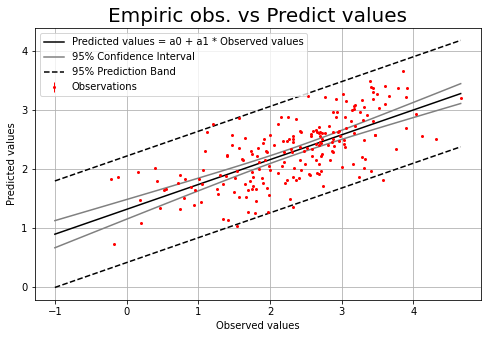

In [23]:
# Building linear a graph and calculation uncertainties

# retrieve parameter values
a0 = popt[0]
a1 = popt[1]

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
index_a0 = str(a0).find('+/-')
index_a1 = str(a1).find('+/-')
am_a0 = str(a0)[0:index_a0]
ci_a0 = str(a0)[index_a0+3:]
am_a1 = str(a1)[0:index_a1]
ci_a1 = str(a1)[index_a1+3:]

print('Uncertainty')
print(f'a0: {am_a0}+/-{round(float(ci_a0)*(n_all_y/n_stat_y)**0.5, 3)}')
print(f'a1: {am_a1}+/-{round(float(ci_a1)*(n_all_y/n_stat_y)**0.5, 3)}')

# plot data
plt.figure(figsize =(8, 5))
plt.errorbar(stat_y[predictor]['mean'], stat_y[0]['50%'], yerr=[list(l_sd_y_pred), list(t_sd_y_pred)], c = 'red', fmt='o', lw=1, ms=2, label='Observations')
plt.yscale('linear')

# calculate regression confidence interval
px = np.linspace(-1, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std * (n_all_y**0.5)/(n_stat_y**0.5), c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std * (n_all_y**0.5)/(n_stat_y**0.5), c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# Uncertainty parameters and confidence intervals

In [24]:
# Intermedia ratio for calculation CI
CIR = 2/((n_test + n_train)/n_test)**0.5

In [25]:
# Statistic for SHAP-values

number_iteration = len(aggr_Shap_values.groupby(['Feature']))
shap_list = aggr_Shap_values.groupby(['Feature'])


for i in range(number_iteration):
    itr_mean = round(np.mean(list(shap_list)[i][1].iloc[0:, 1]), 3)
    itr_Q50 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.50), 3)
    itr_Q16 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.16), 3)
    itr_Q84 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.84), 3)
    itr_l = (itr_Q50 - itr_Q16)*CIR
    l_CI = itr_Q50 - itr_l
    itr_t = (itr_Q84 - itr_Q50)*CIR
    t_CI = itr_Q50 + itr_t    
    print(f"SHAP-values for: {list(shap_list)[i][0]}: mean - {itr_mean}, median - {itr_Q50}, CI - [{round(l_CI, 3)}-{round(t_CI, 3)}]\n")        

SHAP-values for: A_year: mean - 0.151, median - 0.151, CI - [0.117-0.186]

SHAP-values for: D_cm: mean - 0.289, median - 0.287, CI - [0.254-0.327]

SHAP-values for: F_Soil_ID: mean - 0.16, median - 0.16, CI - [0.13-0.19]

SHAP-values for: G_m2_ha: mean - 0.09, median - 0.09, CI - [0.066-0.114]

SHAP-values for: H_m: mean - 0.163, median - 0.16, CI - [0.127-0.197]

SHAP-values for: M_Soil: mean - 0.121, median - 0.119, CI - [0.089-0.149]

SHAP-values for: Origin_ID: mean - 0.051, median - 0.044, CI - [0.026-0.075]

SHAP-values for: Species_ID: mean - 0.076, median - 0.077, CI - [0.054-0.098]



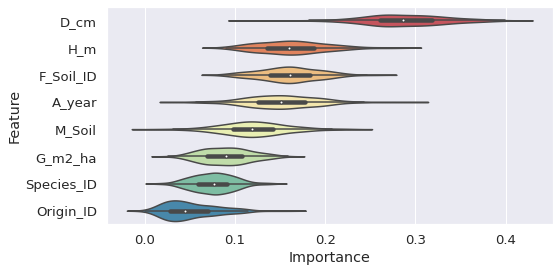

In [28]:
sns.set(font_scale=1.2)
sns.violinplot(x="Importance", y="Feature", data=aggr_Shap_values, inner="box", palette="Spectral", order=['D_cm', 'H_m', 'F_Soil_ID', 'A_year', 
  'M_Soil', 'G_m2_ha', 'Species_ID', 'Origin_ID'])
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

In [29]:
# Aggregate stat
# optimal number of iterations
aggr_optimal_n_mean = np.mean(aggr_optimal_n)
aggr_optimal_n_Q025 = np.quantile(aggr_optimal_n, 0.025)
aggr_optimal_n_Q16 = np.quantile(aggr_optimal_n, 0.16)
aggr_optimal_n_Q50 = np.quantile(aggr_optimal_n, 0.50)
aggr_optimal_n_Q84 = np.quantile(aggr_optimal_n, 0.84)
aggr_optimal_n_Q975 = np.quantile(aggr_optimal_n, 0.975)

# bias
aggr_bias_mean = np.mean(aggr_bias)
aggr_bias_Q025 = np.quantile(aggr_bias, 0.025)
aggr_bias_Q16 = np.quantile(aggr_bias, 0.16)
aggr_bias_Q50 = np.quantile(aggr_bias, 0.50)
aggr_bias_Q84 = np.quantile(aggr_bias, 0.84)
aggr_bias_Q975 = np.quantile(aggr_bias, 0.975)

aggr_rel_bias_mean = np.mean(aggr_rel_bias)
aggr_rel_bias_Q025 = np.quantile(aggr_rel_bias, 0.025)
aggr_rel_bias_Q16 = np.quantile(aggr_rel_bias, 0.16)
aggr_rel_bias_Q50 = np.quantile(aggr_rel_bias, 0.50)
aggr_rel_bias_Q84 = np.quantile(aggr_rel_bias, 0.84)
aggr_rel_bias_Q975 = np.quantile(aggr_rel_bias, 0.975)

# RMSE
aggr_rmse_mean = np.mean(aggr_rmse)
aggr_rmse_Q025 = np.quantile(aggr_rmse, 0.025)
aggr_rmse_Q16 = np.quantile(aggr_rmse, 0.16)
aggr_rmse_Q50 = np.quantile(aggr_rmse, 0.50)
aggr_rmse_Q84 = np.quantile(aggr_rmse, 0.84)
aggr_rmse_Q975 = np.quantile(aggr_rmse, 0.975)

aggr_rel_rmse_mean = np.mean(aggr_rel_rmse)
aggr_rel_rmse_Q025 = np.quantile(aggr_rel_rmse, 0.025)
aggr_rel_rmse_Q16 = np.quantile(aggr_rel_rmse, 0.16)
aggr_rel_rmse_Q50 = np.quantile(aggr_rel_rmse, 0.50)
aggr_rel_rmse_Q84 = np.quantile(aggr_rel_rmse, 0.84)
aggr_rel_rmse_Q975 = np.quantile(aggr_rel_rmse, 0.975)

# MSE
aggr_mse_mean = np.mean(aggr_mse)
aggr_mse_Q025 = np.quantile(aggr_mse, 0.025)
aggr_mse_Q16 = np.quantile(aggr_mse, 0.16)
aggr_mse_Q50 = np.quantile(aggr_mse, 0.50)
aggr_mse_Q84 = np.quantile(aggr_mse, 0.84)
aggr_mse_Q975 = np.quantile(aggr_mse, 0.975)

# R-square
aggr_R_square_mean = np.mean(aggr_R_square)
aggr_R_square_Q025 = np.quantile(aggr_R_square, 0.025)
aggr_R_square_Q16 = np.quantile(aggr_R_square, 0.16)
aggr_R_square_Q50 = np.quantile(aggr_R_square, 0.50)
aggr_R_square_Q84 = np.quantile(aggr_R_square, 0.84)
aggr_R_square_Q975 = np.quantile(aggr_R_square, 0.975)

# exp_bias
exp_aggr_bias_mean = np.mean(exp_aggr_bias)
exp_aggr_bias_Q025 = np.quantile(exp_aggr_bias, 0.025)
exp_aggr_bias_Q16 = np.quantile(exp_aggr_bias, 0.16)
exp_aggr_bias_Q50 = np.quantile(exp_aggr_bias, 0.50)
exp_aggr_bias_Q84 = np.quantile(exp_aggr_bias, 0.84)
exp_aggr_bias_Q975 = np.quantile(exp_aggr_bias, 0.975)

exp_aggr_rel_bias_mean = np.mean(exp_aggr_rel_bias)
exp_aggr_rel_bias_Q025 = np.quantile(exp_aggr_rel_bias, 0.025)
exp_aggr_rel_bias_Q16 = np.quantile(exp_aggr_rel_bias, 0.16)
exp_aggr_rel_bias_Q50 = np.quantile(exp_aggr_rel_bias, 0.50)
exp_aggr_rel_bias_Q84 = np.quantile(exp_aggr_rel_bias, 0.84)
exp_aggr_rel_bias_Q975 = np.quantile(exp_aggr_rel_bias, 0.975)

# exp_RMSE
exp_aggr_rmse_mean = np.mean(exp_aggr_rmse)
exp_aggr_rmse_Q025 = np.quantile(exp_aggr_rmse, 0.025)
exp_aggr_rmse_Q16 = np.quantile(exp_aggr_rmse, 0.16)
exp_aggr_rmse_Q50 = np.quantile(exp_aggr_rmse, 0.50)
exp_aggr_rmse_Q84 = np.quantile(exp_aggr_rmse, 0.84)
exp_aggr_rmse_Q975 = np.quantile(exp_aggr_rmse, 0.975)

exp_aggr_rel_rmse_mean = np.mean(exp_aggr_rel_rmse)
exp_aggr_rel_rmse_Q025 = np.quantile(exp_aggr_rel_rmse, 0.025)
exp_aggr_rel_rmse_Q16 = np.quantile(exp_aggr_rel_rmse, 0.16)
exp_aggr_rel_rmse_Q50 = np.quantile(exp_aggr_rel_rmse, 0.50)
exp_aggr_rel_rmse_Q84 = np.quantile(exp_aggr_rel_rmse, 0.84)
exp_aggr_rel_rmse_Q975 = np.quantile(exp_aggr_rel_rmse, 0.975)

# exp_MSE
exp_aggr_mse_mean = np.mean(exp_aggr_mse)
exp_aggr_mse_Q025 = np.quantile(exp_aggr_mse, 0.025)
exp_aggr_mse_Q16 = np.quantile(exp_aggr_mse, 0.16)
exp_aggr_mse_Q50 = np.quantile(exp_aggr_mse, 0.50)
exp_aggr_mse_Q84 = np.quantile(exp_aggr_mse, 0.84)
exp_aggr_mse_Q975 = np.quantile(exp_aggr_mse, 0.975)

# exp_R-square
exp_aggr_R_square_mean = np.mean(exp_aggr_R_square)
exp_aggr_R_square_Q025 = np.quantile(exp_aggr_R_square, 0.025)
exp_aggr_R_square_Q16 = np.quantile(exp_aggr_R_square, 0.16)
exp_aggr_R_square_Q50 = np.quantile(exp_aggr_R_square, 0.50)
exp_aggr_R_square_Q84 = np.quantile(exp_aggr_R_square, 0.84)
exp_aggr_R_square_Q975 = np.quantile(exp_aggr_R_square, 0.975)

In [30]:
# Output calculated stat
print("Logarithmically transformed predictive values:")
print(f"Aggregate optimal number of iterations statistic: \n mean: {round(aggr_optimal_n_mean, 3)}, median: {round(aggr_optimal_n_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_optimal_n_Q025, 3)}-{round(aggr_optimal_n_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_optimal_n_Q50-((aggr_optimal_n_Q50-aggr_optimal_n_Q16)*CIR), 3)}-{round(aggr_optimal_n_Q50+((aggr_optimal_n_Q84-aggr_optimal_n_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias statistic: \n mean: {round(aggr_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_bias_Q025, 3)}-{round(aggr_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_bias_Q50-((aggr_bias_Q50-aggr_bias_Q16)*CIR), 3)}-{round(aggr_bias_Q50+((aggr_bias_Q84-aggr_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE statistic: \n mean: {round(aggr_rmse_mean, 3)}, median: {round(aggr_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rmse_Q025, 3)}-{round(aggr_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rmse_Q50-((aggr_rmse_Q50-aggr_rmse_Q16)*CIR), 3)}-{round(aggr_rmse_Q50+((aggr_rmse_Q84-aggr_rmse_Q50)*CIR), 3)} \n***")
print(f"Aggregate MSE statistic: \n mean: {round(aggr_mse_mean, 3)}, median: {round(aggr_mse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_mse_Q025, 3)}-{round(aggr_mse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_mse_Q50-((aggr_mse_Q50-aggr_mse_Q16)*CIR), 3)}-{round(aggr_mse_Q50+((aggr_mse_Q84-aggr_mse_Q50)*CIR), 3)} \n***")
print(f"Aggregate R^2 statistic: \n mean: {round(aggr_R_square_mean, 3)}, median: {round(aggr_R_square_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_R_square_Q025, 3)}-{round(aggr_R_square_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_R_square_Q50-((aggr_R_square_Q50-aggr_R_square_Q16)*CIR), 3)}-{round(aggr_R_square_Q50+((aggr_R_square_Q84-aggr_R_square_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias(%) statistic: \n mean: {round(aggr_rel_bias_mean, 3)}, median: {round(aggr_rel_bias_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_bias_Q025, 3)}-{round(aggr_rel_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_bias_Q50-((aggr_rel_bias_Q50-aggr_rel_bias_Q16)*CIR), 3)}-{round(aggr_rel_bias_Q50+((aggr_rel_bias_Q84-aggr_rel_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE(%) statistic: \n mean: {round(aggr_rel_rmse_mean, 3)}, median: {round(aggr_rel_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_rmse_Q025, 3)}-{round(aggr_rel_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_rmse_Q50-((aggr_rel_rmse_Q50-aggr_rel_rmse_Q16)*CIR), 3)}-{round(aggr_rel_rmse_Q50+((aggr_rel_rmse_Q84-aggr_rel_rmse_Q50)*CIR), 3)} \n***")

print("\nTransformed predictive values into the primary state:")
print(f"Aggregate bias statistic: \n mean: {round(exp_aggr_bias_mean, 3)}, median: {round(exp_aggr_bias_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_bias_Q025, 3)}-{round(exp_aggr_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_bias_Q50-((exp_aggr_bias_Q50-exp_aggr_bias_Q16)*CIR), 3)}-{round(exp_aggr_bias_Q50+((exp_aggr_bias_Q84-exp_aggr_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE statistic: \n mean: {round(exp_aggr_rmse_mean, 3)}, median: {round(exp_aggr_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_rmse_Q025, 3)}-{round(exp_aggr_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_rmse_Q50-((exp_aggr_rmse_Q50-exp_aggr_rmse_Q16)*CIR), 3)}-{round(exp_aggr_rmse_Q50+((exp_aggr_rmse_Q84-exp_aggr_rmse_Q50)*CIR), 3)} \n***")
print(f"Aggregate MSE statistic: \n mean: {round(exp_aggr_mse_mean, 3)}, median: {round(exp_aggr_mse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_mse_Q025, 3)}-{round(exp_aggr_mse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_mse_Q50-((exp_aggr_mse_Q50-exp_aggr_mse_Q16)*CIR), 3)}-{round(exp_aggr_mse_Q50+((exp_aggr_mse_Q84-exp_aggr_mse_Q50)*CIR), 3)} \n***")
print(f"Aggregate R^2 statistic: \n mean: {round(exp_aggr_R_square_mean, 3)}, median: {round(exp_aggr_R_square_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_R_square_Q025, 3)}-{round(exp_aggr_R_square_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_R_square_Q50-((exp_aggr_R_square_Q50-exp_aggr_R_square_Q16)*CIR), 3)}-{round(exp_aggr_R_square_Q50+((exp_aggr_R_square_Q84-exp_aggr_R_square_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias(%) statistic: \n mean: {round(exp_aggr_rel_bias_mean, 3)}, median: {round(exp_aggr_rel_bias_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_rel_bias_Q025, 3)}-{round(exp_aggr_rel_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_rel_bias_Q50-((exp_aggr_rel_bias_Q50-exp_aggr_rel_bias_Q16)*CIR), 3)}-{round(exp_aggr_rel_bias_Q50+((exp_aggr_rel_bias_Q84-exp_aggr_rel_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE(%) statistic: \n mean: {round(exp_aggr_rel_rmse_mean, 3)}, median: {round(exp_aggr_rel_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_rel_rmse_Q025, 3)}-{round(exp_aggr_rel_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_rel_rmse_Q50-((exp_aggr_rel_rmse_Q50-exp_aggr_rel_rmse_Q16)*CIR), 3)}-{round(exp_aggr_rel_rmse_Q50+((exp_aggr_rel_rmse_Q84-exp_aggr_rel_rmse_Q50)*CIR), 3)} \n***")

Logarithmically transformed predictive values:
Aggregate optimal number of iterations statistic: 
 mean: 42.53, median: 39.0,
 pred. interval (P(0.025)-P(0.975)): 16.0-73.0, 
 conf. interval (p-value=0.95): 25.552-62.454 
***
Aggregate bias statistic: 
 mean: -0.025, median: -0.018,
 pred. interval (P(0.025)-P(0.975)): -0.247-0.195, 
 conf. interval (p-value=0.95): -0.136-0.086 
***
Aggregate RMSE statistic: 
 mean: 0.706, median: 0.703, pred. interval (P(0.025)-P(0.975)): 0.547-0.866, 
 conf. interval (p-value=0.95): 0.634-0.782 
***
Aggregate MSE statistic: 
 mean: 0.505, median: 0.494, pred. interval (P(0.025)-P(0.975)): 0.299-0.751, 
 conf. interval (p-value=0.95): 0.402-0.612 
***
Aggregate R^2 statistic: 
 mean: 0.401, median: 0.408, pred. interval (P(0.025)-P(0.975)): 0.127-0.592, 
 conf. interval (p-value=0.95): 0.293-0.507 
***
Aggregate bias(%) statistic: 
 mean: -0.858, median: -0.782, pred. interval (P(0.025)-P(0.975)): -9.923-9.13, 
 conf. interval (p-value=0.95): -5.579-3

# Analysis of residuals distributions dependents on empirical values of predicted parameter

Text(0.5, 1.0, 'In typical state')

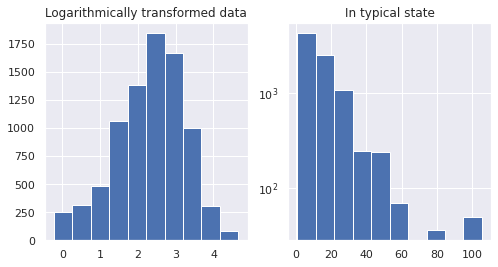

In [31]:
# Preprocessing
results_y['T_exp_empiric'] = np.exp(results_y[predictor])
results_y['T_exp_pred'] = np.exp(results_y[0])

results_y['ln_residuals'] = results_y[predictor] - results_y[0]
results_y['T_exp_residuals'] = results_y['T_exp_empiric'] - results_y['T_exp_pred']
results_y['ln_residuals_%'] =  results_y['ln_residuals'] / results_y[predictor] * 100
results_y['T_exp_residuals_%'] = results_y['T_exp_residuals'] / results_y['T_exp_empiric'] * 100

# plt.hist(results_y[predictor])
# plt.hist(results_y[predictor])
fig, axs = plt.subplots(1, 2)
axs[0].hist(results_y[predictor])
axs[0].set_title('Logarithmically transformed data')
axs[1].hist(results_y['T_exp_empiric'], log=True)
axs[1].set_title('In typical state')
# plt.show() 

In [33]:
# INPORTANT  - added your intervals
ln_intervals = pd.cut(results_y[predictor], [0, 1, 2, 3, 4, 5])
T_exp_intervals = pd.cut(results_y['T_exp_empiric'], [0, 5, 10, 20, 50, 100])

ln_grouped = results_y.groupby(ln_intervals)
T_exp_grouped = results_y.groupby(T_exp_intervals) 

max_obs_in_group = len(results_y)    
    
pre_ln = pd.DataFrame()
pre_T_exp = pd.DataFrame()
pre_rel_ln = pd.DataFrame()
pre_rel_T_exp = pd.DataFrame()

pre_ln = pre_ln.assign(row_number=range(max_obs_in_group))
pre_T_exp = pre_T_exp.assign(row_number=range(max_obs_in_group))
pre_rel_ln = pre_rel_ln.assign(row_number=range(max_obs_in_group))
pre_rel_T_exp = pre_rel_T_exp.assign(row_number=range(max_obs_in_group))

for i in range(len(list(ln_grouped))):
    pre_ln[list(ln_grouped)[i][0]] = pd.Series(list(ln_grouped)[i][1]['ln_residuals'])
    pre_rel_ln[list(ln_grouped)[i][0]] = pd.Series(list(ln_grouped)[i][1]['ln_residuals_%'])

for i in range(len(list(T_exp_grouped))):
    pre_T_exp[list(T_exp_grouped)[i][0]] = pd.Series(list(T_exp_grouped)[i][1]['T_exp_residuals'])
    pre_rel_T_exp[list(T_exp_grouped)[i][0]] = pd.Series(list(T_exp_grouped)[i][1]['T_exp_residuals_%'])

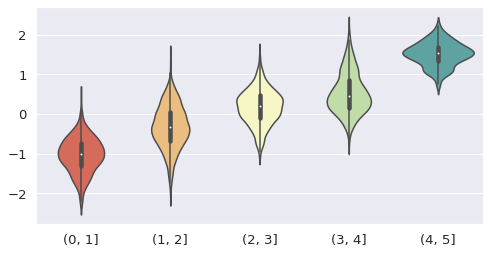

In [34]:
# Plots of residuals versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_ln[list(pre_ln.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

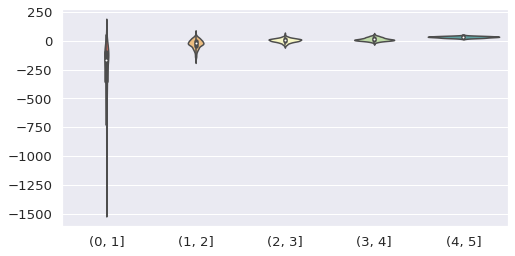

In [35]:
# Plots of relative residuals (in %) versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_rel_ln[(pre_rel_ln.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

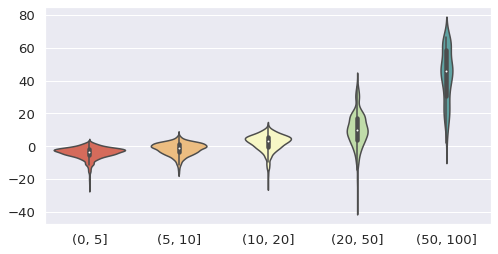

In [36]:
# Plots of residuals versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_T_exp[list(pre_T_exp.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

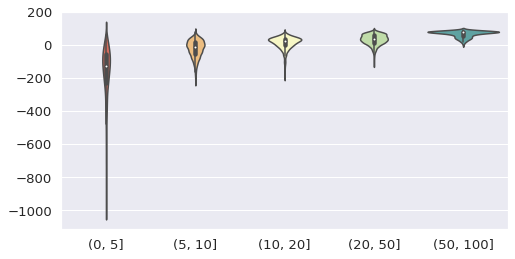

In [37]:
# Plots of relative residuals (in %) versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_rel_T_exp[(pre_rel_T_exp.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

# ***Creating final XGBoost model using all obs. for its training***

In [38]:
# Generate test and training samples
f_X_train = X
f_y_train = y

In [39]:
# Implementation of the scikit-learn API for XGBoost regression
f_xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])

In [40]:
# Fitting the model 
f_xgb_model.fit(f_X_train, f_y_train, early_stopping_rounds=20, eval_set=[(f_X_train, f_y_train)])
# learning dynamics
f_y_pred = f_xgb_model.predict(f_X_train, ntree_limit=f_xgb_model.best_ntree_limit)

[0]	validation_0-rmse:1.81810
[1]	validation_0-rmse:1.61920
[2]	validation_0-rmse:1.46304
[3]	validation_0-rmse:1.32860
[4]	validation_0-rmse:1.19804
[5]	validation_0-rmse:1.10299
[6]	validation_0-rmse:1.01827
[7]	validation_0-rmse:0.95006


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:0.88697
[9]	validation_0-rmse:0.83599
[10]	validation_0-rmse:0.79606
[11]	validation_0-rmse:0.76168
[12]	validation_0-rmse:0.73760
[13]	validation_0-rmse:0.72016
[14]	validation_0-rmse:0.69872
[15]	validation_0-rmse:0.67836
[16]	validation_0-rmse:0.65703
[17]	validation_0-rmse:0.64164
[18]	validation_0-rmse:0.63027
[19]	validation_0-rmse:0.62157
[20]	validation_0-rmse:0.61368
[21]	validation_0-rmse:0.60551
[22]	validation_0-rmse:0.60210
[23]	validation_0-rmse:0.59665
[24]	validation_0-rmse:0.58907
[25]	validation_0-rmse:0.58125
[26]	validation_0-rmse:0.57939
[27]	validation_0-rmse:0.57306
[28]	validation_0-rmse:0.57055
[29]	validation_0-rmse:0.56341
[30]	validation_0-rmse:0.56160
[31]	validation_0-rmse:0.55787
[32]	validation_0-rmse:0.54978
[33]	validation_0-rmse:0.53811
[34]	validation_0-rmse:0.53248
[35]	validation_0-rmse:0.52975
[36]	validation_0-rmse:0.52542
[37]	validation_0-rmse:0.52032
[38]	validation_0-rmse:0.51529
[39]	validation_0-rmse:0.51087
[40]	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [41]:
# Iteration with the best result
f_optimal_n = f_xgb_model.best_ntree_limit-1
print("The best iteration: " + str(f_optimal_n))    

The best iteration: 73


In [42]:
# Preparing data for building a learning graph
f_results = f_xgb_model.evals_result()

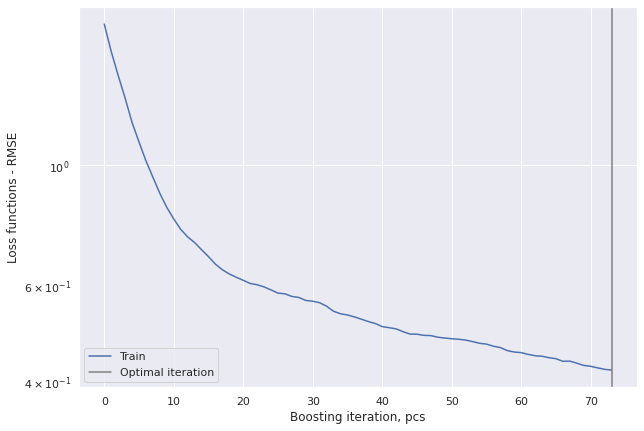

In [43]:
# Learning curves for the XGBoost model 
plt.figure(figsize=(10,7))
plt.yscale("log")
plt.plot(f_results['validation_0']['rmse'], label='Train')
plt.axvline(f_optimal_n, color="gray", label="Optimal iteration")
plt.xlabel("Boosting iteration, pcs")
plt.ylabel("Loss functions - RMSE")
plt.legend()

# Estimation of a final XGBoost model

In [44]:
# Convert data to 'array' type
f_conv_y_pred = pd.DataFrame(f_y_pred) # Double transformation
f_y_pred2 = f_conv_y_pred.values
f_y_train2 = f_y_train.values

# Intermediate results
f_n_sample = len(f_y_pred2)
f_main_sample = f_y_train.sum() / f_n_sample

# Calculation of bias
f_diff = f_y_pred2 - f_y_train2
f_bias = f_diff.sum()/f_n_sample
print('Bias: %.1f' % (f_bias))
print("Relative bias(%):", " %.2f" % (f_bias/f_main_sample*100))

# Calculation of RMSE
f_rmse = np.sqrt(mean_squared_error(f_y_train, f_y_pred))
print("RMSE: %.1f" % (f_rmse))
print("Relative RMSE(%):", " %.3f" % (f_rmse/f_main_sample*100))

# Calculation of MSE
f_mse = mean_squared_error(f_y_train, f_y_pred)
print("MSE: %.1f" % (f_mse))

# Calculation of Square R
f_R_square = r2_score(f_y_train, f_y_pred)
print("R square: %.1f%%" % (f_R_square * 100.0))

Bias: -0.0
Relative bias(%):  -0.03
RMSE: 0.4
Relative RMSE(%):  18.099
MSE: 0.2
R square: 79.6%


In [45]:
# Convert input data
f_x_train_conv = np.array(f_y_train)
f_x_train_convert = np.array([None]*f_n_sample)
for i in range(f_n_sample):
    f_x_train_convert[i] = float(f_x_train_conv[i])

x_plot = f_x_train_convert
y_plot = f_y_pred
n = len(y_plot)

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

R^2: 0.817
Uncertainty
a0: 0.72+/-0.06
a1: 0.688+/-0.023


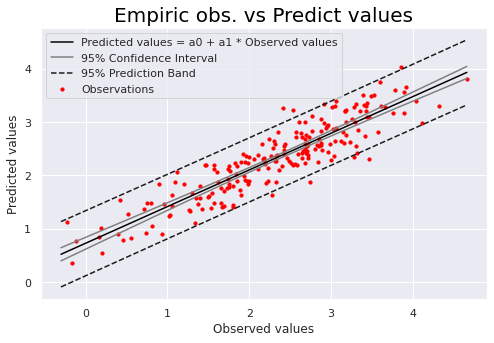

In [48]:
# Building linear a graph and calculation uncertainties

# retrieve parameter values
a0 = popt[0]
a1 = popt[1]

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
print('Uncertainty')
print('a0: ' + str(a0))
print('a1: ' + str(a1))

# plot data
plt.figure(figsize =(8, 5))
plt.scatter(x_plot, y_plot, s = 10, c = 'red', label='Observations', marker = 'o')
plt.yscale('linear')

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

# calculate regression confidence interval
px = np.linspace(-0.3, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std, c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std, c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# ***Analisys output final model***

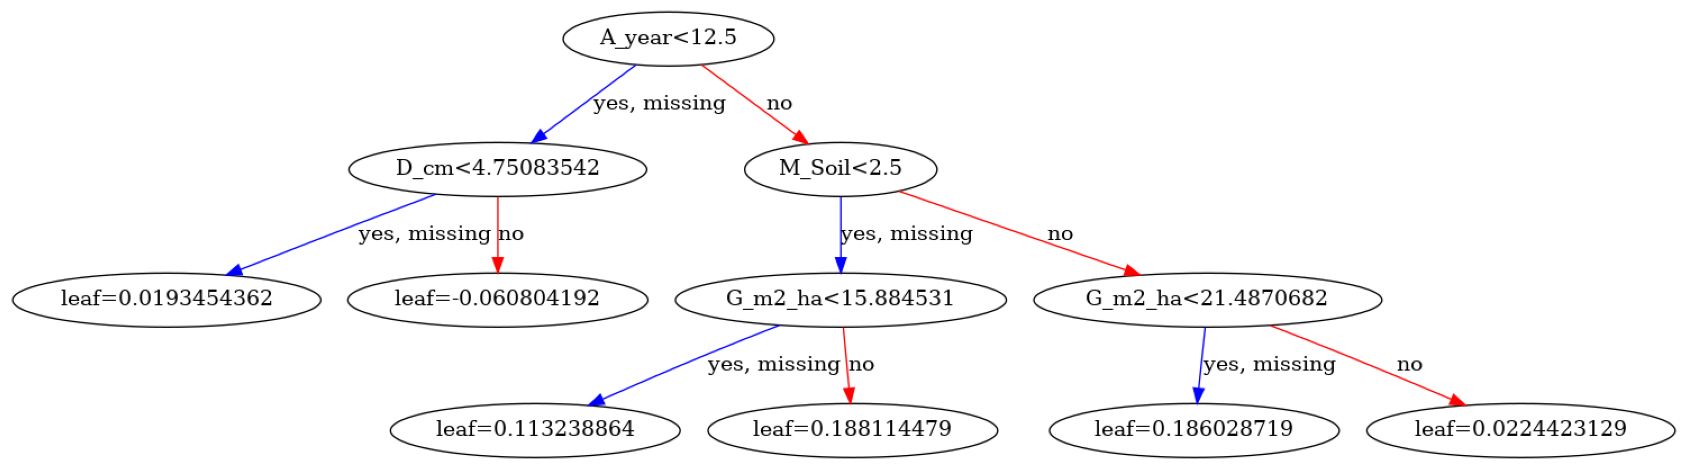

In [50]:
# Visualize the Decision tree (individual obs.)
xgb.plot_tree(f_xgb_model, num_trees=3) # "num_trees" is number of obs.
plt.rcParams['figure.figsize'] = [30, 45]
plt.show()

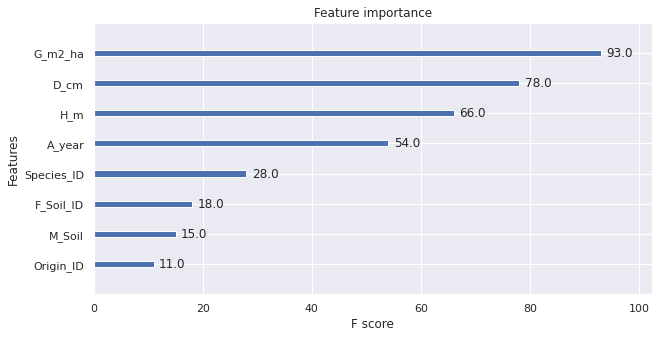

In [52]:
# Importance is calculated as: ”weight” is the number of times a feature appears in a trees
xgb.plot_importance(f_xgb_model, importance_type='weight')
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

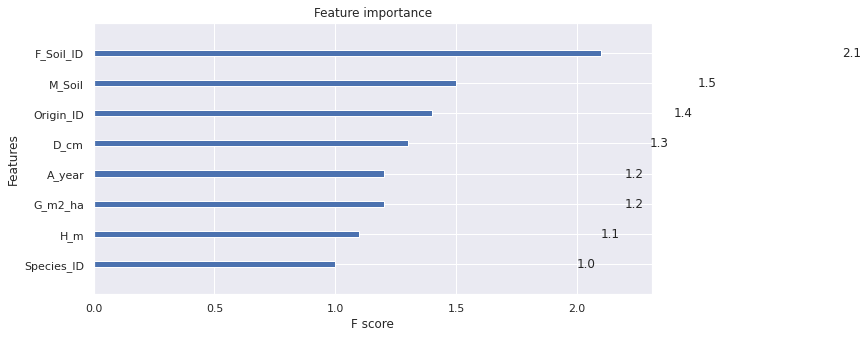

In [53]:
# Importance is calculated as: ”gain” is the average gain of splits which use the feature
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="gain")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key], 1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='gain', show_values=True)

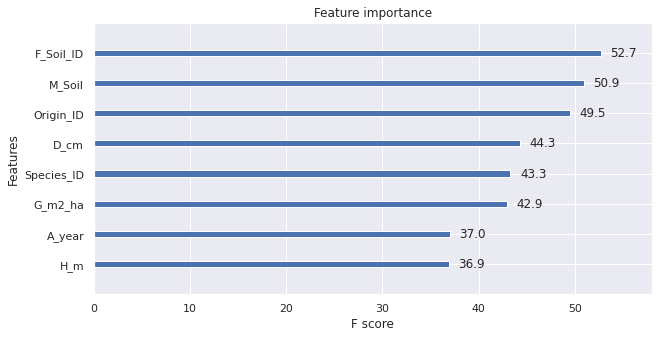

In [54]:
# Importance is calculated as: "cover” is the average coverage of splits which use the feature where coverage is defined as the number of samples affected by the split
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="cover")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key],1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='cover', show_values=True)

# Est. of SHAP values for final models

In [55]:
# Сreate an уxplainer object
explainer = shap.TreeExplainer(f_xgb_model)
shap_values = explainer.shap_values(f_X_train)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


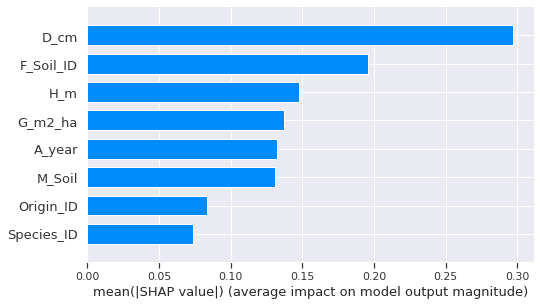

In [56]:
# Mean absolute value of the SHAP values for each feature 
shap.summary_plot(shap_values, f_X_train, plot_type="bar")

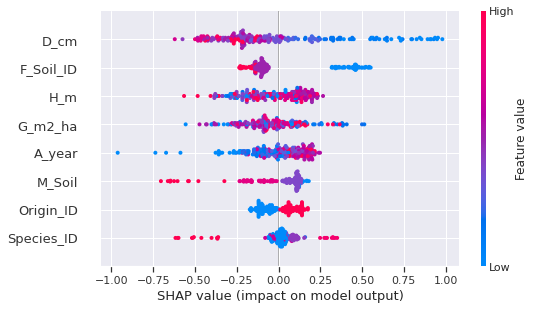

In [57]:
# Graph that summarises the effects of all the features
shap.summary_plot(shap_values, f_X_train)

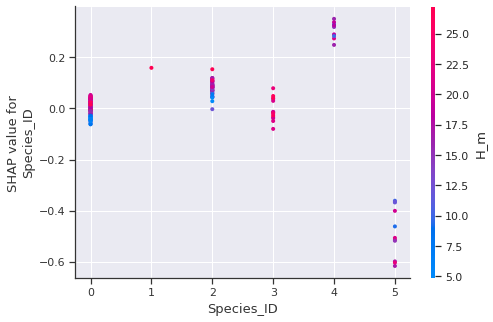

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


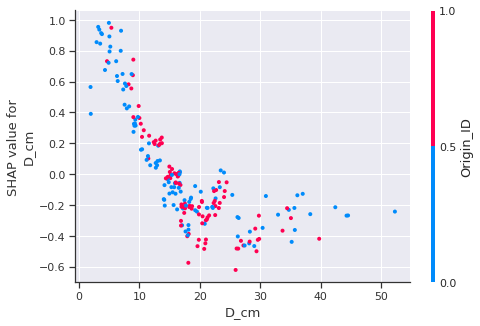

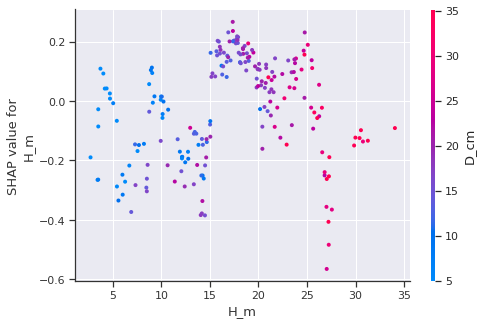

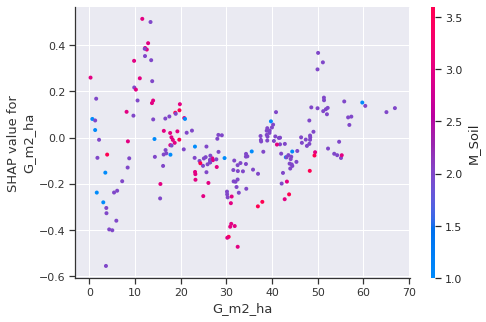

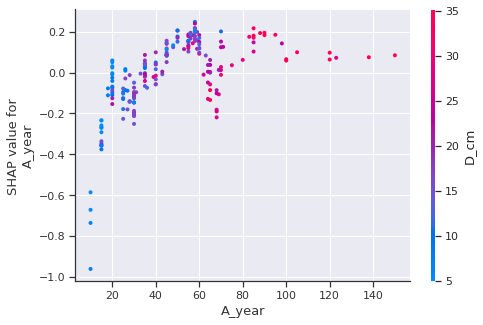

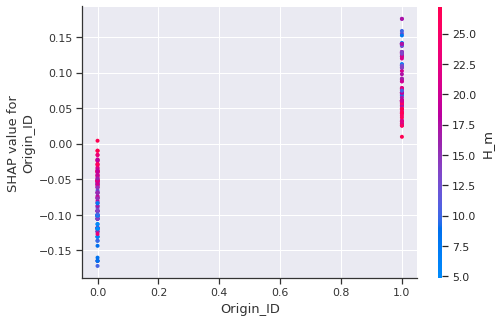

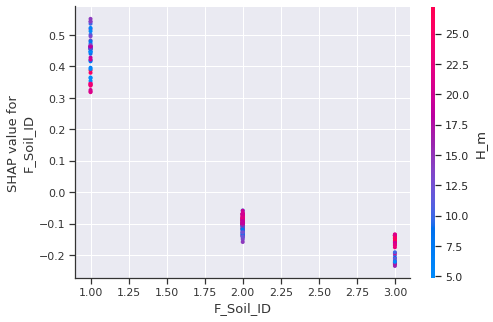

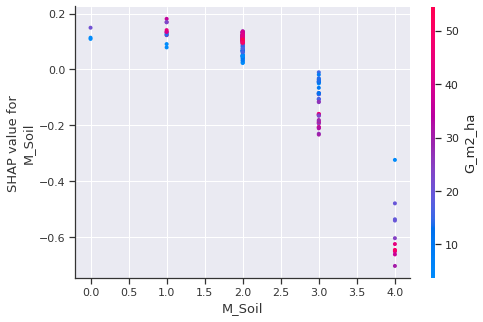

In [58]:
# Create a dependence scatter plot to show the effect of a single feature across the whole dataset
for name in X_train.columns:
    shap.dependence_plot(name, shap_values, f_X_train, color=shap_values)

# *Save XGBoost model*

In [59]:
# Save to JSON
f_xgb_model.save_model("../02_output_data/XGBoost_models/03_LN_Tag_Sr_XGB_model.json")
# Save to text format
f_xgb_model.save_model("../02_output_data/XGBoost_models/03_LN_Tag_Sr_XGB_model.txt")